In [1]:
# لود کردن کتابخانه ها 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# در ادامه ، دیتاست ها را از فایل های مربوطه میخوانیم

In [2]:
tweets = pd.read_csv("tweets.csv")

In [3]:
users = pd.read_csv("users.csv" , on_bad_lines = "skip")

C:\Users\Rayan\AppData\Local\Temp\ipykernel_11836\2933307580.py:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv("users.csv" , on_bad_lines = "skip")


In [4]:
entities = pd.read_csv("entities.csv")

In [31]:
companies = pd.read_csv("companies.csv")

In [6]:
tweets.tail(5)

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
9091534,907725480618610689,Contrasting Pure Cycle Corporation $PCYO &amp;...,2920258887,0,0,0,0,pt,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:53 +0000 2017
9091535,907725484909309957,Contrasting Harvard Bioscience $HBIO &amp; Ful...,2920258887,0,0,0,0,da,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:54 +0000 2017
9091536,907725487996272640,"NRG Energy, Inc. $NRG Receives $21.13 Average ...",2920258887,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:55 +0000 2017
9091537,907725490760376320,Reviewing Arch Therapeutics $ARTH and Globus M...,2920258887,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:56 +0000 2017
9091538,907725492874223616,$JD Beginning stage of a breakout. Strong buy ...,840771557601423360,0,0,0,0,en,"<a href=""http://www.twitter.com"" rel=""nofollow...",Tue Sep 12 21:59:56 +0000 2017


In [7]:
companies.head()

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [8]:
entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [9]:
companies['exchange'].value_counts()

OTCMKTS     22956
NASDAQ       3013
NYSE         2997
NYSEARCA      726
NYSEMKT       340
Name: exchange, dtype: int64

In [10]:
entities['entity_type'].value_counts()

symbol          19451737
url              7234124
hashtag          5840863
mention          3169329
image             707843
animated_gif       55172
video              23393
Name: entity_type, dtype: int64

In [11]:
for i in range(10) : 
        print(entities.loc[i])

tweet_id                                      865191269030612992
entity_type                                                  url
text           http://ih.advfn.com/p.php?pid=nmona&article=74...
Name: 0, dtype: object
tweet_id       865191269030612992
entity_type                symbol
text                         AMGN
Name: 1, dtype: object
tweet_id                                      865191271899570176
entity_type                                                  url
text           https://finance.yahoo.com/news/amgen-submits-b...
Name: 2, dtype: object
tweet_id       865191271899570176
entity_type               hashtag
text                          FDA
Name: 3, dtype: object
tweet_id       865191271899570176
entity_type               hashtag
text                      biotech
Name: 4, dtype: object
tweet_id       865191271899570176
entity_type               hashtag
text                     erenumab
Name: 5, dtype: object
tweet_id       865191271899570176
entity_type               hash

In [12]:
companies.head(10)

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09
5,AAALY,Aareal Bank AG,OTCMKTS,2.040000e+09
6,AAAP,Advanced Accelerator,NASDAQ,1.710000e+09
7,AAARF,ALUAR ALUMINIO ARG C,OTCMKTS,2.460000e+09
8,AAAUF,"AUPLATA, CAYENNE",OTCMKTS,4.137000e+07
9,AABA,Altaba Inc,NASDAQ,4.974000e+10


In [13]:
users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,verified,description,created_at,bot
0,859451814940336128,Nao,sovereignao,2460,181,399,5247,6,NaN,en,Pacific Time (US & Canada),HODLing fast on,NaN,Self-sovereign,Tue May 02 16:57:35 +0000 2017,NaN
1,44060322,Benzinga.com,Benzinga,126228,59237,1617,2774,2310,http://www.benzinga.com/,en,Eastern Time (US & Canada),Zingernation,1.0,Financial news site. Creator of Benzinga Pro: ...,Tue Jun 02 04:43:10 +0000 2009,NaN
2,713570637306986496,Best Investings,bestinvestings,2718,27,0,0,3,NaN,en,Pacific Time (US & Canada),IN THE CHARTS,NaN,May or may not give you the best investing adv...,Sat Mar 26 03:37:52 +0000 2016,NaN
3,823239593151655936,thestocklist,thestocklist,447,25,9,3,2,http://thestocklist.com,en,Eastern Time (US & Canada),U.S.A.,NaN,Check out my new website http://thestocklist.c...,Sun Jan 22 18:43:08 +0000 2017,NaN
4,44367489,MM&M Magazine,MMMnews,11078,9277,548,90,783,http://www.mmm-online.com,en,Quito,"New York, NY, USA",NaN,"MM&M: the most objective, relevant, and timely...",Wed Jun 03 14:20:16 +0000 2009,NaN


In [14]:
# توابع استخراج ماه ، روز هفته ، ساعت ، روز ماه ، سال ، از ویژگی 
# created_at
def get_month(x) : 
    y = x.split(" ")
    month = y[1]
    months = {'Jan':1 , 'Feb':2 , 'Mar':3 , 'Apr':4 , 'May':5 , 'Jun':6 , 'Jul':7 , 'Aug':8 , 'Sep':9 , 'Oct':10 , 
              'Nov':11 , 'Dec':12 }
    return months[month]

def get_week_day(x):
    week_day = x.split(" ")[0]
    days = {'Sat':1 , 'Sun':2 , 'Mon':3 , 'Tue':4 , 'Wed':5 , 'Thu':6 , 'Fri':7}
    return days[week_day]


def get_year(x) : 
    y = x.split(" ")
    year = int(y[-1])
    return year

def get_day(x): 
    y = x.split(" ")
    day = int(y[2])
    return day

def get_hour(x) : 
    y = x.split(" ")
    hour = int(y[3].split(":")[0])
    return hour
#Thu May 18 22:00:14 +0000 2017
tweets['year' ] = tweets['created_at'].apply(get_year)
tweets['month'] = tweets['created_at'].apply(get_month)
tweets['day'] = tweets['created_at'].apply(get_day)
tweets['hour'] = tweets['created_at'].apply(get_hour)
tweets['week_day'] = tweets['created_at'].apply(get_week_day)

In [15]:
msk_img = entities['entity_type'] == 'image'
msk_gif = entities['entity_type'] == 'animated_gif'
msk_url = entities['entity_type'] == 'url'
msk_mention = entities['entity_type'] == 'mention'
msk_video = entities['entity_type'] == 'video'
msk_ent = msk_img | msk_gif | msk_url | msk_mention | msk_video 

In [16]:
entity_1 = entities[~msk_ent].reset_index()
entity_1

,index,tweet_id,entity_type,text
0,1,865191269030612992,symbol,AMGN
1,3,865191271899570176,hashtag,FDA
2,4,865191271899570176,hashtag,biotech
3,5,865191271899570176,hashtag,erenumab
4,6,865191271899570176,hashtag,migraines
...,...,...,...,...
25292595,36482455,908044454728146944,symbol,TRIG
25292596,36482456,908044454728146944,symbol,VRC
25292597,36482457,908044454728146944,symbol,XEL
25292598,36482458,908044454728146944,symbol,XVC


In [17]:
entity_1 = entity_1.drop(['index'] , axis = 1 )

In [18]:
entity_1.head

<bound method NDFrame.head of                     tweet_id entity_type       text
0         865191269030612992      symbol       AMGN
1         865191271899570176     hashtag        FDA
2         865191271899570176     hashtag    biotech
3         865191271899570176     hashtag   erenumab
4         865191271899570176     hashtag  migraines
...                      ...         ...        ...
25292595  908044454728146944      symbol       TRIG
25292596  908044454728146944      symbol        VRC
25292597  908044454728146944      symbol        XEL
25292598  908044454728146944      symbol        XVC
25292599  908045452720918530      symbol        XOM

[25292600 rows x 3 columns]>

# Statistics on most and least tweeted stocks

In [19]:
entity_keys = dict(entity_1['text'].value_counts())

In [20]:
tweeted_copmanies = {}

for i in companies.index : 
    comp = companies.loc[i]['name']
    tick = companies.loc[i]['ticker']
    tweeted_copmanies[comp] = entity_keys.get(comp, 0 ) + entity_keys.get(tick , 0 )

In [21]:
tweeted_copmanies = dict(sorted(tweeted_copmanies.items() , key=lambda x:x[1] , reverse=True))

In [22]:
comps = list(tweeted_copmanies.keys())
counts = list(tweeted_copmanies.values())

In [23]:
tweeted_copmanies = pd.DataFrame({'company' : comps , 'count' : counts})
tweeted_copmanies.head()

,company,count
0,Apple Inc.,292631
1,"Amazon.com, Inc.",241710
2,Facebook Inc,212040
3,Tesla Inc,184992
4,SPDR S&P 500 ETF Tru,160688


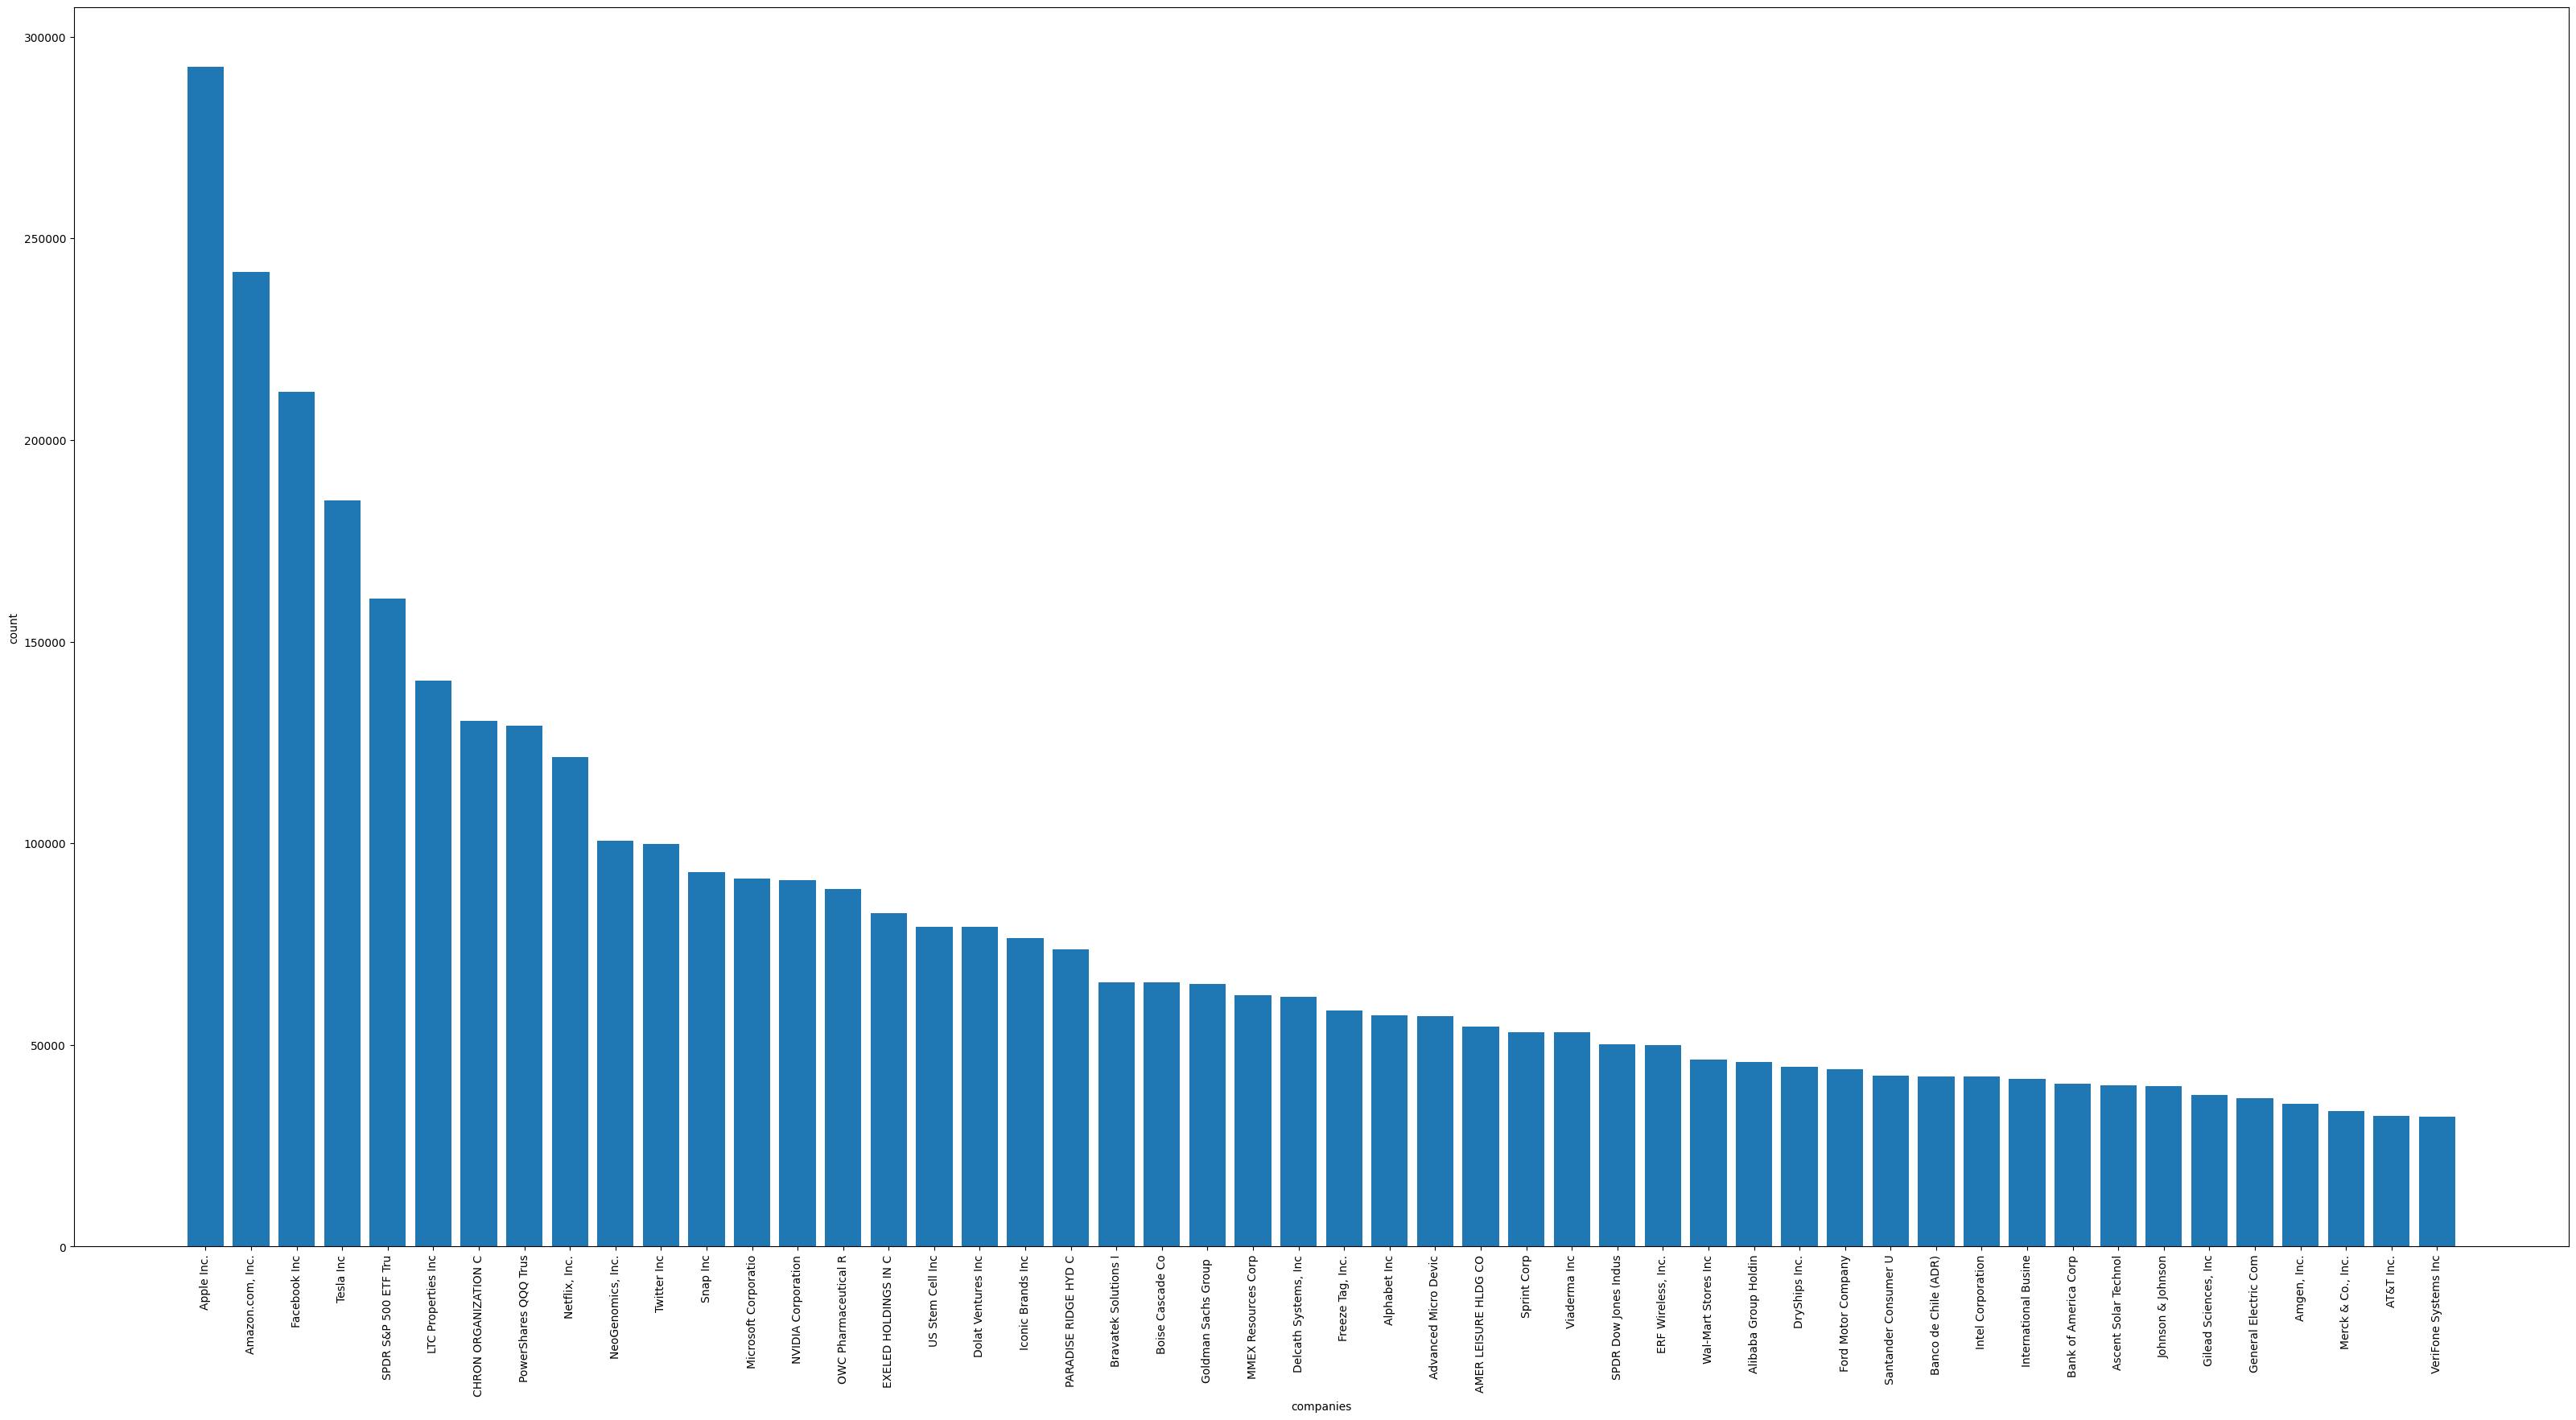

In [24]:
# رسم نمودار تعداد توییت ها برای هر شرکت و مشخص شدن شرکت های برتر در این زمینه
ax_1 , fig_1 = plt.subplots(figsize = (40,20))
plt.bar(comps[:50] , counts[:50])
plt.xticks(rotation = 'vertical')
plt.ylabel("count")
plt.xlabel("companies")
plt.show()

In [25]:
comp_cash = tweeted_copmanies['count'].value_counts()

In [26]:
# محاسبه تعداد شرکت ها بر حسب تعداد توییت های زده شده در مورد آنها
certain_cash =  list(comp_cash.keys())
number_of_comp = list(comp_cash.values)
comp_certain_cashtags = pd.DataFrame({'count' : certain_cash , 'Number Of Companies' : number_of_comp})
comp_certain_cashtags

,count,Number Of Companies
0,0,11947
1,1,1344
2,3,1291
3,4,1217
4,2,1044
...,...,...
2819,2832,1
2820,1157,1
2821,1158,1
2822,2831,1


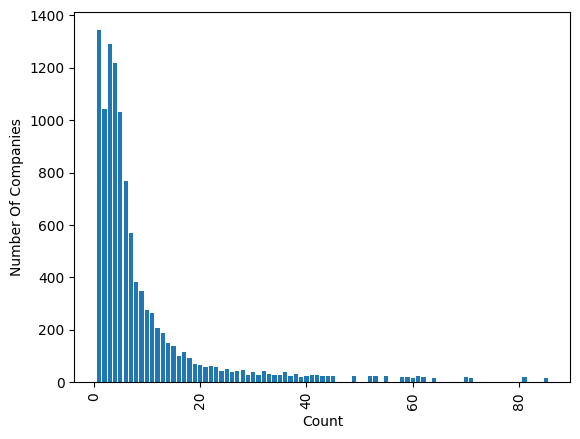

In [27]:
# رسم نمودار تعداد شرکت ها بر حسب توییت های زده شده
plt.bar(certain_cash[1:60] , number_of_comp[1:60])
plt.xticks(rotation = 'vertical')
plt.ylabel("Number Of Companies")
plt.xlabel("Count")
plt.show()

In [33]:
# به دست آوردن مارکت کپ هر شرکت و تهیه لیستی از اسامی شرکت ها و مقدار مارکت کپ آنها
market_cap = []
exchange = []
for i in comps : 
    market_cap.append(companies[companies['name'] == i ]['capitalization'].values[0])
    exchange.append(companies[companies['name'] == i ]['exchange'].values[0])
    print(i)

Apple Inc.
Amazon.com, Inc.
Facebook Inc
Tesla Inc
SPDR S&P 500 ETF Tru
LTC Properties Inc
CHRON ORGANIZATION C
PowerShares QQQ Trus
Netflix, Inc.
NeoGenomics, Inc.
Twitter Inc
Snap Inc
Microsoft Corporatio
NVIDIA Corporation
OWC Pharmaceutical R
EXELED HOLDINGS IN C
US Stem Cell Inc
Dolat Ventures Inc
Iconic Brands Inc
PARADISE RIDGE HYD C
Bravatek Solutions I
Boise Cascade Co
Goldman Sachs Group 
MMEX Resources Corp
Delcath Systems, Inc
Freeze Tag, Inc.
Alphabet Inc
Advanced Micro Devic
AMER LEISURE HLDG CO
Sprint Corp
Viaderma Inc
SPDR Dow Jones Indus
ERF Wireless, Inc.
Wal-Mart Stores Inc
Alibaba Group Holdin
DryShips Inc.
Ford Motor Company
Santander Consumer U
Banco de Chile (ADR)
Intel Corporation
International Busine
Bank of America Corp
Ascent Solar Technol
Johnson & Johnson
Gilead Sciences, Inc
General Electric Com
Amgen, Inc.
Merck & Co., Inc.
AT&T Inc.
VeriFone Systems Inc
OM Group, Inc.
Visa Inc
Walt Disney Co
Moody's Corporation
NXT-ID Inc
Whole Foods Market, 
Starbucks C

NewLink Genetics Cor
Reynolds American, I
Celsion Corporation
Baxter International
Keryx Biopharmaceuti
Ambarella Inc
Pep Boys - Manny Moe
Baker Hughes Incorpo
Zoetis Inc
TRIO INDUSTRIES GP C
Urban Outfitters, In
HCA Healthcare Inc
Enerplus Corp (USA)
Newell Brands Inc
Veritone Inc
Lam Research Corpora
Toyota Motor Corp (A
Aurinia Pharmaceutic
VF Corp
Technology Select Se
Axon Enterprise Inc
Air Products & Chemi
American Electric Po
Rockwell Collins, In
Root9B Holdings Inc
Exelon Corporation
Exelixis, Inc.
Flowers Foods, Inc.
Sanofi SA (ADR)
Fidelity National In
Atossa Genetics Inc
Bank of Nova Scotia
Growlife Inc
Bed Bath & Beyond In
Imperial Oil Ltd (US
Arena Pharmaceutical
PACCAR Inc
Progressive Care Inc
Intelsat SA
Yum! Brands, Inc.
Lithium Exploration 
Albany Molecular Res
Himax Technologies, 
Weight Watchers Inte
Integrated Ventures 
Centurylink Inc
Finish Line Inc
Experience Art and D
Net Savings Link Inc
Enbridge Inc (USA)
Canadian Imperial Ba
Nokia Oyj (ADR)
Edgen Group Inc
TG

HD Supply Holdings I
Dover Corp
Grupo Financiero Gal
Quest Diagnostics In
Myokardia Inc
Skyline Corporation
Hannover House Inc
Nobilis Health Corp 
KEMET Corporation
Outfront Media Inc
Kimco Realty Corp
CBOE Holdings, Inc
Global Payments Inc
IN OVATIONS HLDGS CO
Cavitation Technolog
Fernhill Corp
Huntsman Corporation
Intra-Cellular Thera
Franchise Holdings I
Teekay Offshore Part
Second Sight Medical
Vision Twenty-One, I
C.H. Robinson Worldw
Rennova Health Inc
Liberty All-Star Equ
Horizon Pharma PLC
TherapeuticsMD Inc
Canadian Pacific Rai
Intelligent Highway 
Statoil ASA(ADR)
BioTime, Inc.
U.S. Silica Holdings
iShares Gold Trust(E
Carrizo Oil & Gas In
IDEXX Laboratories, 
Genetic Technologies
Brinker Internationa
Macerich Co
Hartford Financial S
iShares iBoxx $ High
Masco Corp
Diageo plc (ADR)
Stanley Black & Deck
Recon Technology, Lt
Sibanye Gold Ltd (AD
MineralRite Corp
Coherent, Inc.
Gripevine Inc
Vince Holding Corp
Maxim Integrated Pro
Dunkin Brands Group 
Dr Pepper Snapple Gr
Snap-

CyrusOne Inc
Mindray Medical Inte
Teekay Corporation
iShares S&P NA Tec. 
Sprott Physical Gold
ManpowerGroup Inc.
ASML Holding NV (ADR
Gulfport Energy Corp
Conn's Inc
Childrens Place Inc
Unum Group
AGCO Corporation
Carlisle Companies, 
The Industrial Selec
Zogenix, Inc.
Huntington Ingalls I
Ameren Corp
iShares US Real Esta
CombiMatrix Corp
Affinity Beverage Gr
InterOil Corporation
Patterson-UTI Energy
Broadridge Financial
MEDNAX Inc
Semiconductor Manufa
JNS HLDGS CORP COM U
ABIOMED, Inc.
MRC Global Inc
Acceleron Pharma Inc
Castle Brands Inc
Store Capital Corp
Paycom Software Inc
Six Flags Entertainm
Avista Corp
Caleres Inc
Murphy Oil Corporati
Organovo Holdings In
iShares MSCI EAFE In
Impax Laboratories I
PositiveID Corp
MiMedx Group Inc
Science Applications
Cutera, Inc.
BTCS Inc
ClearBridge American
Banco Macro SA (ADR)
Viewray Inc
AllianceBernstein Ho
Korn/Ferry Internati
Match Group Inc
Matech Corp.
TAL Education Group 
Allegheny Technologi
Tenax Therapeutics I
Aegean Marine Petrol


CAI International In
Tilly's Inc
Harmony Gold Mining 
Crocs, Inc.
Herman Miller, Inc.
QTS Realty Trust Inc
Compass Minerals Int
Federated Investors 
Endologix, Inc.
Mango Capital Inc
American Axle & Manu
Cherokee Inc
InVitae Corp
PDC Energy Inc
Asanko Gold Inc
PATRIOT ONE TECHNO C
Dolby Laboratories, 
Destination XL Group
OHR Pharmaceutical I
Silicon Motion Techn
Swift Transportation
Immune Design Corp
Jones Lang LaSalle I
Rice Midstream Partn
MGIC Investment Corp
Nanometrics Incorpor
Super Micro Computer
Luminex Corporation
A10 Networks Inc
Ligand Pharmaceutica
Sohu.com Inc
Verint Systems Inc.
Hudson Technologies,
IBERIABANK Corp
AU Optronics Corp (A
Anixter Internationa
First Horizon Nation
Minerva Neuroscience
Jack Henry & Associa
Monolithic Power Sys
Owens & Minor, Inc.
Sally Beauty Holding
Suburban Propane Par
New Relic Inc
News Corp
Louisiana-Pacific Co
Rambus Inc.
CARBO Ceramics Inc.
Navios Maritime Hold
Greenbrier Companies
W. R. Berkley Corp
MaxLinear, Inc.
Colony Starwood Hom

Servicemaster Global
Solaris Oilfield Inf
Trupanion Inc
Telefonica Brasil SA
Choice Hotels Intern
Kate Spade & Co
LHC Group, Inc.
FirstCash Inc
Mulesoft Inc
On Deck Capital Inc
Turquoise Hill Resou
Kirby Corporation
El Pollo LoCo Holdin
Medley Capital Corp
Syndax Pharmaceutica
Woodward Inc
Corium International
Hilltop Holdings Inc
Kindred Biosciences 
Gentherm Inc
CEVA, Inc.
Motorcar Parts of Am
SPDR S&P Homebuilder
Cesca Therapeutics I
Knowles Corp
South Jersey Industr
Sonus Networks, Inc.
DURECT Corporation
Forward Air Corporat
W. R. Grace & Co
Inventergy Global In
Inter Parfums, Inc.
Insperity Inc
Cubic Corporation
Concordia Internatio
adidas AG (ADR)
Alphatec Holdings In
FTI Consulting, Inc.
Franks International
K12 Inc.
Sequans Communicatio
Gravity Co., LTD. (A
ePlus Inc.
United Microelectron
Prestige Brands Hold
Heron Therapeutics I
Dr.Reddy's Laborator
Energy Focus Inc
Plexus Corp.
Sanmina Corp
Xactly Corp
Invitation Homes Inc
Habit Restaurants In
Mead Johnson Nutriti
Callidus S

Community Bank Syste
Commercial Vehicle G
Napco Security Techn
Vermilion Energy Inc
Synacor Inc
Ceragon Networks Ltd
Diplomat Pharmacy In
Hydrogenics Corporat
Pollex, Inc.
Catabasis Pharmaceut
NanoTech Entertainme
Silver Standard Reso
Ferrellgas Partners,
NetScout Systems, In
Stoneridge, Inc.
Columbia Banking Sys
Noodles & Co
Baytex Energy Corp (
The Ensign Group, In
Ryerson Holding Corp
Alliance Holdings GP
BRF SA (ADR)
Cytosorbents Corp
Johnson Outdoors Inc
Renewable Energy Gro
Bioamber Inc
Cross Country Health
Cheniere Energy Part
Everbridge Inc
Fortress Investment 
Rapid7 Inc
Park Hotels & Resort
Wageworks Inc
Ares Commercial Real
Almost Family Inc
GenMark Diagnostics,
Halyard Health Inc
Ampco-Pittsburgh Cor
Baldwin Technology C
Collegium Pharmaceut
Klondex Mines Ltd
CenterState Banks In
Harmonic Inc
Rexnord Corp
US Foods Holding Cor
Del Taco Restaurants
Primoris Services Co
Banro Corporation (U
Perficient, Inc.
Stantec Inc. (USA)
Ellington Residentia
Hubbell Incorporated
Informati

Simpson Manufacturin
Cherry Hill Mortgage
Cresud S.A.C.I.F. y 
LivaNova PLC
Lilis Energy Inc
Airgain Inc
Foamix Pharmaceutica
Quaker Chemical Corp
China Life Insurance
Atlas Financial Hold
Caladrius Bioscience
Pzena Investment Man
Navigators Group Inc
Nintendo Co., Ltd (A
Bryn Mawr Bank Corp.
Heartland Financial 
Orthofix Internation
Sky Solar Holdings L
Vanguard Total Bond 
Provident Financial 
Redwood Trust, Inc.
AAON, Inc.
Speedway Motorsports
ProShares Ultra Nasd
Cascadian Therapeuti
Innophos Holdings, I
Sykes Enterprises, I
Evertec Inc
Arrayit Corp
Calix Inc
Fidelity & Guaranty 
KT Corp (ADR)
Extraction Oil & Gas
E Commerce China Dan
Orion Engineered Car
UQM Technologies Inc
Vocera Communication
ArQule, Inc.
Chesapeake Utilities
1st NRG Corp.
GOLDEN AGE RES INC C
Golden Entertainment
Leap Therapeutics In
Omega Protein Corpor
Oxford Immunotec Glo
Dominion Energy Mids
Edap Tms SA (ADR)
FARO Technologies, I
SurModics, Inc.
SARISSA RESOURCES CO
Allied Motion Techno
CM Finance Inc
Teso

Global Brass and Cop
Global Mobiletech In
NACCO Industries, In
Pedevco Corp
Altisource Residenti
Intrawest Resorts Ho
SIXTY SIX OILFIELD C
Tetralogic Pharmaceu
Guggenheim CurrencyS
NEXT GROUP HOLDING C
NCS Multistage Holdi
Donnelley Financial 
Innocoll Holdings PL
Planet Payment Inc
Red Lion Hotels Corp
American Realty Inve
Consolidated Water C
Manitex Internationa
Irsa Inversiones y R
RR Donnelley & Sons 
Dmc Global Inc
Luxfer Holdings PLC 
PLDT Inc (ADR)
Amber Road Inc
Hess Midstream Partn
Sparton Corporation
Huaneng Power Intern
Archrock Partners LP
Companhia Paranaense
Harte Hanks Inc
Pengrowth Energy Cor
ConnectOne Bancorp I
Sharps Compliance Co
Capitol Federal Fina
Autobanc Inc.
Penntex Midstream Pa
Market Vectors Steel
StarTek, Inc.
Evercore Partners In
Bravada Internationa
First Defiance Finan
Atlantic Capital Ban
John Hancock Financi
Elevate Credit Inc
Aspen Aerogels Inc
Fidus Investment Cor
Insteel Industries I
Pfenex Inc
Safety Insurance Gro
FIRST FINANCIAL NORT
Marin Softwa

First Bank
Presbia PLC
Bayer AG (ADR)
First Community Corp
Nestle SA (ADR)
VTTI Energy Partners
Concord Medical Serv
Central Fund of Cana
FS Bancorp Inc
Midland States Banco
P.A.M. Transportatio
Intellicheck Inc
Nivalis Therapeutics
Sears Hometown and O
China Auto Logistics
Earth Science Tech I
Tautachrome Inc
Ultratech, Inc.
Internet Initiative 
On Track Innovations
US COBALT INC COM NP
Computer Task Group,
Republic First Banco
Wausau Paper Corp.
Northrim BanCorp, In
Select Bancorp Inc
Xinyuan Real Estate 
BP Prudhoe Bay Royal
PowerShares DB Agric
FB Financial Corp
Izea Inc
Paramount Gold Nevad
Shiloh Industries, I
Trinity Biotech plc 
Trina Solar Limited 
ClearBridge Energy M
IEC Electronics Corp
BioSpecifics Technol
BG Medicine, Inc.
Denison Mines Corp
ENVIRONMENTAL PACK C
Southern First Bancs
Alpha Pro Tech, Ltd.
Harvest Natural Reso
Avenue Income Credit
Conifer Holdings Inc
Crawford & Company
Educational Developm
Guaranty Bancshares,
iShares Russell Micr
Perion Network Ltd
Gafisa 

iShares MSCI Austral
GEE Group Inc
PowerShares India Po
Invesco Dynamic Cred
WhiteWave Foods Co
Zentric Inc
Core Molding Technol
Coffee Holding Co., 
Nortel Inversora SA 
Rackspace Hosting, I
Invesco Van Kmpn Cal
Arctic Cat Inc
B2Digital Inc.
Chembio Diagnostics 
Erin Energy Corp
Envirostar Inc
Atlantic American Co
ACNB Corporation
Agilysys, Inc.
China Techfaith Wire
SenesTech Inc
Vanguard Energy ETF
Vicor Corp
American Electric Te
Brookfield Canada Of
CLEARSIGN COMBUSTION
First Trust NYSE Arc
1st Constitution Ban
First Community Fina
Joy Global Inc.
Korea Fund Inc.
Northstar Realty Eur
Petroleo Brasileiro 
TSR Inc
Golden Minerals Co
Calamos Strategic To
Clough Global Equity
Porter Bancorp, Inc.
Citizens & Northern 
Ever-Glory Internati
Global Equity Intern
Greenfield Farms Foo
MAM Software Group I
Bombardier Inc
Central Steel & Wire
Lig Assets, Inc.
ASV LLC
MediciNova, Inc.
Vanguard Dividend Ap
Eca Marcellus Trust 
Nate's Food Co
TapImmune Inc
CSP Inc.
Commerce Union Bancs
Pimco Dynam

Nathan's Famous, Inc
Regency Energy Partn
Tennessee Valley Aut
Vascular Solutions, 
Wi-Lan Inc (USA)
CAPITOL FIRST CORP
EndoChoice Holdings 
Xerium Technologies,
Alexander's, Inc.
Centor Energy Inc
Codorus Valley Banco
Sky-mobi Ltd (ADR)
PIMCO Income Opportu
Columbia Seligman Pr
Liberty All-Star Gro
AllianceBernstein Gl
Eastern Co
iShares MSCI Frontie
G-Pel International 
SHOPRITE HLDGS LTD A
Diamond Foods, Inc.
First South Bancorp,
Hawkins, Inc.
The India Fund, Inc.
IKONICS Corporation
Voya Natural Resourc
Sun Hung Kai Propert
Atlantic Alliance Pa
AMERICAN ARCHTECHUAL
Bank of SC Corporati
Dreyfus High Yield S
DNP Select Income Fu
Empire District Elec
First Bancorp Inc
Genius Brands Intern
Panhandle Oil and Ga
Winmark Corporation
California First Nat
Granite Point Mortga
LONZA GROUP AG CHF1 
Nuveen Municipal Val
SPDR S&P Dividend (E
SK3 Group Inc
Trimerica Services I
Wecast Network Inc
Omega Flex, Inc.
RealD
Aware, Inc.
Dreyfus Municipal Bo
Enzon Pharmaceutical
First Trust New Oppr
Fri

Multi-Fineline Elect
Onvia, Inc.
GAZPROM PJSC RUB5(RU
Rouse Properties Inc
YAHOO JAPAN CORP UNS
BLDRS Emerging Marke
Biotie Therapies Cor
China Advanced Const
Eaton Vance Risk-Mng
GSE Systems, Inc.
ReachLocal Inc.
Sunedison Semiconduc
US Energy Initiative
Vanguard Sht Term Go
Aruba Networks, Inc.
Auburn National Banc
CHINA GAS HOLDINGS U
Coastway Bancorp Inc
DARA Biosciences Inc
Nuveen Tax-Advantage
Limitless Venture Gr
OmniVision Technolog
TeleCommunication Sy
Vanguard Intmdte Tm 
Avolon Holdings Ltd
Calamos Conv. Opptys
Federal-Mogul Holdin
MIND C.T.I. Ltd.
Mexico Equity and In
PYRAMIDION TECHNOL C
SPAR Group Inc
ShangPharma Corp (AD
ZF TRW Automotive Ho
180 Degree Capital C
Wilshire Bancorp Inc
Ark Restaurants Corp
BlackRock Internatio
Guggenheim Taxabl Mn
GLOBAL ENERGY RES CO
JP Energy Partners L
SMTC Corporation (US
Savoy Energy Corp
United Bancorp, Inc.
Alkane Resources Ltd
Chyronhego Corp
Cnova NV
PowerShares DB Silve
First Trust Cnsmer D
GECKOSYSTEMS INTL CO
Mattress Firm Holdi

Bay National Corpora
BroadVision, Inc.
First Trust Global W
Federated Enhanced T
Helix TCS Inc
Deutsche Strategic I
Western Asset Manage
Playtech Ltd.
Smartchase Corp
Stewardship Financia
Terravia Holdings In
Taiwan Fund Inc. (Th
Valmie Resources Inc
ZALANDO SE UNSP ADR 
Affymetrix, Inc.
AOL, Inc.
AMERICAN VANADIUM CO
Columbia Pipeline Pa
S&P Emerging Markets
First Colombia Gold 
iBrands Corp
iShares Russell Midc
Nuveen Core Equity A
Macquarie Global Inf
PROVIDENT BANCORP IN
Rally Software Devel
SOUTHERN PLAINS OI C
Taomee Holdings Ltd 
TTW PUBLIC COMPANY U
United States Antimo
Zynex Inc.
ALL AMERN ENERGY H C
ALJ Regional Holding
Apollo Residential M
Checkpoint Systems, 
Engie SA (ADR)
El Paso LLC
Equity One, Inc.
Forest City Realty T
Generex Biotechnolog
Industrial Nanotech 
Invesco Quality Muni
JRjr33 Inc
Mattson Technology, 
OROCOBRE LTD NPV
PetSmart, Inc.
Stellar Biotechnolog
Symmetry Medical Inc
SciQuest, Inc.
Vanguard Small-Cap I
Corus Entertainment 
ProShares Short MSCI
iShares 

PURE Bioscience
TOYOTA MOTOR CORP NP
Albertsons Companies
Cape Bancorp, Inc.
Continental Material
Delaware Investments
WisdomTree Intl. Lar
EquiFin, Inc.
Given Imaging Ltd.
SPDR S&P Emerging As
GEX MGMT INC COM USD
Intersil Corp
Linn Energy Inc
LRR Energy LP
Priority Aviation In
SCHNEIDER ELECTRIC U
Alkaline Water Compa
NEXGEN HLDGS CORP NP
Associated British F
Auscrete Corp
AuRico Gold Inc
PowerShares Build Am
BlackRock Muni Incom
C1 Financial Inc
Broke Out Inc
Legg Mason BW Global
NowAuto Group Inc
Cardinal Financial C
Claymore/Clear Globa
Digital River, Inc.
Great Wall Motor Co.
Invent Ventures Inc
Koninklijke KPN N.V.
BlackRock MuniHoldin
Penford Corp
REMY COINTREAU EUR1.
Sachem Capital Corp
Sabra Health Care RE
Trulia Inc
Tortoise Pipeline an
VESTAS WIND SYSTEM D
Affymax, Inc.
A.P. Moller - Maersk
Alimentation Couche 
BCO DO BRASIL SA SPO
Borderfree Inc
Centrue Financial Co
Cure Pharmaceutical 
Elcom International,
EQUITABLE GP INC COM
Spectral Capital Cor
First Trust ISE ChIn
Fir

SLM Holdings Inc(NDA
Invesco Van Kmpn Trs
Virgin Media Inc.
VODAFONE GROUP ORD U
Vital Products, Inc.
iShares S&P Develpd 
ABLYNX N.V. NPV
ADAIAH DISTRIBUTIO C
Market Vectors Afric
ACRE Realty Investor
BASF SE NPV
iShares MSCI BRIC In
BOSTON OMAHA Corp
Baylake Corporation
DSG Global Inc
Education Management
Energy Finders Inc.
Electro Rent Corpora
Evotec AG (ADR)
iShares MSCI Netherl
Geeknet Inc
Nuveen All Cap Energ
Logansport Financial
LIFE HEALTHCARE GR U
Labor Smart Inc
Modern Media Acquisi
MITSUBISHI TANABE SP
Neuberger Ber. Inter
N1 TECHNOLOGIES IN C
Nuveen NY Select Tax
Opower Inc
Online Power Supply 
PARKLAND FUEL CORP C
Polypore Internation
PERSHING SQ HLDGS NP
Raptor Resources Hol
SOUTH32 LTD SPON ADR
SILVERCREST METALS C
Theratechnologies In
Telstra Corporation 
URANIUM PARTICIPAT C
usell.com Inc
Vapir Enterprises In
VISUAL HEALTHCARE CO
ZTE CORP 'H'CNY1
Airborne Wireless Ne
iShares S&P Growth A
ARGONAUT GOLD INC CO
ATAC RESOURCES COM N
Axa SA (ADR)
Birner Dental Mgmt S
BioSi

VODACOM GROUP LIMI Z
Foru Holdings Inc
Where Food Comes Fro
WGE HOLDINGS CORP CO
SPDR DB Int'l Govt I
Walker Innovation In
Xenonics Holdings In
Crossroads Capital I
YANGARRA RESOURCES C
YOOX NET-A-PORTER NP
Alpha Bank SA (ADR)
ARCAM AB NPV
ANSELL UNSPON ADR RE
ALLIED PROPS REAL TR
ASM International NV
ATHABASCA OIL CORP C
RHYTHMONE PLC ORD GB
Blue River Bancshare
Cantech Holding Inc
BEZEQ ISRAEL TELCM U
Canbiola Inc
Clean Coal Technolog
CANADIAN TIRE LTD CL
China Education Alli
China Housing & Land
Contura Energy Inc
China Shenhua Energy
City National Corp
DIGITAL UTILS VENT C
ENBRIDGE INCOME FD C
ELECTROVAYA INC COM 
Energy Quest Inc
EISAI CO NPV
iShares MSCI USA Equ
Avadel Pharmaceutica
First Trust Mid Cap 
GOLDEN ARROW RES C C
GRAPHENE 3D LAB IN C
Gemalto NV
Homeinns Hotel Group
Homeland Resources L
Appalachian Mountain
Hydrophi Technologie
INTACT FINL CORP COM
IGM FINANCIAL INC CO
Intouch Holdings PCL
Journal Media Group 
Loop Industries Inc
LYNAS CORPORATION NP
MCAN MORTGAGE CORP 

SBM OFFSHORE NV EUR0
Star Century Pandaho
ScripsAmerica, Inc.
SPORTS DIRECT INTL U
SOUTHERN HOME MED CO
Semler Scientific In
Sun Biopharma Inc
SINGAPORE POST UNSP 
STG Group Inc
Norcrest Silver Inc
TDK CORP NPV
TELSTRA CORP LTD NPV
WESTPAC BKG CORP NPV
WEALTH MINERALS COM 
GOLDMONEY INC COM NP
Exide Technologies
Zale Corporation
ABIVAX EUR0.01
American Defense Sys
ADVA OPTICAL NETWO N
AG&E HLDGS INC COM U
Amadeus IT Holding S
B456 Systems Inc
BADGER DAYLIGHTING C
Bridgegate Pictures 
BHP Billiton plc (AD
BURBERRY GROUP ORD G
Bio Matrix Scientifi
Brookfield Mortgage 
HUGO BOSS AG SPON AD
PIRAEUS BK SA SPN AD
BANK PRINCETON NEW C
Brightec, Inc.
BARRATT DEVEL ORD GB
BEZEQ ISRAEL TELCM I
EVOLUTION MINING NPV
COCA-COLA HBC AG ORD
Cereplast Inc
CHRISTIAN DIOR SE EU
Champion Industries,
Cielo S A
CAPITALAND LTD NPV
Celsia Technologies,
Conrad Industries, I
Carrefour SA
CRITICAL SOLUTIONS C
Citius Pharmaceutica
STUART OLSON INC COM
Crimson Wine Group L
Central Wireless Inc
Annaly Commercial Re

ROTORK UNSP ADR EA R
SARTORIUS AG NPV
SPDR Barclays Cptl S
Sagent Pharmaceutica
Shire PLC
SIRIUS XM CDA HLDG S
Silicon Image, Inc.
SCHULMAN(A)INC CUM S
SENATOR MINERALS COM
Spreadtrum Communica
SSE PLC(ADR)
Sterling Consolidate
Stellar Acquisition 
Stevia Nutra Corp
China Digital TV Hol
SEVEN GENERATIONS CO
SWEDBANK AB SER'A'NP
SWATCH GROUP CHF2.25
Tag Oil Ltd
Table Trac Inc
TRUSTCASH HLDGS IN C
Tiger Oil and Energy
Thales SA (ADR)
Thinspace Technology
TURKIYE GARANTI BK T
TELIA COMPANY AB NPV
TOKYO ELECTRON NPV
TSO3 INC COM NPV
TITAN ENERGY LLC COM
UCB UNSP ADR EACH RE
UTILICRAFT AEROSPA C
PORTER HOLDING INT C
Valassis Communicati
Vanguard Mid-Cap Gro
Vitamin Blue Inc
WeedHire Internation
LONG RUN EXPLORATI C
WELLGREEN PLATINUM C
Extreme Biodiesel In
ZECOTEK PHOTONICS CO
SURGE ENERGY INC COM
AMG CAPITAL TR II 5.
Access Power, Inc.
AG GROWTH INTL INC C
Asustek Computer, In
ALIBABA HEALTH INF H
ALGOLD RES LTD COM N
Anglo American Plati
iShares S&P Aggressi
American Power Group
ASICS COR

SOCO INTERNATIONAL O
Spire Corporation
SQUARE-ENIX HOLDIN N
STADA ARZNEIMITTEL U
Snap Interactive Inc
Suburban Minerals Co
SULZER AG CHF0.01 (R
SEVEN & I HOLDINGS U
SIRTEX MEDICAL NPV
SYNGENTA AG CHF0.10 
SYMRISE AG NPV (BR)
SUEZ UNSP ADR EACH R
Taminco Corp
TIGENIX NV NPV
Terrace Food Group, 
TECHNICOLOR EUR1
TOKYO ELEC POWER H N
Telkonet, Inc.
Tengion, Inc.
FINDEV INC COM NPV
TRANSGENE EUR1.00
TRONOX INC C/WTS 14/
Staffing Group Ltd
Tsingtao Brewery Co 
TREASURY METALS IN C
UNITED MORTGAGE TR S
Uluru Inc
UTD O/S BANK NPV
United Overseas Bank
Vertical Computer Sy
VelaTel Global Commu
VALLOUREC SA EUR2.00
Veritec Inc
Veriteq Corp
WEIR GROUP ORD GBP0.
WESFARMERS LTD NPV
Winn-Dixie Stores, I
GEORGE WESTON COM NP
WORLDWIDE DIVERSIF C
WOOLWORTHS LTD NPV
WESTERN POTASH CP CO
WINDSTREAM TECHNOL C
YAMAHA MOTOR CO NPV
Yippy Inc
ABCANN GLOBAL CORP C
Activecare Inc
ALBINA COMMUNITY B C
ACCOR EUR3
American Energy Grou
AMTRUST FINANCIAL CO
ALPHAFORM AG NPV
AMARILLO GOLD CORP C
Ageas SA (ADR)
AGT F

GEOLOGIX EXPLORATI C
Golden Enterprises, 
GLUSKIN SHEFF & AS S
GlyEco Inc
Genting Malaysia Bhd
GNB FINL SVCS INC CO
GETINGE AB SER'B'NPV
GN STORE NORD SPON A
GREENPOWER MTR CO CO
GRAFTON GROUP UT(1 O
Gasco Energy Inc
GTX Corp
Greenway Health Inc
HSBC HOLDINGS PLC OR
HITACHI CHEMICAL ADR
HUNTER DOUGLAS NV EU
H2O INNOVATION INC C
POWER ASSETS HLDGS N
HONGKONG&SHANG HOT U
HELLA KGAA HUECK NPV
Highlands Bankshares
Hang Lung Properties
LIGHTNING VENTURE CO
Horizons Holdings In
International Baler 
IC POTASH CORP COM N
Ironclad Performance
IJJ CORP COM USD0.00
INTERTEK GROUP UNSP 
iShares 10+ Year Gov
IN Media Corp
ROYAL IMTECH N.V. EU
Indoor Harvest Corp
IONA ENERGY INC COM 
INPLAY OIL CORP COM 
IFC CAP TRUST VI 8.7
ISHARES II PLC USD H
Instructivision Inc.
ISHARES S&P BSE SE E
ITEX Corporation
International Moneta
iShares Russell Top 
JONESTOWN BK & TR CO
Jeronimo Martins SGP
Jinpan International
JUST EAT PLC UNSP AD
Jensyn Acquisition C
Kabe Exploration Inc
KBC GROEP NV UNSP AD
KUEHNE&NAG

OREXO AB SPON ADR EA
Ocean Shore Holding 
CD PROJEKT SA PLN1.0
Overland Storage Inc
PARROT EUR0.1524
PEOPLES BK COMMERC C
BK CENTRAL ASIA IDR6
PROSIEBENSAT1 MED. U
Pegasus Companies In
Precision Optics Cor
PERPETUAL FED SVGS C
Puradyn Filter Techn
PUBLICIS GROUPE SA E
Phantom Fiber Corpor
Phillips Edison Groc
PHX ENERGY SVCS CO C
PING AN INSURANCE 'H
PILBARA MINERALS L N
P10 Industries Inc
PIONEER CORP ADR EAC
POSEIDON CONCEPTS CO
PURE TECHNOLOGIES CO
Pioneer Railcorp
PROSAFE SE UNSP ADR 
PALLISER OIL & GAS C
PSM Holdings Inc
PERSIMMON ORD GBP0.1
Peartrack Security S
PZ CUSSONS UNSP ADR 
WATCHSTONE GROUP ORD
RBC INC
ROYAL BK SCOT GRP OR
NIPPON DRAGON RES CO
ROCKHOPPER EXPLORA O
ROCKET INTERNET SE N
REDEFINE PROPS LTD N
RADIUS GOLD INC COM 
REUNION GOLD CORP CO
RANGE RESOURCES NPV
REGI U.S. Inc
RHT HEALTH TRUST NPV
Reliabrand Inc
RAINBOW INTERNATIONA
Rostelekom PAO (ADR)
RR Media Ltd
RUBICON NPV
RUSSEL METALS INC CO
REXEL EUR5
Radient Pharmaceutic
RYOHIN KEIKAKU CO NP
Saba Software, Inc

BAYHORSE SILVER IN C
LAR ESPANA REAL EUR2
LDK Solar Co., Ltd (
LINC ENERGY LTD NPV 
LONMIN ORD USD0.0001
LI NING CO LTD HKD0.
X-Tal Minerals Corp
LUPAKA GOLD CORP COM
LEROY SEAFOOD GROU U
Magellan Gold Corp
MINERAL RESOURCES NP
MobileBits Holdings 
METAIRIE BK & TST CO
Multiband Corp
MICRO FOCUS INTL SPO
MedCAREERS Group Inc
Mechanics Bank
MEDIFOCUS INC COM NP
MEDIATEK INC TWD10
MDU Communications I
MDWerks, Inc.
Mogul Energy Interna
MULLAN AGRITECH IN C
MAINSTREET HEALTH CO
MINT INCOME FUND TRU
MIDLAND EXPLOR INC C
MINCO SILVER CORP CO
Spicy Gourmet Manufa
MULLEN GROUP LTD COM
MALAYSIAN AIRLINE SY
MMI HOLDINGS LIMIT Z
MORGUARD NA RES RE T
MINEBEA MITSUMI NPV
Mount Tam Biotechnol
MANITOBA TELECOM S C
MODERN TECHNOLOGY CO
MoneyOnMobile Inc
Morgan Financial Cor
MAPFRE SA UNSP ADR E
Meridian Co Ltd
INSTITUTE BIOMEDIC C
Margo Caribe, Inc.
MARICANN GROUP INC C
Minerva S.A.
Mediashift Inc
MITSUBISHI CHEM HL U
METAPOWER INTL INC C
Metro AG
MEXICHEM SAB DE CV C
Maxcom Telecomunic S
Nascent Bio

Canarc Resource Corp
CLEAR MEDIA HKD0.10
CEAPRO INC COM NPV
CVR MEDICAL CORP COM
CDN REAL EST INV T U
Taxus Cardium Pharma
American Cryostem Co
CREDIT SAISON CO NPV
1511419 Ontario Inc
CASHMERE VALLEY BK C
Catskill Hudson Banc
ALABAMA GRAPHITE C C
CANSTAR RESOURCES CO
CRESTON RESOURCES CO
CONNECTICUT NATURA 8
CITIGOLD CORP NPV
CORTEX BUSINESS SO C
CTEEP Cia Trans Elet
COMMUNITY BNKR COR C
Cuisine Solutions, I
COLRUYT SA NPV
Creative Vistas, Inc
Century Financial Co
CyberAgent, Inc
Cyalume Technologies
STANDARD GRAPHITE CO
Tumbleweed Holdings 
DECADE RESOURCES L C
Det Norske Oljeselsk
DATA COMMUNICATION C
Duoyuan Global Water
DAITO TRUST CONST SP
DIGI.COM.BERHAD MYR0
SMITH(DS) ORD GBP0.1
Duke Mountain Resour
DAKSHIDIN CORP COM N
DELTA LLOYD NV EUR0.
Delta Oil & Gas Inc
DEX MEDIA INC COM US
D MECATRONICS INC CO
MERTIVA AB SER'A'NPV
DNB ASA NOK10
DUNELM GROUP PLC UNS
Dragon Capital Group
DRS Inc.
DRAYTON RICHDALE COM
DAISEKI CO LTD NPV
Desert Mining Inc
DayStar Technologies
DITEM EXPLORAT

SERENGETI RESOURCE C
SHANGRI-LA ASIA HKD1
Shangri-La Asia Limi
SHIN-ETSU CHEMICAL U
SEARCHGUY.COM INC CO
Sharing Services Inc
SAVARIA CORP COM NPV
SJM HOLDINGS LTD. UN
SKANSKA AB SPON ADR 
SKYCITY ENT GP SPON 
SPOTLIGHT CAP HLDG U
Scott's Liquid Gold 
SOLGOLD PLC ORD GBP0
Silverado Gold Mines
SOLO INTL INC COM US
SANLAM ADR EACH REPR
SELECT SANDS CORP CO
PISTOL BAY MINING CO
SILVER ONE RES INC C
SAN MIGUEL CORP PHP5
SAMSONITE INTL SA US
Siam Commercial Bank
SANBIO COMPANY LTD N
STEINHOFF INTERNATIO
Sino Land Co. (ADR)
SMITH & NEPHEW ORD U
SUPER NOVA PETROLE C
Summit Networks Inc
Sany Heavy Equipment
Sustainable Petroleu
SPECIALTY PROD & INS
SOUTH PORT NZ NPV
SIRONA BIOCHEM COR C
Southern Realty Co
Sierra Monitor Corpo
MEXICAN GOLD CORP CO
SAFEGUARD SECURITY C
Santos Ltd (ADR)
NEVADA ENERGY META C
SYSMEX CORP NPV
SANDY STEELE UNLIM C
SURE TRACE SEC COM U
STARBUCKS JAPAN
Stewart Enterprises,
SCENTRE GROUP LTD NP
STANDARD LITHIUM L C
SMART SMS CORP COM S
Suncast Solar Energy
SUNCORP TECH 

DYNASTY METALS & M C
SAYONA MINING LTD NP
Danieli & Cofficine 
DARNLEY BAY RESOUR C
Dental Patient Care 
DEEP BLUE MARINE I C
Deep Field Technolog
DecisionPoint System
DRAGON OIL PLC 25P
DRDGOLD LTD NPV
NEWCASTLE ENERGY COM
DRONESHIELD LTD NPV
Debt Resolve, Inc.
DRAX GROUP ORD GBP0.
DIVESTCO INC COM NPV
DASSAULT AVIATION EU
DUFRY AG UNSP ADR EA
DIVIDEND 15 SPLIT CO
Dinewise Inc
EACO Corp
Ebara Corporation (A
eBullion Inc
ECARE SOLUTIONS COM 
CENTRAL COSTANERA AR
E-DATA CORP COM NPV
Energy Edge Technolo
ELTEK ASA NOK
EESTech, Inc.
Earth Gen-Biofuel In
Edgewater Bancorp In
Eagle Oil Holding Co
Enhance Skin Product
Eastern Light Capita
E-L FINANCIAL CORP C
Eloqua Inc
Electronic Systems T
Arca Continental SAB
EMMI AG CHF10 (REGD)
Embassy Bancorp, Inc
ENCHANTED WORLD IN C
ENGIE EUR1
Enerpulse Technologi
EnerNorth Industries
Evans & Sutherland C
Escalera Resources C
ECO-SAFE SYSTEMS U C
EnerTeck Corp
ENVIROTECHNOLOGIES C
Envision Solar Inter
Ecologix Resource Gr
Exchange Bank
FAR LIMITED NPV

Presidential Realty 
PD-RX PHARMACEUTIC C
Peoples Educational 
PTT Exploration and 
PREMIER FOODS ORD GB
PERF Go-Green Holdin
Pelangio Exploration
PILOT BANCSHARES COM
PROLOGIS 8.54% CUM P
PLANT HEALTH CARE OR
PALLADON VENTURES CO
POLARCUS LIMITED USD
PLAZA BANCORP COM NP
PRECIOUS METALS BU T
PETRONAS GAS MYR1
Princeton National B
PANAMERA HEALTHCARE 
VALEURA ENERGY INC C
ARGENTINA LITHIUM CO
PHOTON CONTROL INC C
North Hills Signal P
BUDDY PLATFORM LTD N
Pinnacle Bankshares 
PRESIDENT ENERGY P G
PEOPLES COM USD0.01
CHOICE PROPERTIES TR
PROBIODRUG AG NPV
PREMIER DIVERSIFIE C
PRECIPITATE GOLD C C
PROFOUND MED CORP CO
Parallax Health Scie
PreVu Inc
PRYSMIAN SPA UNSP AD
Pacific State Bancor
PSIVIDA CORP CDI (1:
PETROSUN INC COM STK
Puresafe Water Syste
PT Bank Negara Indon
PetroGas Co
PT Media Nusantara C
PT XL AXIATA UNSP AD
PUMA EXPLORATION I C
Pacific Valley Bank
Pine Valley Mining C
PwrCor Inc
Power of the Dream V
PYROGENESIS CDA IN C
Q B E Insurance Grou
Quantum Energy Inc
QMX GOLD CO

BANGKOK DUSIT MEDI T
Bidvest Group Ltd (A
Bec World Public Co 
Deep Blue Inc
BEO BANCORP COM STK 
Science To Consumers
BEE VECTORING TECH C
BEWHERE HLDGS INC CO
Beneficial Holdings 
BILFINGER SE UNSP AD
Biofuels Power Corp
BECHTLE AG NPV
BIOQUAL, Inc.
BCO ESPIRITO SANTO U
Bankinter SA (ADR)
BK OF QUEENSLAND UNS
BK RAKYAT IDR250
Black Rock Petroleum
BlueHarbor Bank (Moo
BK LEUMI LE ISRAEL I
Bingo Nation Inc
BLUE RIBBON INC FD T
Benchmark Bankshares
BIOMARK DIAGNOSTIC C
BIOMERIEUX NPV
TELESTA THERAPEUTI C
BNP PARIBAS OBAM NV
Brenntag Ag, Muehlei
Banyan Corporation
BANCO INVEX S.A. CBF
Bollente Companies I
Bank McKenney (VA)
BONTERRA RESOURCES C
BOYAA INTERACTIVE US
BPI Energy Holdings 
BREMBO SPA NPV
Bresler & Reiner, In
BrightRock Gold Corp
BRADKEN LIMITED NPV
Brilliant Sands Inc
BROADSIDE ENTERPRI C
BioRestorative Thera
BIG SCREEN ENTMT COM
Bioshaft Water Techn
BTG SPON ADR EACH RE
BREATHTEC BIOMEDIC C
BTS GROUP HOLDINGS T
MARIE BRIZARD WINE E
BRAMBLES LTD SPON AD
BIOX CORP COM NPV
Bex

Hysan Development Co
Manasota Group Inc
HORIZON OIL LTD NPV
Qest Corp
ICAP plc (ADR)
INVENTRUST PPTYS C C
IBI GROUP INC COM NP
iShares 2017 S&P AMT
I-Cable Communicatio
Intelligent Content 
IDARADO MINING CO CO
Ipsidy Inc
AltheaDx Inc
ID WATCHDOG INC COM 
Independence Bancsha
IFB HOLDINGS INC COM
INFORMA PLC ADR EACH
INFORMA PLC ORD GBP0
Fuel Performance Sol
Imperial Ginseng Pro
IMPELLAM GROUP ORD G
IHO-AGRO INTL INC CO
ISHARES III PLC MSCI
IHI CORPORATION UNSP
Investors Heritage C
Transbiotec Inc
Imaging Canada Liqui
InterMetro Communica
InternetArray Inc
Infinite Graphics, I
Intelligent Energy H
INFINITE NTWKS COR C
INDEPENDENT NEWS&M E
Interphase Corporati
INDUTRIAS PENOLES NP
INPEX CORPORATION NP
ISHARES PHYSICAL M I
IREN SPA
INSPIRATION MINING C
Ironstone Group Inc
ISHARES MSCI AC FE X
ISHARES V PLC EM DIV
Islet Sciences Inc
ISHARES USD CORP BON
ISS A/S SPON ADR EAC
PT Indo Tambangraya 
Inspro Technologies 
CodeSmart Holdings I
INTEMA SOLUTIONS I C
INTELLIGENT ENERGY O
INTERTRUST 

SINGAPORE TELECOMM N
SPAR GROUP LIMITED U
Shengtai Pharmaceuti
STERLING RESOURCES C
Strategy Internation
SHORE GOLD INC COM N
SHIMANO INC NPV
Shoshone Silver / Go
Shun Tak Holdings Lt
Signal Advance Inc
CRYSTAL LAKE MNG COM
SHIMAO PROPERTY HO H
SIPP International I
SIRIOS RESOURCES I C
SIR ROYALTY INCOME T
SILVER VERDE MAY M C
SELCUK ECZA DEPOSU T
SIKA AG CHF0.60 (BR)
SKYLARK CO LTD NPV
SANSEI TECHNOLOGIE N
SLC AGRICOLA SA COM 
GUSBOURNE PLC ORD GB
APEX RES INC COM NPV
DAMARA GOLD CORP COM
SOITEC S.A. EUR2 (PO
Solera National Banc
MARLOWE HOLDINGS ORD
MELIA HOTELS INTL EU
Summit Life Corp
SIMPLY INNOVATIVE CO
STAR NAVIGATION SY C
MANGANESE X ENERGY C
Sunergy Inc
SENIOR GBP0.10
SECURITY NATL CORP C
Santen Pharmaceutica
STONEGATE AGRICOM CO
Stewart & Stevenson 
Sunset Capital Asset
SONY FINANCIAL HOL U
Solutia Inc.
Solvay Bank
SOHO CHINA LIMITED H
STOLT-NIELSEN LTD US
SECOM CO NPV
Gunther Internationa
Spartan Gold Ltd
Speedemissions Inc
Spindletop Oil & Gas
SPARTON RESOURCES CO
STOCK SPI

Bluenrgy Group Ltd
THC Farmaceuticals I
CHOICE BANCORP INC C
CKR CARBON CORP COM 
Cal Bay Internationa
COLONIAL COAL INTL C
KAIZEN DISCOVERY I C
Competitive Companie
CHINA COAL ENERGY UN
CellCyte Genetics Co
China Dasheng Biotec
CERRO DORADO INC COM
CANDELARIA MINING CO
CDEX Inc.
COMFORTDELGRO CORP U
CANADIAN INTL MINE C
Code Rebel Corp
COMMODORE INTL COR C
CARL DATA SOLUTION C
CENTERPOINTE COMMU C
CEO AMERICA INC COM 
CNOOC LTD NPV
CES Synergies Inc
Circle Entertainment
CHINA AIRCRAFT LEA H
CLIFTON MINING CO CO
China Growth Develop
CANDENTE GOLD CORP C
China Gas Holdings L
Buscar Co
CHUGAI PHARM CO NPV
CHUGAI PHARM CO ADR 
China Medicine Corpo
China Gerui Adv Mtal
CHORUS LTD ADR EACH 
Eatware Inc
CHINA MEDICAL SYST C
Chinawe.Com Inc
COOLPAD GROUP LTD HK
CHIYODA SHOE SHOP CO
Commercial Intrntnl 
Cibolan Gold Corp
China Merchants Bank
CITIC SECURITIES USN
CHOW TAI FOOK JEWE H
RAINMAKER WORLDWID C
Clarkson Plc
COBANK ACB FXD/FLTG 
COOKPAD INC. UNSP AD
VESUVIUS PLC ORD GBP
CLATSOP COMMUNI

JARDINE STRATEGIC OR
JFE HOLDINGS INC NPV
J FRONT RETAILING NP
JAGUAR RES INC COM N
JAPAN GOLD CORP COM 
Nuveen Global Equity
JOHN KEELLS HLDGS GD
JINS INC NPV
JUNEX INC COM NPV
Japan Retail Fund In
JOURNEY ENERGY INC C
JERONIMO MARTINS EUR
JSR CORP NPV
JSR CORP UNSP ADR EA
JVC Kenwood Corp
JXTG HOLDINGS INC UN
KAL Energy Inc
KBK CAPITAL TST I 9.
K BRO LINEN INC COM 
Cadence Minerals PLC
Kenilworth Systems C
KONGSBERG AUTOMOT NO
KILEY GROUP INC COM 
KINGSPAN GROUP ORD E
KOC HLDG UNSP ADR EA
KIKKOMAN CORP NPV
KAKAKU.COM. INC NPV
ASIAMET RESOURCES US
KINGSMEN CREATIVE NP
KONECRANES OYJ UNSP 
KILO GOLDMINES LTD C
Kolorfusion Internat
KOITO MFG CO LTD UNS
K&S AG NPV (REGD)
Kreido Biofuels, Inc
KERRY PROPERTIES UNS
KANSAI PAINT CO NPV
KUNLUN ENERGY COMP H
KWG Resources Inc
KAWASAKI HEAVY IND N
KYOCERA CORP NPV
KYUSHU ELEC POWER UN
KYUSHU FINANCIAL G N
Kyzen Corporation
Laa Co Ltd A Califor
Lancer Orthodontics,
ASHLEY(LAURA)HLDGS O
LD Holdings, Inc.
Leadis Technology, I
STRATEGIC ASSET LE C


SANEI ARCHITECTURE N
SNIPP INTERACTIVE CO
SAN LUIS TR BK FSB C
SINOPEC KANTONS HL H
GOLD FINDER EXPLOR C
SEEKER TEC INTL IN C
SONORA GOLD & SILV C
Solar EnerTech Corp.
STRATEGIC OIL& GAS C
SOSEI GROUP CORP NPV
SOLUTIONS GROUP IN C
SUMITOMO CHEM CO ADR
SAPPORO HOLDINGS NPV
Speedus Corp.
ENERGY INCOME FD TRU
Spectrum Group Inter
STARPHARMA HLD LTD N
Sinopec Kantons Hold
Sentry Petroleum Ltd
SPEARMINT RES INC CO
SPONDA OYJ NPV
Spriza Inc
SPIRAX-SARCO ENG ORD
SERICA ENERGY PLC OR
SERABI GOLD PLC ORD 
Searchlight Minerals
STERLITE TECH LTD SP
SPAREBANK 1 SMN NOK2
Surrey Bancorp
SMARTCOOL SYSTEMS CO
Sunstyle Corporation
SOUTHERN STAR CO COM
Stop Sleep Go Inc
Sumitomo Corp
STERLING ENERGY ORD 
OTCMKTS:STILL
STL MARKETING GROU C
Standard AVB Financi
Strategic Acquisitio
STRAD ENERGY SVCS CO
STAR8 CORP COM STK U
STI Group Inc
STW Resources Holdin
SUPREMEX INC COM NPV
SARTORIUS AG NON VTG
NAVIS RESOURCES CO C
Sunwin Stevia Intern
SILVER BEAR RESOUR C
SILVERORE MINES IN C
SVENSKA HANDELSBKN A
Sil

CNB Bancorp Inc
China Health Managem
Origo Acquisition Co
CANAM GROUP INC COM 
CNNC INTL LTD. HKD0.
Canandaigua National
China Network Media 
CNP ASSURANCES UNSP 
CONNECTICUT LIGHT 5.
CANUC RESOURCES CO C
Cineworld Group Plc
China Networks Intl.
Coastal Caribbean Oi
CANAM COAL CORP COM 
CONTACT ENERGY NPV
COCA COLA ICECEK SPO
COOL CHIPS PLC ORD S
Ewind Technology Inc
Comtrex Systems Corp
Conectisys Corp.
COVESTRO AG SPON ADR
CoroWare Inc
C.P. POKPHAND CO USD
CRYSTAL PEAK MINER C
Coupon Express Inc
CANADIAN RES INC T T
CAROLINA ALLIANCE CO
CARDIFF ENERGY COR C
Corporate Resource S
CROSSWINDS HOLDING C
ROCKSHIELD CAPITAL C
CHINA RAILWAY GROU '
CryptoLogic Limited 
China Sun Group High
CHESNARA ORD GBP0.05
China Overseas Grand
C.P. LOTUS CORPORA H
China Oriental Group
CURRIE ROSE RES COM 
Commonwealth Banksha
CONSOL WOODJAM COP C
World Nation Live En
CHINA RAILWAY CONS U
CARDXX INC COM USD0.
CEMEX SAB DE CV CPO 
CYBER AGENT NPV
Cyberfort Software I
CYBERDYNE INC SPON A
Cybrdi Inc.
ISHARES

Shenzhen Zhngrng Mrg
MPM Technologies, In
MPM Holdings Inc
Mississippi Power Co
MITSUBISHI CORP NPV
MISUMI GROUP INC NPV
MID-SOUTHERN SVGS CO
MOTIF BIO PLC ORD GB
MINSTER FINANCIAL CO
METALINE CONTACT M C
Matmown, Inc.
MTR CORP NPV
METAWATER CO LTD NPV
MEXICHEM SAB DE CV U
MX GOLD CORP COM NPV
MyContactCard, Inc.
MY FREIGHTWORLD TE C
NATURAL BEAUTY BIO H
Northwest Bancorp In
North Bay Resources 
NICODROPS INC COM US
NORTHERN CALIF NAT C
NCSOFT CORPN KRW500
Network Engines, Inc
National Energy Serv
NEUROVIVE PHARMACE N
NEXTERA
NORTHERN GROWERS L C
NEW GUINEA GOLD CO C
NATL HEALTHCARE COM 
LITHIUM ENERGY PRO C
NI BANCSHARES CORP C
NICKEL ONE RESOURC C
Nuveen Municipal Adv
NETWORK MEDIA GRP CO
NEW NADINA EXPL COM 
NANOCO GROUP ORD GBP
Novagen Ingenium Inc
NIPPON ELEC GLASS NP
NorthPoint Communica
Nuveen Investment Qu
Nuveen Select Qualit
URU METALS ORD USD0.
Nu-Med Plus Inc
NEUREN PHARMACEUTI N
NEW BANCORP INC COM 
Newport Gold Inc
New World Department
NEW STANDARD ENERG N
NEWPORT EXPLORA

ZNEXT MINING CORP CO
AUPLATA, CAYENNE
AGRANA BETEILIGUNG N
Australia Acquisitio
American Airlines Gr
AALBERTS INDS EUR0.2
AGRINOS AS NOK0.01
ASIA- PACIFIC
ANDEANGOLD LTD COM N
ABERDEEN ASIA-PACI C
Analytica Bio - Ener
American Bonanza Gol
ALBEMARLE & BOND HLD
ABN AMRO GROUP NV DR
Aboitiz Equity Ventu
Companhia de Bebidas
AMERICA CALIF BK COM
African Copper Corp
AM GOLD INC COM NPV
AMC FINL HOLDING COM
ARCH BIOPARTNERS I C
ACME Communications,
Accom, Inc.
Asia Carbon Industri
ACS Motion Control L
ACCSYS TECHNOLOGIE E
ASIAN CITRUS HLDGS O
ACCENTUATE ZAR0.0000
ACUITYADS HLDGS IN C
ADVANCED DEFENSE T C
American Resources &
Adira Energy Ltd
Admiral Financial Co
ABERDEEN FRONT MKT O
ASAHI DIAMOND INDL N
AD PEPPER MEDIA INTL
American Energy Deve
Alternate Energy Hol
ADACEL TECHNOLOGIE N
ANGLO-EASTN PLANT OR
AFA Protective Syste
AFRICA ISRAEL INV IL
Afren plc, London
AFRICAN PHOENIX ZAR0
Andes Gold Corp.
EGShares GEMS Compos
AMER SPORTS CORP SER
ANGLO PACIFIC GRP OR
APPLE GREEN HOLDIN C
AGILE 

Fidelis Energy Inc.
Forbes Energy Servic
FFD Financial Corpor
FINSBURY FOOD GRP OR
Free Flow Inc
FIRST FMRS & MER.C C
FAIRFAX MEDIA LTD NP
FIRSTGROUP ORD GBP0.
The Fashion House Ho
FNB INC COM NPV
BioNovelus Inc
Azure Midstream Part
FISKARS OYJ NPV
FLSMIDTH & CO A/S DK
FTS Group, Inc.
FIH GROUP PLC ORD GB
FF GROUP UNSPON ADR 
Capital Trust Holdin
Full Spectrum Inc
Farmers & Merchant B
FOMENTO ECON MEXIC U
TOLIMA GOLD INC COM 
FENNER UNSP ADR EA R
FORREST CITY FINL CO
4Licensing Corp
FIRST PRIORITY FIN C
FP NEWSPAPERS INC CO
MGI DIGITAL GRAPHI E
1ST REP CORP AME COM
FAR RESOURCES LTD CO
FIRST RESOURCE BAN C
FAIRMOUNT RES INC CO
FRASERS CENTREPOIN N
1ST CTZNS NB UPP COM
First Seismic Corp.
FASTJET PLC ORD GBP0
1ST SOUND BANK(WA) C
Frontier Financial C
FONTERRA SHAREHOLD U
FullNet Communicatio
Future Healthcare of
F S BANCP-LAGRANGE C
CurrencyShares Mexic
CurrencyShares Russi
FYFFES ORD EUR0.06
Le Gaga Holdings Ltd
GALLIFORD TRY ORD GB
GREAT AMER FOOD CH C
Global Axcess Corp.
Great Basin 

OFX GROUP LTD SPONS 
OZ MINERALS LTD ADR
Pace Holdings Corp
NEW DIMENSION HLDG C
PAM HLDGS INC COM NP
POSTMEDIA NETWORK CO
PACE ORD GBP0.05
Unseen Solar, Inc.
Premier Development 
POUNDLAND GROUP ORD 
Marathon Group Corp
PHILLIPS EDISON-AR C
PEAB AB SER'B'NPV
PET ECOLOGY BRANDS C
PEI WORLDWIDE HOLD C
Panoro Energy ASA
Philadelphia Energy 
PTT PUBLIC COMPANY T
PETRO AUTHORITY THAI
TEMPO SCAN PACIFIC I
Pacific Fuel Cell Co
PROFESSIONAL HOLDI C
PTT GLOBAL CHEMICA T
PURA VIDA ENERGY NPV
PRIMARY HEALTH CAR N
PHIL GOOD PRODUCTS C
H M SAMPOERNA IDR4
PHOSAGRO PJSC GDR EA
CGM US Inc
PetroHunter Energy C
PIGEON CORP NPV
Phoenix Internationa
Pakistan Petroleum L
Park Place Energy In
PARKSON RETAIL GRO H
Palfinger AG (ADR)
Next Group Holdings 
Planktos Corp
PALAMINA CORP COM NP
Vape Holdings Inc
PLAZA BANK (CA)
Pace Medical, Inc.
PRIMELINE ENERGY COM
PRO METALS PRODS INC
PROTEOME SCIENCES OR
PHARMAXIS NPV
Pure Nickel Inc (USA
Pinnacle Airlines Co
POP3 MEDIA CORP COM 
NOVX21 INC COM NPV
Positron Co

Australian Agricultu
ABERDEEN ASIAN SM OR
ABERDEEN ASIAN INC O
ABC Records Manageme
Anchor Bancorp Wisco
ASIA BIO-CHEM GRP CO
Ambassador Food Serv
ABERDEEN NEW DAWN OR
ADVANCED BIOENERGY M
ABERDEEN SMALLER
ABE RESOURCES COM NP
VOLT ENERGY CORP COM
Airbee Wireless, Inc
American Business Fi
ABERFORTH SMLR COS O
STATE ST GLO ADVI AB
Abengoa SA (ADR)
ABG SUN COL HLDG NOK
Abatix Corp.
ABINGTON RES LTD COM
Ambac Financial Grou
American Bank Holdin
Able Energy, Inc.
AMER BANCORP INC LA
Alliance Bancshares 
Advanced BioPhotonic
Arbor Realty Trust I
ABERDEEN NEW THAI GB
American Business Se
ABSOLUTE INVEST
AB Biotics, Barcelon
ASBESTOS LTD
AgriBioTech, Inc.
AMERICAN BRIVISION C
Abviva Inc
ADITYA BIRLA MINER N
A.B. Watley Group In
ABOITIZ POWER CORP P
ABOITIZ POWER CORP U
ABLAZE TECHNOLOGIE C
ABZU GOLD LTD COM NP
ACE AVIATION HLDG CO
AMERICAN CITY BK CA
Killer Waves Hawaii 
ACENCIA DEBT STRAT O
Accres Holding Inc
ACCORD FINL CORP COM
AMICA MATURE LIFES C
ACE Aviation Holding
ACEA SPAR ITL10000
A

AMPLIFON EUR0.02
American Magna Corp
AMALGAMATED HOLDINGS
American Mold Guard 
American Greetings C
ANGES MG INC NPV
AMG CAP TR I PF
American Capital Hol
AMANTA RESOURCES L C
ASL MARINE HOLDINGS
Ambassadors Internat
EQ OYJ NPV
AMELCO CORP COM USD0
AML Communications, 
AMUR MINERALS CORP O
AMMB HOLDINGS BHD MY
American Media Syste
AMINCOR INC COM USD0
AUSTRAILIA MINERALS
China Agricorp Inc
ASIA CEMENT CHINA HK
AIR MEDIA NOW INC CO
American Mortgage Ac
AMIL PARTICIPACOES
Amil Participacoes S
AMP CAPITAL CHINA NP
American Power Corp
Ameriquest Inc
AMQUEST INTL LTD
American Racing Capi
AMOREPACIFIC CORP PF
AMERICAN SENIORS A C
AMERICAN SPORTS HIS
ADV MED SOLUTIONS OR
ARMSTRONG INDUSTRIAL
AmStem Corp .
Amanasu Environment 
Ameritrans Capital C
AMERICAN THERMAL RES
AMERITECH INTL CORP
AUTOM.COMP.EUROPE EU
AMTRAN TECHNOLOGY TW
AMER UTILICRAFT COM 
American United Gold
AMVIG HOLDINGS LTD H
Amiworld Inc
Amwest Insurance Gro
AIMS Worldwide Inc
AMTEX MACHINERY
AMUSE INC NPV
American Eagle Energ
A

ArtVentive Medical G
Aveta Inc
Kommon International
AVTOVAZ OAO SPONS RE
AVOCET MINING ORD GB
NOVITA HEALTHCARE NP
Advectus Life Scienc
SIIC ENVIRONMENT H N
AmericanWest Bancorp
Ameriwest Energy Cor
ANGO WORLD HLDGS I C
Ameriworks Inc
ALLEGHENY & WESTER C
American Wenshen Ste
America West Resourc
AWE LIMITED NPV
Ariel Way Inc.
AXIA NETMEDIA CORP C
AXA ASIA PACIFIC HLD
ADELAIDE RESOURCES N
AXIOS MOBILE ASSET C
ALLIXON INTL CORP CO
iShares MSCI ACWI ex
AXFOOD AB UNSP ADR E
Axius Inc
ARABELLA EXPLORATI C
Axiom Management Inc
AXMIN INC. COM NPV
Axiom Mining Ltd
AsherXino Corp
AMSECO EXPLORATION C
AXIS PETROLEUM CO CO
Arabella Exploration
ARCHIPELAGO RES ORD 
AXIS AB NPV
Axcess International
Axtive Corporation
AXTEL SAB DE CV SPON
Arcland Service Co.,
Allstar Health Brand
Alexium Internationa
AYALA LAND INC UNSP 
AOYAMA TRADING CO NP
AYUDHYA INS PUB UNIT
ARGOSY ENERGY COM NP
ABILITY ENTERPRISE C
AYGAZ UNSP ADR EACH 
ABILITY HOLDING CO C
Alliance New York Mu
Ayers Exploration In
AURYX GOLD C

SOLON EIENDOM ASA UN
Bashneft
BENSON MINES INC
BNS Holdings Inc.
Banco Espanol de Cre
BANESTO SA SPONS ADR
BENETTON GROUP SPA
BIOTONIX 2010 INC
BON COEUR INC
Biocurex Inc
BIOCUREX INC
Shenzhen Ydn Dle Wy 
BK OF KYOTO NPV
BOGO-MEDELLIN MILL P
ASTON HILL OIL & GAS
BOCONCEPT HOLDING SE
Brisset Beer Interna
BIOTON SA PLN20
BOIRON EUR1
BOOKER GROUP ORD GBP
BOL Bancshares Inc
Bollinger Industries
Bolivar Mining Corp.
MEDWELL CAPITAL CORP
Bank of Commerce
Bonamour Inc
BOOM LOGISTICS LTD
BORDER PETROLEUM L C
Boryszew SA
BIOINVENT AB NPV
Bowles Fluidics Corp
Bowler Metcalf Ltd.
BOW ENERGY LTD
Boxlight Corp
CANADIAN INTL PHAR C
Bishop Capital Corp
BIOTEC PHARMACON ASA
BK OF PHILIP ISLAN U
BIOPHARMETICS INC
BP CASTROL KK NPV
ELMU R.T. HUF10000
BLUE PLANET RESEAR C
Benda Pharmaceutical
BCA POP DI MILANO UN
BRALORNE GOLD MINES
Broadspot Wireless I
UNIONE DI BANCHE NPV
UNIONE DI BANCHE UNS
BELL-PARK CO
Banco BPM SpA
BANCO PATAGONIA SA
Banco Patagonia SA
BrandPartners Group,
Balaton Power Inc
BPER BA

Bio Pappel SAB de CV
CANADIAN UTILITIES L
Carson Energy Develo
Card Activation Tech
CDW HLDGS LIMITED US
CASSIDY GOLD CORP CO
Cordex Pharma Inc
China Display Techno
CANADIAN ENERGY CONV
CHINA EVERBRIGHT B '
CECO FILTERS INC
CLEAN ENGY CMBSTN SY
China Executive Educ
CEDAR CREEK
Roust Corp
CONSOL ED CO NY 4.65
Centrais Eletricas d
CEI ENTERTAINMENT CO
UPSNAP INC (CA) COM 
CENTRAL FLA ST BK CO
CRESCENT GOLD LTD OR
CERRO GRANDE MNG C C
CHAMBERSBURG ENGINEE
Bitcoin Brands Inc
ADVANCED CONNECTIO T
China Education Inte
CONSOL ENERGY INC (W
CASPIAN ENERGY INC C
CIA ENERG MG-CEMIG P
Century Communities 
Union Andina de Ceme
CEMENTOS LIMA TRABAJ
CEN BIOTECH INC NPV
CENTRA CAPITAL CP CO
CENTRON TELECOM IN H
CENTRACK INTL INC
Central Minera Corp
CERTIFIED INVIRO COM
CELLO GROUP ORD GBP0
CENTROSOLAR GROUP NP
CHENBRO MICOM CO TWD
CNPR GROUP STAPLED S
CHESAPEAKE GOLD WT
METECH INTERNATION N
CE SOFTWARE INC COM 
CESP-COMPANHIA ENE P
CHESSER RESOURCES NP
China Energy Technol
CHINA EVERBRIGHT L U
CTS Ev

CITIZENS NATL BANC C
CNB Corp
C&C Energia Ltd
Chanco International
Cancer Capital Corp.
Connected Media Tech
Chun Can Capital Gro
CONCORDE AMERICA COM
CANADA FLUORSPAR INC
CANADIAN IMPERIAL BK
WCH Inc
CANADIAN INC MGMT TR
CONDURIL-ENGENHA EUR
China New Energy Gro
CANNON EXPLORATION C
CANFIBRE GROUP INC
CNF TECHNOLOGIES INC
Continental Fuels In
Conair Corp
CORIN GROUP PLC
CONCORDIS GROUP IN C
China Nutrifruit Gro
Cengage Learning Hol
Catlin Group Ltd (AD
STEM 7 CAPITAL INC.
CONSOLIDATED CAP C C
Consciencefood Holdi
CORNING NTRL GAS H 6
CORNING NTRL GAS H 4
CONBRACO INDS INC
Bros Holding Co.
CONTINENTAL NICKEL
Community National B
CNLBANCSHARES INC
China National App o
Conolog Corp
CONNECTICUT LIGHT 3.
CONNECTICUT LIGHT 4.
Connecticut Light an
CONNECTICUT LIGHT US
CHINALCO MINING CO U
CAN-ASIA MINERLS NEW
CONNECT GROUP PLC OR
CONNOHIO INC
CANOE STRATEGIC RES
CNP ASSURANCES EUR1.
China Power Technolo
SOCIETE D EDITION DE
CHINA OVERSEAS PRO H
CONDOR PETE INC COM 
Congaree Bancshares 
China

COUNTRY WIDE INSUR C
CHINA WATER INDUSTRY
Cable & Wireless Com
CABLE & WIRELESS JAM
Crowley Maritime Cor
CMNWLTH OIL REFINI C
Covalent Internation
CURLEW LAKE RES COM 
Cowlitz Bancorporati
CROWN MNG CORP COM N
Crown Northcorp Inc
CONWAY RES INC
CHAMPION WINKLER O C
Crown Oil & Gas Inc(
CASTELLUM AB NPV
CASTELLUM AB UNSP AD
CONWERT IMMO INV NPV
Cornerworld Corp
COTTON & WESTERN M C
Clearwater Ventures 
COAST WHOLESALE APPL
Coldwater Creek Inc.
CONSOLIDATED WESTV C
Chaowei Power Holdin
Crowley, Milner and 
Colorado Wyoming Res
COXE COMMODITY STR C
China Xuefeng Enviro
CANDAX ENERGY INC CO
China Xingbang Indus
CHINA MINING RES GR
Cargolifter AG
Commodore Applied Te
China XLX Fertiliser
KICKING HORSE ENER
Chatter Box Call Cen
CROSSPOINT ENERGY CO
CMX GOLD & SILVER CO
CANADIAN ENERGY EXPL
CYBERHOTLINE INC COM
CYBAERO AB NPV
CYBERDYNE INC NPV
Cych Inc
Cygne Designs, Inc.
CYPRESS DEVELOPMEN C
SUCCESS DRAGON INT H
CYFROWY POLSAT
CYGAM ENERGY INC
CYGNUS E-TRANSACTI C
CYTOGENIX, INC.
CITIGROUP I

DETROIT LEGAL NEWS C
DELTA DRONE EUR0.25
MOVIT MEDIA CORP COM
Datatec Ltd.
DETTO TECHNOL INC CO
Dittybase Technologi
DOT1WEB INC COM USD0
Daetwyler Holding AG
DELTEX MEDICAL GRO O
DTZ HOLDINGS PLC
DUERR AG ORD NPV
DUGGANS DISTILLERS C
DOUGLAS HOLDING A G
Anhui Taiyang Poultr
DuluxGroup Ltd.
Daikokutenbussan Co 
DUNCAN HILL CO
Dunes Hotels and Cas
DUNI AB NPV
Duni AB
DRAGON-UKRAINIAN P O
DURR AG UNSP ADR EA 
DEUTSCHE EUROSHOP NP
DOVARRI INC COM STK 
DIVIDEND CAPITAL
DAVID JONES LTD
DIVERSIFIED OIL & CO
DAVIS TR FINL CORP
DIVERSIFIED INDS LTD
Digital Video System
DVI, Inc.
DVL, Inc.
DUVEL MOORTGAT SA
DEVLIN ENERGY CORP C
Devonshire Consolida
Diversinet Corp.
Davidson Optronics I
DynaVox, Inc.
DIVERSA LTD NPV
DAVIS SERVICE GROUP
Diversified Thermal 
Discovery Metals Ltd
DAIWA ETF TOKYO
DAIWA HOUSE INDS NPV
DWANGO CO LTD TOKYO
DOTWAP.COM HLDS CORP
DWI CORP COM NPV
DALIAN WANDA COML 'H
DONGWON INDUSTRY KRW
DELHI BANK CORP COM 
Dawnrays Pharmaceuti
DAEWOO SHIPBUILDING
DRAEGERWERK KGAA GEN
DA

EVOLUTION TECHNOLO C
eTelcharge.com
ETotalSource, Inc.
Eternal Technologies
Eternal Image Inc
EUROTUNNEL WTS
ELECTRAWINDS SE WTS 
Eternit S.A. (Brazil
AGRIMINCO CORP COM N
ETHANE PIPELINE
EACOM TIMBER CORP
ELTRAK SA EUR0.34
ELECTRA ISRAEL LTD
ELECTRONIC TRANS C C
Eunitstm 2 Year US M
E.T. VIEW MEDICAL IL
E2V TECHNOLOGIES ORD
Biomass Energy & Tec
Eurobancshares Inc.
ISHARES II PLC MSCI 
EuroGas, Inc.
EULER HERMES GROUP N
THE EUROPEAN INV ORD
ENK PLC
EULER HERMES GROUP U
EURASIAN NATURAL
EURASIAN NATURAL UNS
Eugene Science Inc(N
EURONEXT EUR1.6
EU YAN SANG INTL NPV
EURAZEO NPV
ELVA INTERNATIONAL C
ENVIRNMNTL ASSET MGM
EVS BROADCAST EQUI N
Evcarco Inc
EVCI Career Colleges
EVEN CONSTRUT INCO C
EVOLVED DIGITAL SY C
Environment Ecology 
ENVIRONMENTAL FIBE C
Evolution Fuels Inc
EVERGOOD PRODUCTS CO
EVERGREEN GAMING CP
EvergreenBancorp Inc
EVRAZ GRP REG S GDR
Evergreen Marine Cor
EVERGREEN MARINE C G
ENVIPCO HOLDING NV E
Evolve Software Inc.
ENVIROMISSION LTD NP
ENVIRNMENTL OIL TECH
Evoq Prope

Fook Woo Group Holdi
FISHER&PAYKEL APPL
FISHER & PAYKEL
FPB Bancorp, Inc.
1st Pacific Bancorp
FINCH PRUYN & CO INC
FLORIDA PARTNERS C C
FP CORP
First Place Financia
Firstplus Financial 
FP GROUP LTD
Fullplay Media Syste
FLAIR PETROLEUM CO C
Firepond Inc
Face Print Global So
CAPHA PHARMACEUTIC C
FIRST PRIORITY TAX C
FOUNTAINHEAD PROP
SILVER PURSUIT COM N
1st Prestige Wealth 
FORTUNE CAP FINL H C
FORACO INTERNATION C
FIRST TR ADVANTAGED
Flooring America, In
FIRST BANK (NJ) WT
Four Rivers BioEnerg
First Republic Bank
Fletcher Building Li
FRENCHTEX INC COM US
Freedom Environmenta
FRIENDS PROVIDENT PL
Far Eastern New Cent
FAIRFAX FINL HLDGS 4
First Regional Banco
FORGE GROUP LTD
FRONTIER RESOURCES O
FIRST IDAHO RESOURCE
FORTUNE R/EST INV NP
FORRESTER KURTS PROP
Fearless Internation
FORUM MOBILE INC COM
FarmMerc Inc
Freeman Financial Co
Franklin Financial C
FUTURE PLC ORD GBP0.
Frogads Inc
FRASER PAPERS INC CO
FAIRPOINT COMMUN C/W
4IMPRINT GROUP ORD G
FURR'S/RESTAURANT GR
Fairstar Resources 

Gliatech Inc.
Grant Life Sciences,
RAISE PRODTN INC COM
GLOBAL BIOENERGIES E
Grill Concepts Inc
GOLDLION HLDGS NPV
GLACIAL LAKES CORN U
GALILEO JAPAN FUND U
Glassmaster Co
GLENTEL INC
GLOBE METALS&MININ N
Glenville Bank Holdi
GUIDE EXPLORATION LT
GLOMAC BHD MYR0.50
Gameloft.com
GasLog Ltd
AHPC Holdings, Inc.
Global Uranium Power
GREAT LAKES REC COM 
Glorious Property Ho
GPO LAMOSA SAB DE CO
Gelesis Inc
GOLDMAN SACHS GRP PF
HORIZON PETROLEUM CO
GALVANIC APPLIED SCI
GLOBAL WATER ASSET C
GOLD WORLD RESOURC C
GLOBAL WTR SOLUTIO T
GLORY LTD
GLORY LTD UNSP ADR R
GOLFZONNEWDIN CO L K
General Motors Compa
GREATMAT TECH CORP C
GUNMA BANK NPV
GMS Capital Corp.
GEM DIAMONDS ADR
GLOBAL MED PRODS COM
GMD RESORTS SAB SERI
GOLDEN MEDITECH ADR
GRAMMER AG DM50
GOME ELECTRICAL AP H
GOME ELECTRICAL AP U
GAMMA ELECTR SYS INC
GeoMet Inc
GoldMountain Explora
ARROWSTAR RESOURCE C
GEOMARK EXPL LTD
Columbia Intermediat
Gemco Minerals, Inc.
GEO MINERALS LTD
GAUMONT EUR8
GAMING NATION INC CO
GMO INTERNET INC NPV

HEALTHSCOPE LTD UNSP
HIGHLANDS REIT INC C
Huiheng Medical Inc
High 5 Ventures Inc
Internet HOLDRs (ETF
American Transportat
HOT CHILI LTD NPV
HI HO SILVER RESOU C
HAMBURGER HAFEN NPV 
HARRIET & HENDERSON
HIBIYA ENGINEERING N
HICL INFRASTRUCTUR O
HITACHI HIGH-TECH NP
HITACHI HIGH-TECH UN
HARBOR IS DEV CORP C
California Science &
HIGO BANK LTD
Highlands Insurance 
Hi-Great Group Holdi
HOMBURG INVEST CL B
HIDILI INDS INTL D H
HIDILI INDS INTL D U
Hiko Energy Corp
Heineken N.V. (ADR)
HINO MOTORS NPV
HIP Energy Corp
HIBISCUS PETROLEUM M
HIP INTERACTIVE CORP
Diversified Corporat
Hi-Rise Recycling Sy
HIRATA CORPORATION N
HISENSE KELON ELEC '
HI SUN TECHNOLOGY HK
Hitor Group Inc
HERO INTERNATIONAL U
CHINA WIND PWR INTL
HEIJMANS CVA EUR0.30
Hicks Acquisition II
Hong Kong Aircraft E
HKBN LTD HKD0.0001
HKBN LTD UNSPN ADR E
HK ELEC INVS&HK EL U
HOKKAIDO ELECTRIC NP
HONG KONG ECONOMIC H
Hkc (Holdings) Ltd (
HKC HLDGS ADR
HOKUHOKU FIN GRP INC
Jun Yang Financial H
HITACHI KOKI CO NPV
HITACHI KOKI CO 

North China Horticul
INDUSTRIVARDEN AB SE
International Develo
IDEIASNET SA COM NPV
Inca Designs Inc
INDIAN HOTELS CO LT
PowerShares S&P Inte
Indian Hotels Co., L
IDI Global, Inc.
INDICO RESOURCES LTD
IDEMITSU KOSAN CO NP
IDEMITSU KOSAN CO UN
INDUSTRIAL MILK CO N
INDYMAC BANCORP UTS
IndieMV Media Group 
IdentiPHI, Inc.
INDEPENDENCE BANK
INDIABULLS PROPERT N
INDAGO RESOURCES LTD
ID Technologies Corp
INDUSTRIALEX MFG C C
INDEXPLUS INC FD UNI
Iron Eagle Group Inc
Industrial Enterpris
IWASAKI ELEC CO LTD
IEMI COM USD0.001
INMET MINING CORP
INTERCEPT ENERGY S C
IMPACT E SOLUTIONS C
INTL ENEXCO LTD
IFABRIC CORP COM NPV
Interfac Mining Inc
ICY SPLASH FOOD & CO
InfoCast Corporation
INFICON HOLDING AG C
IFG GROUP ORD EUR0.1
INTERCORP PERU LTD A
iSatori Inc
Internal Fixation Sy
INFOMEDIA NPV
INFOMART CORPORATI N
Infosmart Group, Inc
IFS Int'l Holdings, 
IDEAL FINANCIAL SOL
IFSA STRONGMAN INC C
IFS CONS SVCS
INFANT BACTERIAL T S
Infitech Ventures In
INFRATIL LTD NPV
IFX CORP COM USD0.02
INFINITY 

IYO BANK LTD
IL YANG PHARM KRW250
INOUYE TECHNOLOGIE N
Inyx, Inc.
Itzyourmall Inc.
ISHARES III PLC
Collabrium Japan Acq
JAG MINES COM NPV
Green Street Capital
Gundaker/Jordan Amer
JAPAN AIRPORT TERM N
JAPAN ASIA INVESTM N
John Adams Life Corp
JAPAN AIRLINES CP
JASPER MINING CORP C
JOHNSTON ACQUISITION
JASMINE INTL THB0.5(
DEEP-SOUTH RES INC C
JAYA KONSTRUKSI MA I
Orange Spain PLC (AD
JAMAICA BROILERS GRP
Joblocationmap Inc
JOBAN KAIHATSU CO NP
JEFFERSON BANCSHARES
SWISS & GBL AM JB (C
JUBILEE GOLD EXPLO N
JC DECAUX SA UNSP AD
JCI LIMITED ZAR0.01
JACKA RESOURCES NPV
Jaclyn, Inc.
JCY International Bh
JARDINE CYCLE & CA U
JD SPORTS FASHION OR
Jd Group Limited (AD
JD International Ltd
SIMPLEX AM JASDAQ-TO
JDS UNIPHASE CANADA
WETHERSPOON (J.D) OR
JEC LASERS INC
JOHNSON ELEC HLDGS U
Johnson Electric Hol
J.E.M. Capital Inc
Jennifer Convertible
JER Investors Trust 
JIANGSU EXPRESSWAY '
JUNGFRAUBAHN HLDG CH
JAFCO CO LTD NPV
JAPAN FOODS HOLDIN N
JFT STRATEGIES FUN U
JP MORGAN CHASE
Jagged Peak I

Lincoln Logs Ltd.
LEAF CLEAN ENERGY OR
Life Care Medical De
LACOMER SAB DE CV UN
CHINA HEALTHWISE H H
LOUISIANA CENT OIL S
Lotta Coal Inc
Luckycom Pharmaceuti
LUCAPA DIAMOND CO NP
LoanCore Realty Trus
LECTRA EUR1.00
LATCHWAYS PLC PAR OR
LOGAN COPPER INC
LAND & HOUSES THB1(A
LAND & HOUSE UNITS
Loandepot Inc
LANDDRILL INTL INC C
LINDAB INTL AB
LANDMARK BANCORP I C
LOUDONG GENERAL NI H
LIDCO GROUP ORD GBP0
LEADER ENERGY SERV C
LANDI RENZO EUR0.10
LAND & HOUSES THB1(L
LADY BALT FOODS INC 
LEAR CORPORATION
LEAH INDUSTRIES PFD
LIGNOL ENERGY CORP C
Lecico Egypt SAE
Lewis Charles Sofia 
CRS ELECTRONICS IN C
Lee Enterprises, Inc
LEED RESOURCES PLC O
LEHMAN BROS PFD C
LEHMAN BROS HLDG DEP
LEHMAN BROS DEP SH F
LEHMAN DEP PFD G
LEHMAN BROS D/S J
LEHMAN BROS 7.25% PF
LEICA CAMERA AG SOLM
LEOPALACE21 CORP JPN
LEEWARD CAPITAL CORP
Lexington Healthcare
Q Holding Co
LEE FEEDMILL THB1(NV
Arturus Capital Ltd 
LF George Holdings I
Lifehealthcare Inc
LAI FUNG HLDGS HKD0.
LEIFHEIT AG NPV
Lifestream Technolo

MSX Resources SA (AD
MEC RESOURCES LTD NP
MEDIAGRIF INTERACT C
MModal MQ Inc
Medresponse Corp
MEGASTUDY CO LTD
MEETIC
MEGACHIPS CORP(OSAKA
MEGA URANIUM LTD
MEIJI ELECTRIC IND N
Methes Energies Inte
MEIDENSHA CORP NPV
MERCIALYS EUR1
Mercialys SA
MEIJI HOLDINGS CO NP
MIDWAY ENERGY LTD
MELCO HLDGS INC NAGO
MELLIN INDUSTRIES IN
MIRACLE ENTERTAINM C
METROPOLITAN MINES L
MELBANA ENERGY LTD N
MEO AUSTRALIA LTD AD
MEDITERRANEAN OIL &
MEDIPOST CO LTD KRW5
ME Renewable Power C
Merill Lynch Preferr
Merrill Lynch Prefer
Merrill Lynch Capita
MERAFE RESOURCES LTD
Merger Mines Corp
MERITUS MINERALS L N
Metropolitan Realty 
MANILA ELECTRIC CO A
Mesa Air Group, Inc.
MARAUDER RES EAST CO
Amarillo Mesquite Gr
Metlife Inc
METROVACESA SA (EUR)
MSE ENVIROTECH COR C
OTCMKTS:MEWX
In Ovations Holdings
MAPLE ENERGY PLC ORD
Maple Energy Plc
MFA Financial, Inc.
MING FAI INTL HLDG H
MAINFREIGHT LTD NPV
MAYFAIR MNG & MINERL
MAGNESITA REFRA SA C
Medisafe 1 Technolog
MORTGAGE OIL CORP CO
MEGAWORLD CORP UNSP 
MAGNA BA

MEDICAL TECHNOLOGY P
Maire Tecnimont S.P.
MRC Group Ltd
MTR Corporation Limi
METAL ARTS CO INC CO
METSA BOARD CORPOR O
MTS SYSTEMS CORP TAN
MITSUI FUDOSAN CO NP
MITSUI FUDOSAN CO UN
MITSUI SUGAR CO NPV
METAL STORM LIMITED
Metal Storm Limited 
MUSTANG RESOURCES NP
MITEC TECHNOLOGIES C
MITU Resources Inc
METROPOLE TV-(M6) EU
MOUNTAIN-VALLEY BA C
Montavo Inc
MOUNTAIN WEST FINL C
M2 Ngage Group Inc
METALRAX GRP
MATERIALS PROTECTION
Matches, Inc.
Mantex SACA (ADR)
METALS X LTD
MUTINY GOLD
MITSUBISHI TANABE NP
iShares 2012 S&P AMT
iShares 2013 S&P AMT
iShares 2014 S&P AMT
MITULA GROUP LTD NPV
MSU Devices, Inc.
MUSASHI CO LTD
MURCHISON METALS LTD
MINERA GOLD LTD NPV
Muni Funding Co Amer
MUNTERS AB
MASUPARIA GOLD COR C
MONSTER URANIUM CO C
MURRAY & ROBERTS NPV
MINOTAUR EXPLORATI N
Misys PLC
Multi Channel Soluti
MotorVac Technologie
My Vintage Baby Inc.
Mvive Inc.
MVP Holdings Corp
MVP Network Inc
Moventis Capital, In
Moskovskaya Gorodsky
MyWeb Inc.Com
Mid-Wisconsin Financ
Midwest Grain Proces


Netplex Group Inc
Enirgi Natural Resou
Nature Group Plc
Nitro Petroleum, Inc
NETUSA INC
National Technical S
Nettel Holdings, Inc
NITTETSU MINING CO L
NetREIT
NTT URBAN DEVELOPM N
NATUREX EUR1.50
Naturex SA
National Tax Credit 
NETEX NET EXPRESS
NBTY, Inc.
NUFARM NPV
NUEVO GRUPO IUSACELL
NUKO INFORMATION SYS
NUNAMINERALS
NUPOWER RESOURCES
NOMURA RESEARCH IN N
NUTRECO N V
NuRx Pharmaceuticals
Novatek OAO - ADR
NVCN Corp
NUEVO FINANCIAL CNTR
NOVOGEN LTD NPV
NOVA GROUP INC
NAVIGATOR HOLDINGS
NOVESTRA AB
NOVRA TECHNOLOGIES C
NAVITONE TECHNOLOG C
Novt LLC
NOVATEQNI CORPORAT C
nVIEW Corporation
NOVUS GOLD CORP ORD
NOWAUTO INC COM NPV
New Bastion Developm
NORTHWESTERN BCP MI
Newnan Coweta Bancsh
News Communications,
Network CN Inc
NEWHALL HOLDING CO U
NEWHALL INTERMEDIARY
NEW WEST ENERGY SV C
NORWEGIAN FIN HLDG N
NEW FOCUS AUTO TEC H
NEW WORLD RES CORP C
HANDA COPPER CORP CO
NEWHALL HLDG CO LLC
NETCARE LIMITED UNSP
New Media Lottery Se
NWM MINING CORP
NEWMARKT CORP COM NP
North West Oil Group

BRAVERN VENTURES COM
PC Universe, Inc.
PACE DEVELOPMENT THB
Panda Ethanol Inc
PETAL DECORATIVE ACC
PureDepth Inc.
PORTICO INTERNATIO H
PT Indika Energy TBK
PDG Environmental, I
PENDRAGON ORD GBP0.0
PDG REALTY SA
PDG REALTY SA EMPR A
PADAENG INDS UT NVTG
PEDDLE LAKE MINING C
Del Monte Pacific Lt
PADINI HLDGS BHD MYR
PLEDPHARMA AB NPV
PANDORA BANCSHARES C
ECL ENVIROCLEAN VENT
PeakSoft Multinet Co
PEAT RESOURCES LTD C
Pebblebrook Hotel Tr
PENN BANCSHARES IN C
Peoples Bancorp Inc 
PETRONAS CHEMICALS M
Photoelectron Corpor
PREMIER ENERGY CORP
PEERLESS DEVS LTD CO
Piccolo Educational 
Power Efficiency Cor
PETROBRAS ARGENTIN C
PEGASUS HAVE TASIM T
ENERGI MEGA PERSAD I
PEGASUS COMPANIES 6.
Powerhouse Energy Gr
PENRICE SODA
Pennsylvania R.E.I.T
PEC Ltd.
PACIFIC ENERGY & M C
Premium Investors Lt
PENNANT ENERGY INC
PRIMARY ENERGY CORP
PRODUCTION ENHANCEME
PETROMANAS ENERGY IN
PETROPLUS HOLDINGS C
PETROPLUS HOLDINGS A
Pepper Rock Resource
Eternelle Skincare P
Publishers Equipment
PETROLATINA ENERG

PRAIRIE MINING LTD N
POSERA LTD COM NPV
Paramount Supply Inc
RIO2 LTD COM NPV
PA RESOURCES AB NPV
PROSAFE SE EUR0.10
PRISM RESOURCES COM 
BSD Medical Corp
PATRIOT RENEWABLE FU
PRINTING.COM PLC
WaveTrue Inc
PETRONOVA INC
PROVIDENCE RES CORP
Peer Review Mediatio
Pernix Group Inc
Paincare Hldg Inc
PT RAMAYANA LESTARI
PETREL ENERGY LTD NP
Backstageplay Inc
Great Atlantic Resou
PRIZE MINING CORP CO
PRIME RESTAURANTS IN
Public Storage
SUMMARECON AGUNG IDR
PLANT CO LTD NPV
BUSAN CITY GAS KRW50
PSAV Inc
PSB Group Inc
Premier Service Bank
PRISM MEDICAL LTD CO
PROSAFE PROD PUB LTD
PSI AG fuer Produkte
Powersafe Technology
PRECIOUS SHIPPING TH
Prime Star Group, In
Pasco Group Holding 
Princeton Security T
POU SHENG INTL LTD H
Pou Sheng Internatio
Panoshan Marketing C
PSION LTD
PSi Technologies Hol
PETSEC ENERGY LTD NP
Petsec Energy Ltd (A
POLSKI KONCERN ADR
POLSKI KONCERN NAFTO
PHILIPPINE STOCK E P
Polski Koncern Nafto
SINAR MAS MULTIART I
PROFESSIONAL SERVI C
PROFESSIONAL SVC PFD
Pasifik Satelit

RKB MAINICHI BROADCA
ROCKEX MINING CORP C
ROAD KING INFRASTR H
REKO INTL GRP INC CO
ROCKIT INC COM USD0.
ROCKCLIFF RES INC
ROYAL COAL CORP
ROCKLAND MINERALS CO
ROKMASTER RES CORP C
Riken Corp
Remote Knowledge Inc
ROCKSOURCE ASA
Rocketinfo Inc.
Recylex S.A.
ROLAND CORP
REAL GOOD FOOD PLC O
Radiant Logistics In
REGAL LIFESTYLE
RELLA HOLDINGS DKK1
RELENTLESS RES LTD C
Reliant Service Inc
ROBECO GRP ROLINCO E
RESOLVE VENTURES
Rolta India Limited 
Realtime Technology 
Rialto Energy Ltd
RELAX INVESTMENTS CO
RALLYE EUR3
REALIA BUSINESS SA O
RAMBA ENERGY LTD NPV
RICHMOND MINERALS CO
RMD Entertainment Gr
Red Metal Resources 
RESOLUTE MINING UNSP
RMG NETWORKS HLDG UN
RiverBanc Multifamil
ROCKY MOUNTAIN INT C
RAINMAKER RES LTD CO
REWARD MINERALS NPV
Rocky Mountain Miner
ROCKY MTN MINERALS C
RAINY MTN RTY CORP C
RIMFIRE PACIFIC NPV
RMR Industrials Inc
RM ORD GBP0.02285714
ROME RESOURCES COM N
RMS SYSTEMS, INC
MATRIX IT LTD ILS1
Ramtron Internationa
Remco Tourism Villag
CORAZON GOLD CORP CO
Ronco A

SOLON AG FUER SOLART
SUNGLOBE FIBER SYS
SHANGHAI FORTE ADR
SIGMA GLOBAL CORP CO
Signature Group Hold
SINGAPORE TECH ENG U
SSGA SPDR ETFS E 2 S
SHANGHAI DIESEL 'B'C
GREENLAND HONG KON H
SHANGHAI IND HLDGS N
Shanghai Industrial 
Sugimoto & Co Ltd
Sungold Internationa
SPRINGLAND INTERNA H
Shanghai Lujiazui Fi
ST GALLER KTBK AG CH
Shingakukai Co Ltd
STRAUSS GROUP LTD IL
SAI Global Ltd.
Signature Leisure, I
SUMMIT GLBL LOGISTIC
SIGMA PHARMACEUTIC N
Spectre Gaming Inc
SIGMA CAPITAL GRP OR
Strategic Minerals C
SAGAMORE TRDG GP COM
Strategic Natural Re
SEGO RESOURCES INC C
SAFT GROUPE S.A. ADR
SONAE SGPS SA MAIA
Sonae SGPS Sa Maia
SINGAPORE REINS CORP
SPAR GROUP LIMITED N
SEA STAR GROUP INC C
Sigmabroadband Co
SEGUE RES LIMITED NP
SK GAS KRW5000
SINGLE SOURCE INVE C
SANGETSU CORP NPV
SINGAPORE TELECM UT
SEDGMAN LTD
Signature Metals Ltd
SINGULUS TECHNOLOG E
SINGULUS TECHNOLOG S
SGOCO TECHNOLOGY LTD
Saguaro Holdings Cor
Sungroup Inc
Shiming U.S, Inc.
SGX RESOURCES INC CO
SOUND GLOBAL LTD NPV
SOU

Southern States Sign
SOLAR PRODS SUN TANK
STROEER SE&CO KGAA N
Southnet Corp
SOUTH CHESTER TUBE C
SOU 300 Group Holdin
SOUTHWEST VA BANKS C
VEGA MINING INC COM 
Soyo Group, Inc.
SPORTINGBET.COM UK
SINGAPORE PETROLEUM
SPORTS ENTMT & LEARN
STONEPOINT GLOBAL BR
ITALIAONLINE SPA NPV
Samaritan Pharmaceut
SPOTLIGHT HOMES IN C
Secure Path Technolo
SPHERE RESOURCES I C
INTLE PLANT.HEVEAS E
SM PRIME HLDGS PHP1
SM PRIME HOLDINGS RE
SEPTENI HOLDINGS UNS
SPAREBANKEN VEST NOK
SPACKMAN EQUITIES CO
SPECTRA INC COM NPV
Special Projects Gro
SpatiaLight, Inc.
SPACE-COMMUNICATIO I
SMRT CORPORATION NPV
Supermax Corporation
Supermax Corp BHD
Spongetech Delivery 
Sputnik Enterprises,
SPECTRUM OIL CORP CO
SPO Networks Inc
Sport-Haley Holdings
STARPOWER ON SYSTE C
SPORTECH ORD GBP0.50
STEPPE CEMENT LTD
SPEEDCAST INTL LTD N
SPENCER PHARMA INC C
SAPPI ZAR1
SPOOKFISH LTD NPV
SINGLE POINT PARTS T
SECURE PROPERTY DE O
SPRINGLAND INTERNA U
SUPERCART PLC ORD
SOPRA STERIA GROUP E
SP SETIA BERHAD
Spotless Group Ltd.
S

PHINMA ENERGY CORP P
Tao Heung Holdings L
Canam Gold Corp
TAI PING CARPETS INT
TARPON INVESTIMENT C
Tap Resources Inc
TRAQER CORP COM USD0
Tasman Metals Ltd
TANXIA SYSTEM INC CO
TATYANA DESIGNS IN C
TAT KONSERVECILI
TAURUS MINERALS INC
TAU CAPITAL PLC ORD 
TURNERS AUCTION LTD
TERRE AUX BOEUFS L C
PRO GLOBAL INS ORD G
TENNESSEE AMERN WTR
THAI AIRWAYS INTL TH
Thai Airways Interna
TaxMasters Inc
GOTHAM APPAREL CORP
BRAINY BRANDS CO I C
TRUSTBUDDY AB NPV
THE BK OF GREENLAND
The Bank Holdings
TransWorld Benefits 
TRACTEBEL ENER ORD
TIGER BRANDS ZAR0.10
Casino Journal Publi
T BAMM COM USD0.001
Tachibana Eletech Co
TRIBUTE RESOURCES CO
TBS International pl
TBSS International
TIBET WATER RESOUR H
TOBU RAILWAY CO LTD
XDRIC Inc
TRANSCANADA PIPELN 4
CHILDRENS BEV GRP
3CI Complete Complia
TCL COMMUNICATION HK
TransCoastal Corp
Tianjin Capital Envr
TraceGuard Technolog
THIRD CDN GENL INVT 
Techlabs Inc
TOUCHSTONE EXPLOR
TECHNOLOGY TRANSFER
TRACSIS PLC ORD GBP0
TICON INDUSTRIAL THB
TACHI-S CO LTD NP

TRIOIL RES LTD
Tri-S Security Corpo
Tri-National Develop
TRAKYA CAM TRY1
TURK TELEKOMUNIKAS T
Tracker Corporation 
TREK RESOURCES INC C
Turkiye Sinai Kalkin
THREEGOLD RES INC CO
TEMPLE REAL ESTATE
Trico Marine Service
TRADE ME GROUP LTD N
TRUECLAIM EXPLORAT C
TORM A/S SER'A'DKK15
TRUMP ENTMT RESORT C
TRANCOM CO LTD NPV
TERRANE METALS WT
TRANSNEFT
Trans-Industries, In
Terreno Realty Corpo
TransNet Corporation
TOROTRAK PLC
TRI ORIGIN EXPLRN CO
TRIO GOLD CORP COM N
TRAP OIL
TITAN EUROPE PLC
Tropic International
Trustpower Ltd.
TRUSTPOWER LTD NPV
TORQUAY OIL CORP.
TRIFECTA GOLD LTD CO
TORRENT CAP LTD COM 
TRISURA GROUP LTD CO
Torch Energy Royalty
TREASURE STATE BAN C
Terrapin 3 Acquisiti
Triumph Apparel Corp
TRULY INTL HLDGS HKD
Truck Hero Inc
BUILDERS TRANSPORT I
Trulite Inc
TRAVLANG INC
TRIVOS INC COM STK U
TRI-RIVER VENTURES I
TREVERIA PLC
TRUWORTHS INTERNAT Z
Trex Acquisition Cor
TRX Inc.
TORII PHARM CO LTD N
TERREX ENERGY INC
TERYL RESOURCES COM 
TRINITY3 CORP
Territory Uranium Co
TRO

VACON NPV
Vacon Oyj
Visiber57 Corp
Vicor Technologies I
VECTA ENERGY CORP
VECTRA Technologies 
Videolocity Internat
Velocity Energy Inc
VINDA INTERNATIONA U
VADDA ENERGY CORP
VAN DE VELDE NPV
VAN DER MOOLEN EUR
VENDOME RES CORP
VDO-PH International
Votorantim Cimentos 
VERTIENTES CAMAGUEY
VECTR SYSTEMS INC CO
Virginia Electric & 
VIRGINIA EL & PWR 7.
VIRGINIA EL & PWR 6.
VIRGINIA EL & PW 4.2
VIRGINIA EL & PWR 4.
Venture Corp Ltd.
Veramark Technologie
Victory Eagle Resour
Verdant Brands, Inc.
Versailles Financial
Vestiage Inc
VETOQUINOL EUR2.5
VECTOR NPV
Velocity Express Cor
VISUAL FRONTIER INC
VIRGINIA HERITAGE BK
V3 GLOBAL INC COM ST
VIKING GOLD EXPLOR C
Arizona Gold and Ony
VANGUARD INVS AUST A
CARIBBEAN RESOURCE C
VGI GLOBAL MEDIA THB
VOGOGO INC COM NPV
Virginia Co Bank
VANGUARDA AGRO SA CO
Viaspace green energ
VALIANT HEALTH CARE
VHGI Holdings Inc
VALUETRONICS HLDGS
Flughafen Wien AG
VIATEL HLDG LTD NEW
Vilacto Bio Inc
VIB VERMOEGEN AG UNS
VICTHOM HUMAN BIONIC
VICWEST INC
Vie Finan

Waterside Capital Co
Wescorp Energy Inc.
WELLSTAR ENERGY CO C
WSB Financial Group,
WESFARMERS LTD
Westfort Energy Ltd.
WESTERN SUGAR COOP
WSP Holdings Limited
WELLSTREAM HLDGS UNS
Wasatch Pharmaceutic
WISEKEY INTERNATIO C
Whistler, Inc.
WINSLOW TECH
WISDOM INTL CORP COM
WESTMINSTER GROUP OR
WIRELESS MATRIX CORP
Webster Financial Co
WASECO RESOURCES I C
Wall Street Strategi
Wessex Exploration P
WESTLIN CORP COM USD
WorldStar Energy, Co
WESTPORTS HOLDINGS M
Westergaard.com, Inc
WESIZWE PLATINUM NPV
WISETECH GLOBAL LT N
WESTN TROY CAP RES C
WatchIt Technologies
COPPER LAKE RES LT C
Westech Capital Corp
Waste2Energy Holding
WINTRUST FINANCIAL C
LAZARD WORLD TRUST O
Xinde Technology Co
WESTGOLD RESOURCES N
WING TAI HOLDINGS NP
Whitehall Enterprise
WESTHAVEN VENTURES C
WOTIF.COM HOLDINGS
Wotif.com Holdings L
WellTek Inc
Whitemark Homes Inc
WESTERN RESOURCES CO
Westfield Retail Tru
Greenflag Ventures I
WEST TOWN BANCP DE
WINTEX MILL INC
WHY USA Financial Gr
WUMART STORES INC 'H
Wumart Stores 

In [34]:
full_entity_1 = pd.DataFrame({'company' : comps , 'count' : counts , 'exchange': exchange , 'market_cap' : market_cap })
full_entity_1

,company,count,exchange,market_cap
0,Apple Inc.,292631,NASDAQ,7.485500e+11
1,"Amazon.com, Inc.",241710,NASDAQ,4.574300e+11
2,Facebook Inc,212040,NASDAQ,4.413200e+11
3,Tesla Inc,184992,NASDAQ,5.394000e+10
4,SPDR S&P 500 ETF Tru,160688,NYSEARCA,2.341300e+11
...,...,...,...,...
28768,ATEL CAP EQUIP FD IX,0,OTCMKTS,NaN
28769,NATIONAL TAX CREDIT,0,OTCMKTS,NaN
28770,CNL INCOME & GROWTH,0,OTCMKTS,NaN
28771,JONES UNITED KINGDOM,0,OTCMKTS,NaN


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
full_entity_1['exchange'] = le.fit_transform(full_entity_1['exchange'])
full_entity_1

,company,count,exchange,market_cap
0,Apple Inc.,292631,0,7.485500e+11
1,"Amazon.com, Inc.",241710,0,4.574300e+11
2,Facebook Inc,212040,0,4.413200e+11
3,Tesla Inc,184992,0,5.394000e+10
4,SPDR S&P 500 ETF Tru,160688,2,2.341300e+11
...,...,...,...,...
28768,ATEL CAP EQUIP FD IX,0,4,NaN
28769,NATIONAL TAX CREDIT,0,4,NaN
28770,CNL INCOME & GROWTH,0,4,NaN
28771,JONES UNITED KINGDOM,0,4,NaN


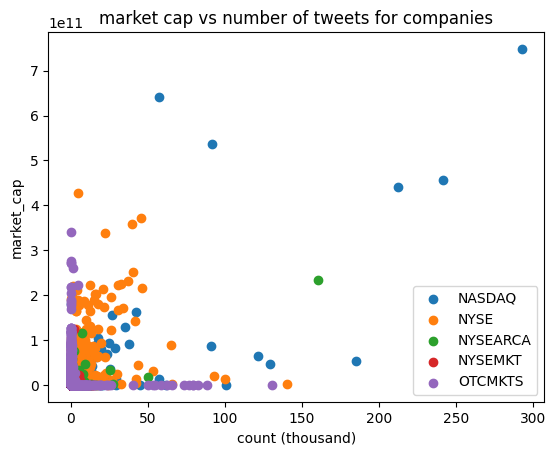

In [37]:
# رسم مارکت کپ بازارها
for i in range(len(le.classes_)) : 
    plt.scatter(full_entity_1[full_entity_1['exchange'] == i].dropna(subset=['market_cap'])['count']/1000 ,
                full_entity_1[full_entity_1['exchange'] == i].dropna(subset=['market_cap'])['market_cap'] , 
                 label = le.classes_[i] )

plt.xlabel("count (thousand)")
plt.ylabel("market_cap")
plt.title("market cap vs number of tweets for companies")
plt.legend()
plt.show()

# Time series movement directions through time for individual stocks

In [38]:
tweeted_copmanies.head(10)

,company,count
0,Apple Inc.,292631
1,"Amazon.com, Inc.",241710
2,Facebook Inc,212040
3,Tesla Inc,184992
4,SPDR S&P 500 ETF Tru,160688
5,LTC Properties Inc,140447
6,CHRON ORGANIZATION C,130409
7,PowerShares QQQ Trus,129154
8,"Netflix, Inc.",121325
9,"NeoGenomics, Inc.",100670


In [39]:
tweets = tweets.rename(columns={"id" : "tweet_id"})

In [40]:
# تابع محاسبه تاریخ
def get_date(x) : 
    res = []
    for i in x : 
        res.append(f"{i[0]}/{i[1]}/{i[2]}")
    return res
# 5 شرکت برتر از نظر تعداد توییت 
stocks_5 = ['Apple Inc.' , 'Amazon.com, Inc.' , 'Facebook Inc' , 'Tesla Inc' , 'Netflix, Inc.']
keys_keys = []
groups_gr = []
# محاسبه تعداد توییت های زده شده 5 شرکت برتر از نظر تعداد توییت
for i in range(len(stocks_5)) : 
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc]['ticker'].values[0]
    msk_5 = (entities['text'] == cc ) | (entities['text'] == tt )
    tweet_5 = pd.merge(entities[msk_5] , tweets , on='tweet_id' , how = 'inner' )
    groups = tweet_5.groupby(by=['year' , 'month' , 'day']).count()['tweet_id']
    key_gr = list(groups.keys())
    key_gr = get_date(key_gr)
    val_gr = groups.values
    keys_keys.append(key_gr)
    groups_gr.append(val_gr)

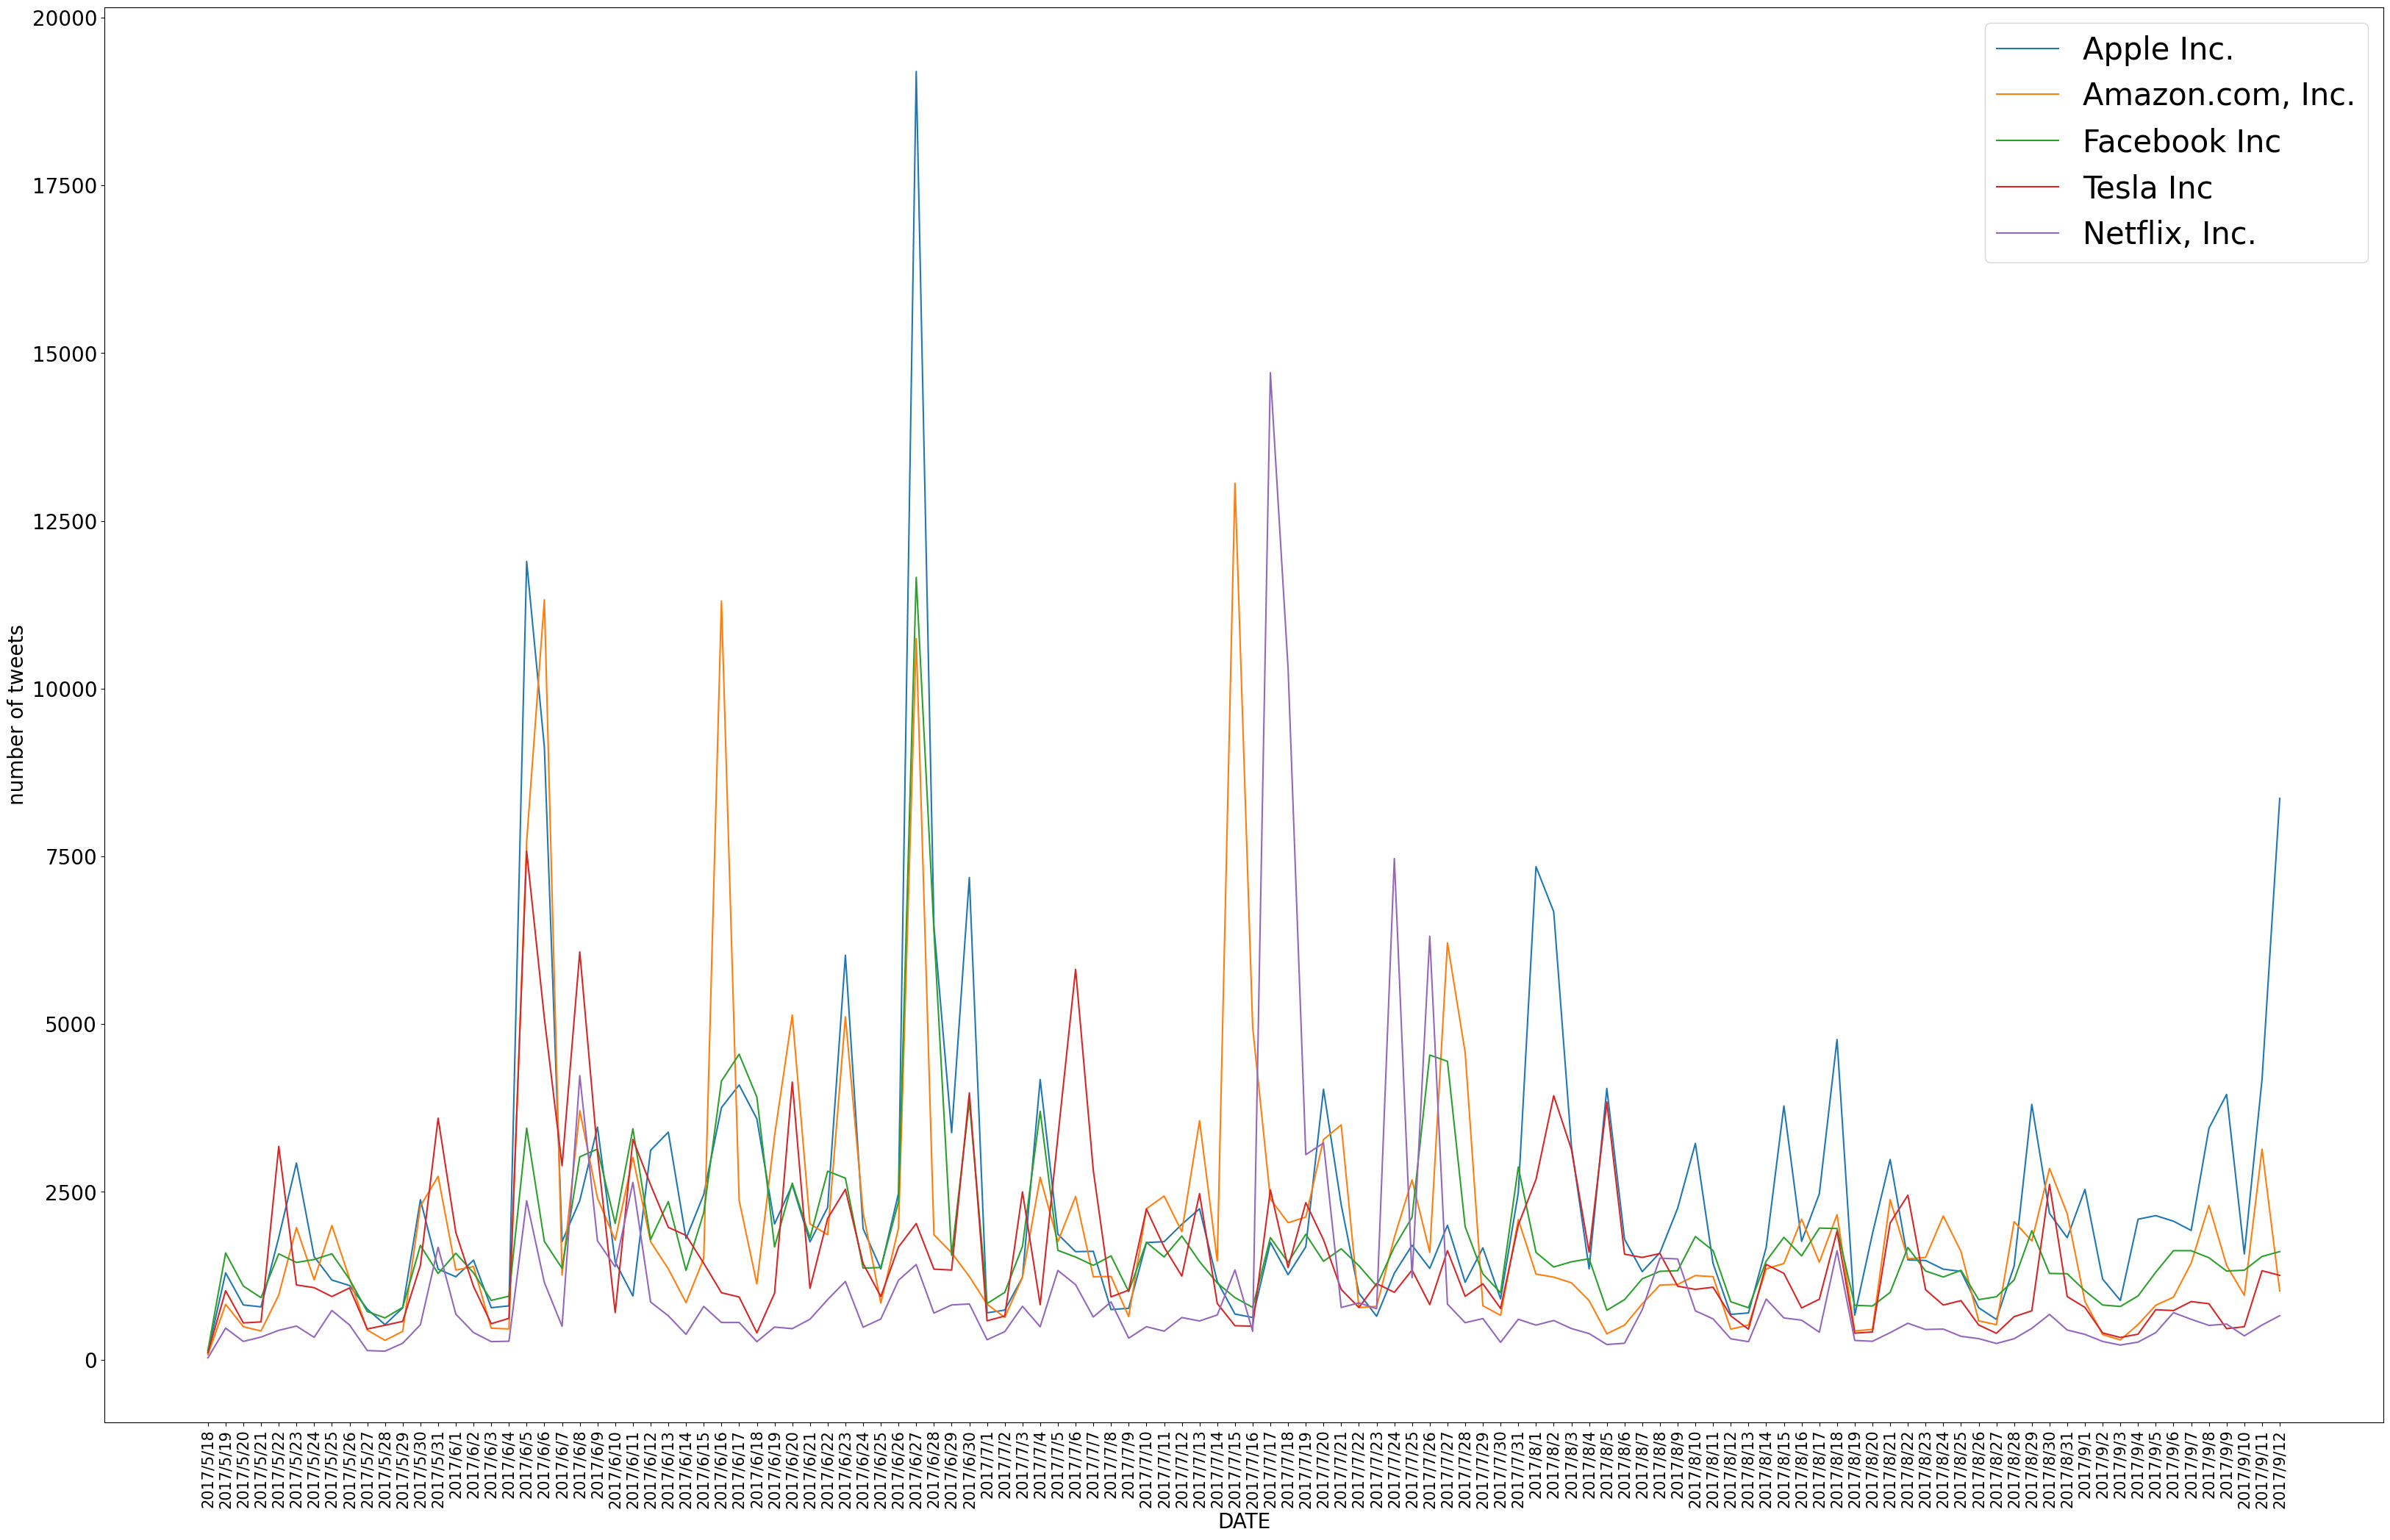

In [41]:
# رسم تعداد توییت های زده شده 5 شرکت برتر در طول زمان
ax_2 , fig_2 = plt.subplots(figsize = (40,25))
for i in range(len(stocks_5)) : 
    plt.plot(keys_keys[i] , groups_gr[i] , label = stocks_5[i])
plt.xticks(keys_keys[0] , rotation = 'vertical' , fontsize = 15)
plt.xlabel("DATE" , fontsize = 20)
plt.ylabel("number of tweets" , fontsize = 20)
plt.yticks(fontsize = 20 )
plt.legend(fontsize = 30)
plt.show()

In [42]:
# محاسبه میانگین هفت روز
def get_7_day_moving_average(x) : 
    n = len(x)
    res = []
    for i in range(3,n-4) : 
        res.append(sum(x[i-3:i+4]))
    return res

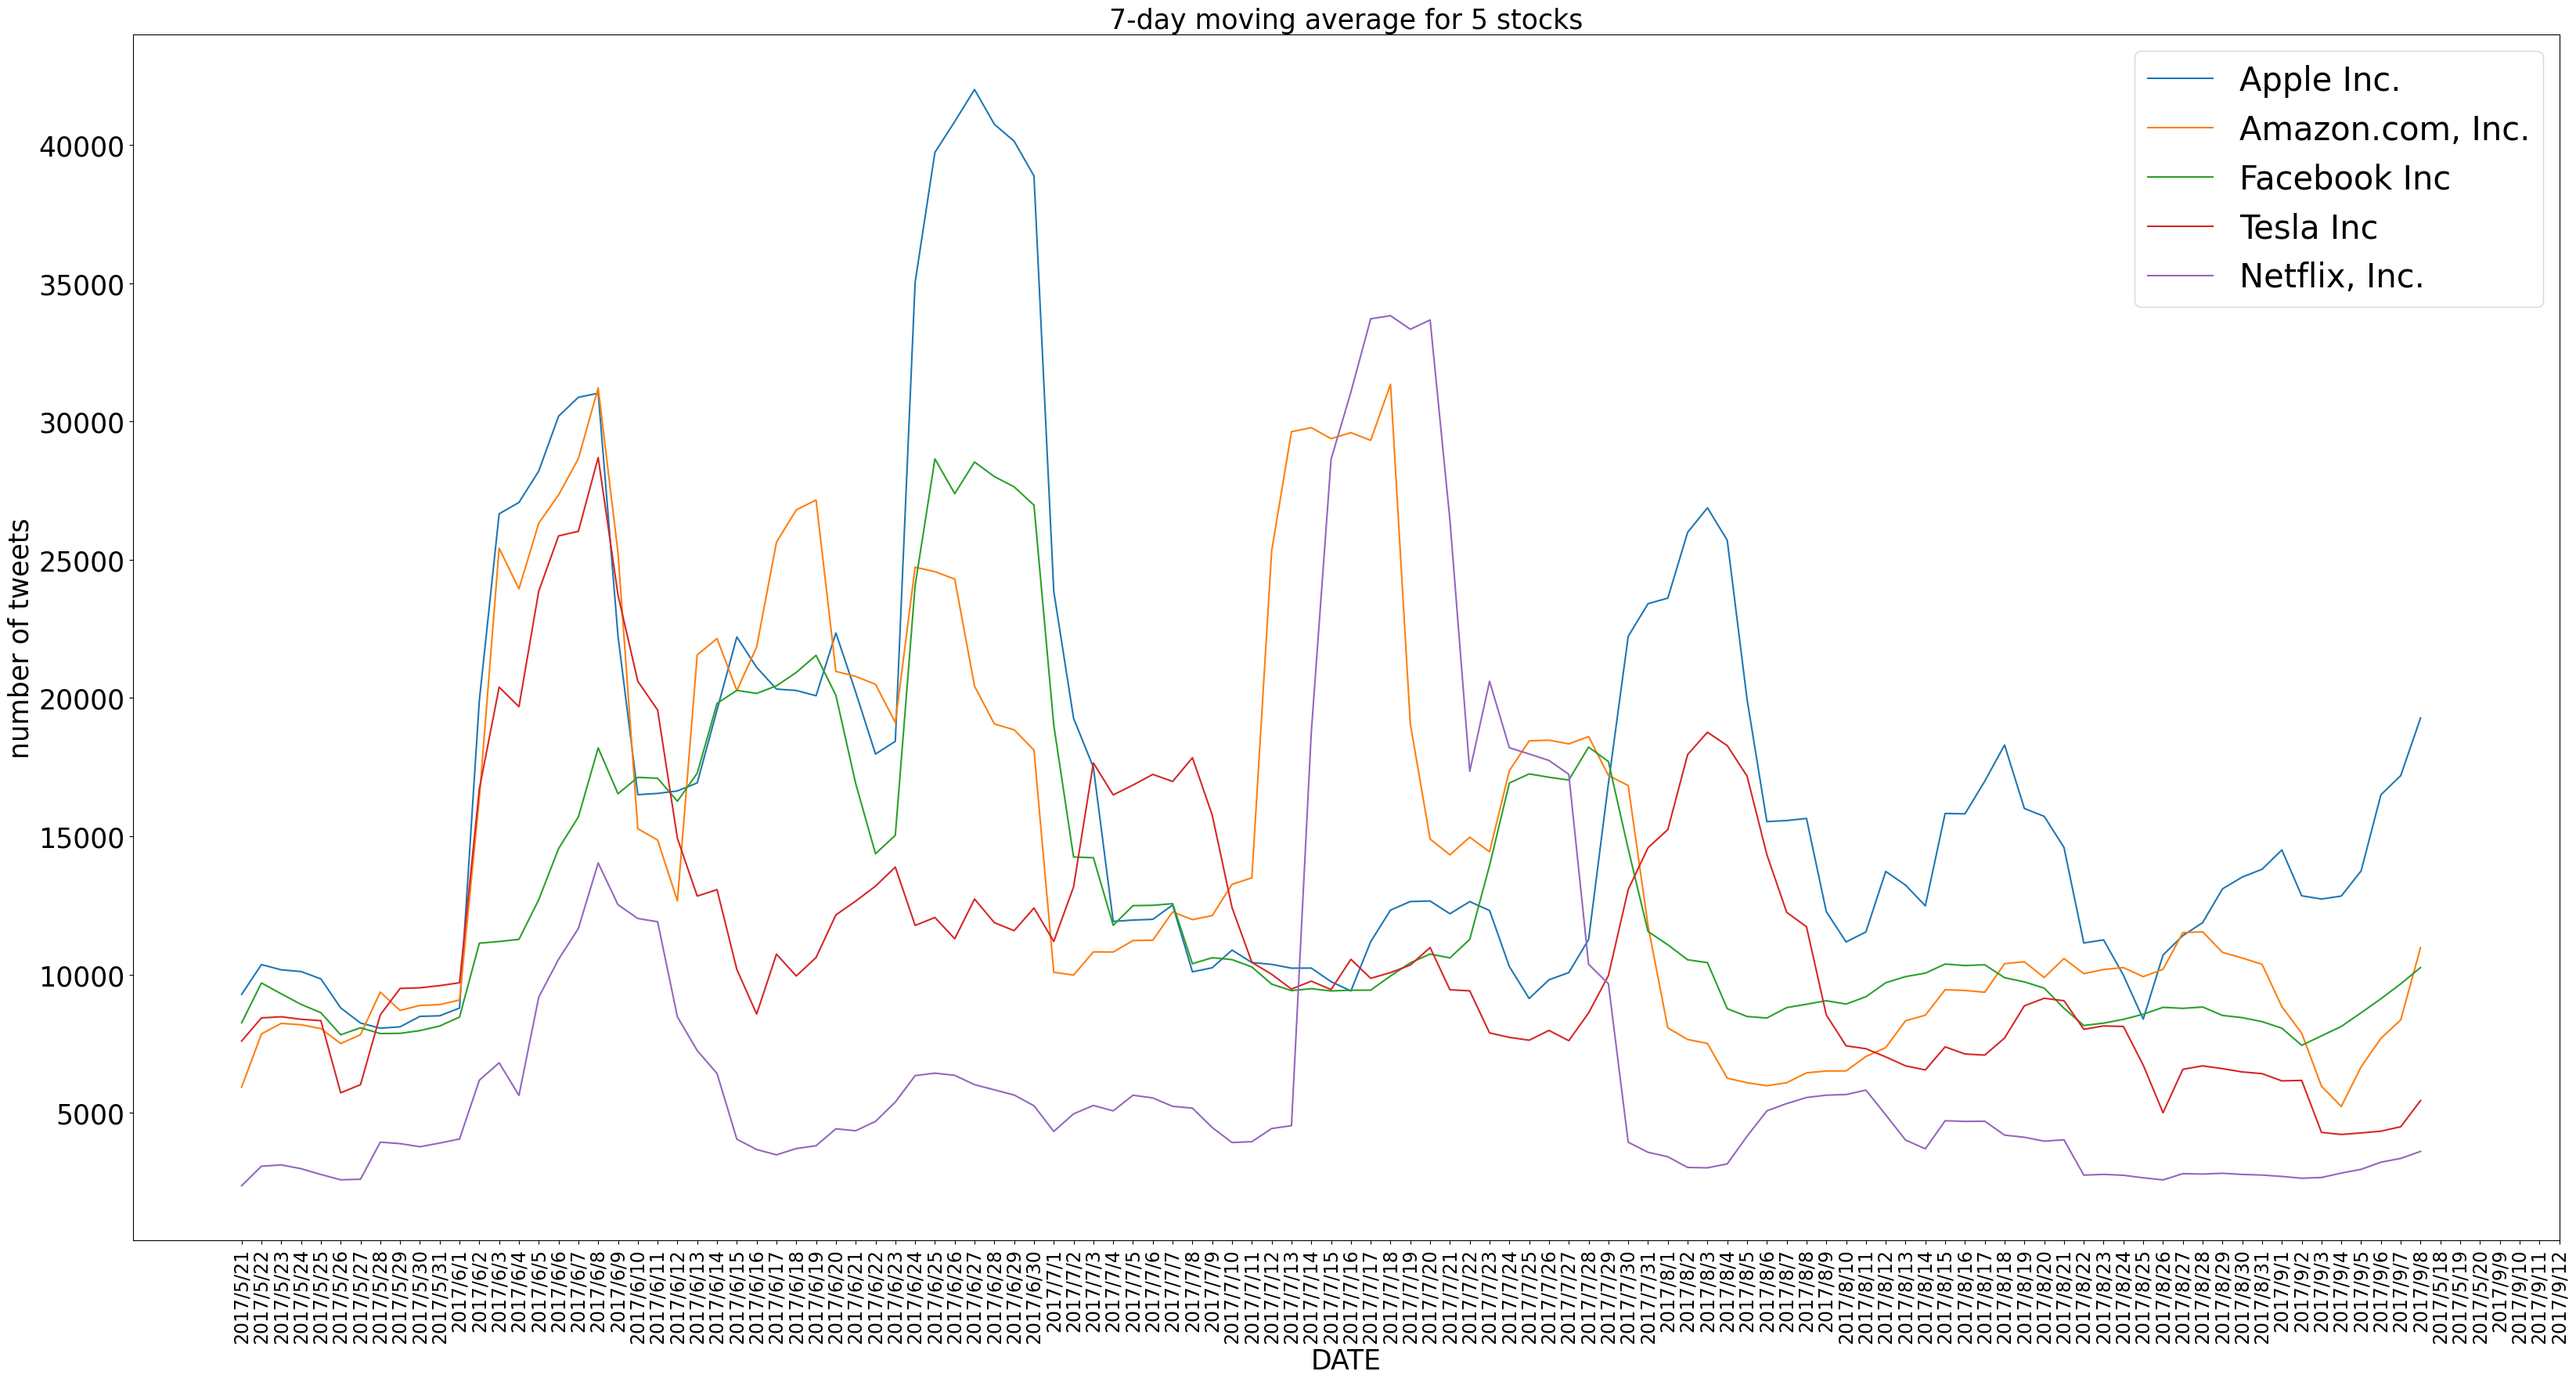

In [99]:
# رسم نمودار میانگین هفت روز تعداد توییت های زده شده 5 شرکت برتر در طول زمان
ax_3 , fig_3 = plt.subplots(figsize = (40,20))
for i in range(len(stocks_5)) : 
    moving = get_7_day_moving_average(groups_gr[i])
    plt.plot(keys_keys[0][3:-4] , moving , label = stocks_5[i])
plt.xticks(keys_keys[0] , rotation = 'vertical' , fontsize = 17)
plt.xlabel("DATE" , fontsize = 25)
plt.ylabel("number of tweets" , fontsize = 25)
plt.yticks(fontsize = 25 )
plt.legend(fontsize = 30)
plt.title("7-day moving average for 5 stocks" , fontsize = 25)
plt.show()

In [44]:
# Amazon : 
# در ماه ششم ، زمان ارائه عملکرد سه ماهه بوده 
# در ماه هفتم ، پیک بابت هفته 
# MADE_IN_AMERCA_WEEK

# Netflix : 
# در ماه ششم ، زمان ارائه عملکرد سه ماهه بوده
# در هفته دوم ماه هفتم ، زمان کامیک کان بوده + آغاز سریال 
# game of thrones

# apple : 
# در ماه هشتم ، بابت ارائه عملکرد سه ماهه ، پیک توییت ها را داشته ایم
# در ماه ششم ، تولد ده سالگی آیفون را داشته ایم و به همین خاطر ، پیک توییت ها را داشته ایم

# facebook : 
# در ماه ششم ، بابت ارائه عملکرد سه ماهه ، پیک توییت ها را داشته ایم
# در اواخر ماه ششم ، خبر آمده که کاربران فیس بوک از دو میلیارد نفر عبور کردند 

# tesla : 
# در ماه ششم ، بابت ارائه عملکرد سه ماهه ، پیک توییت ها را داشته ایم
# در ماه هشتم ، بابت ارائه عملکرد سه ماهه ، پیگ توییت ها را داشته ایم

# Statistics on distributions of all financial tweets

In [45]:
# به دست آوردن تعداد توییت های زده شده در طول زمان
all_tweets = tweets.groupby(by=['year' , 'month' , 'day']).count()['tweet_id']
gr_all = list(all_tweets.values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


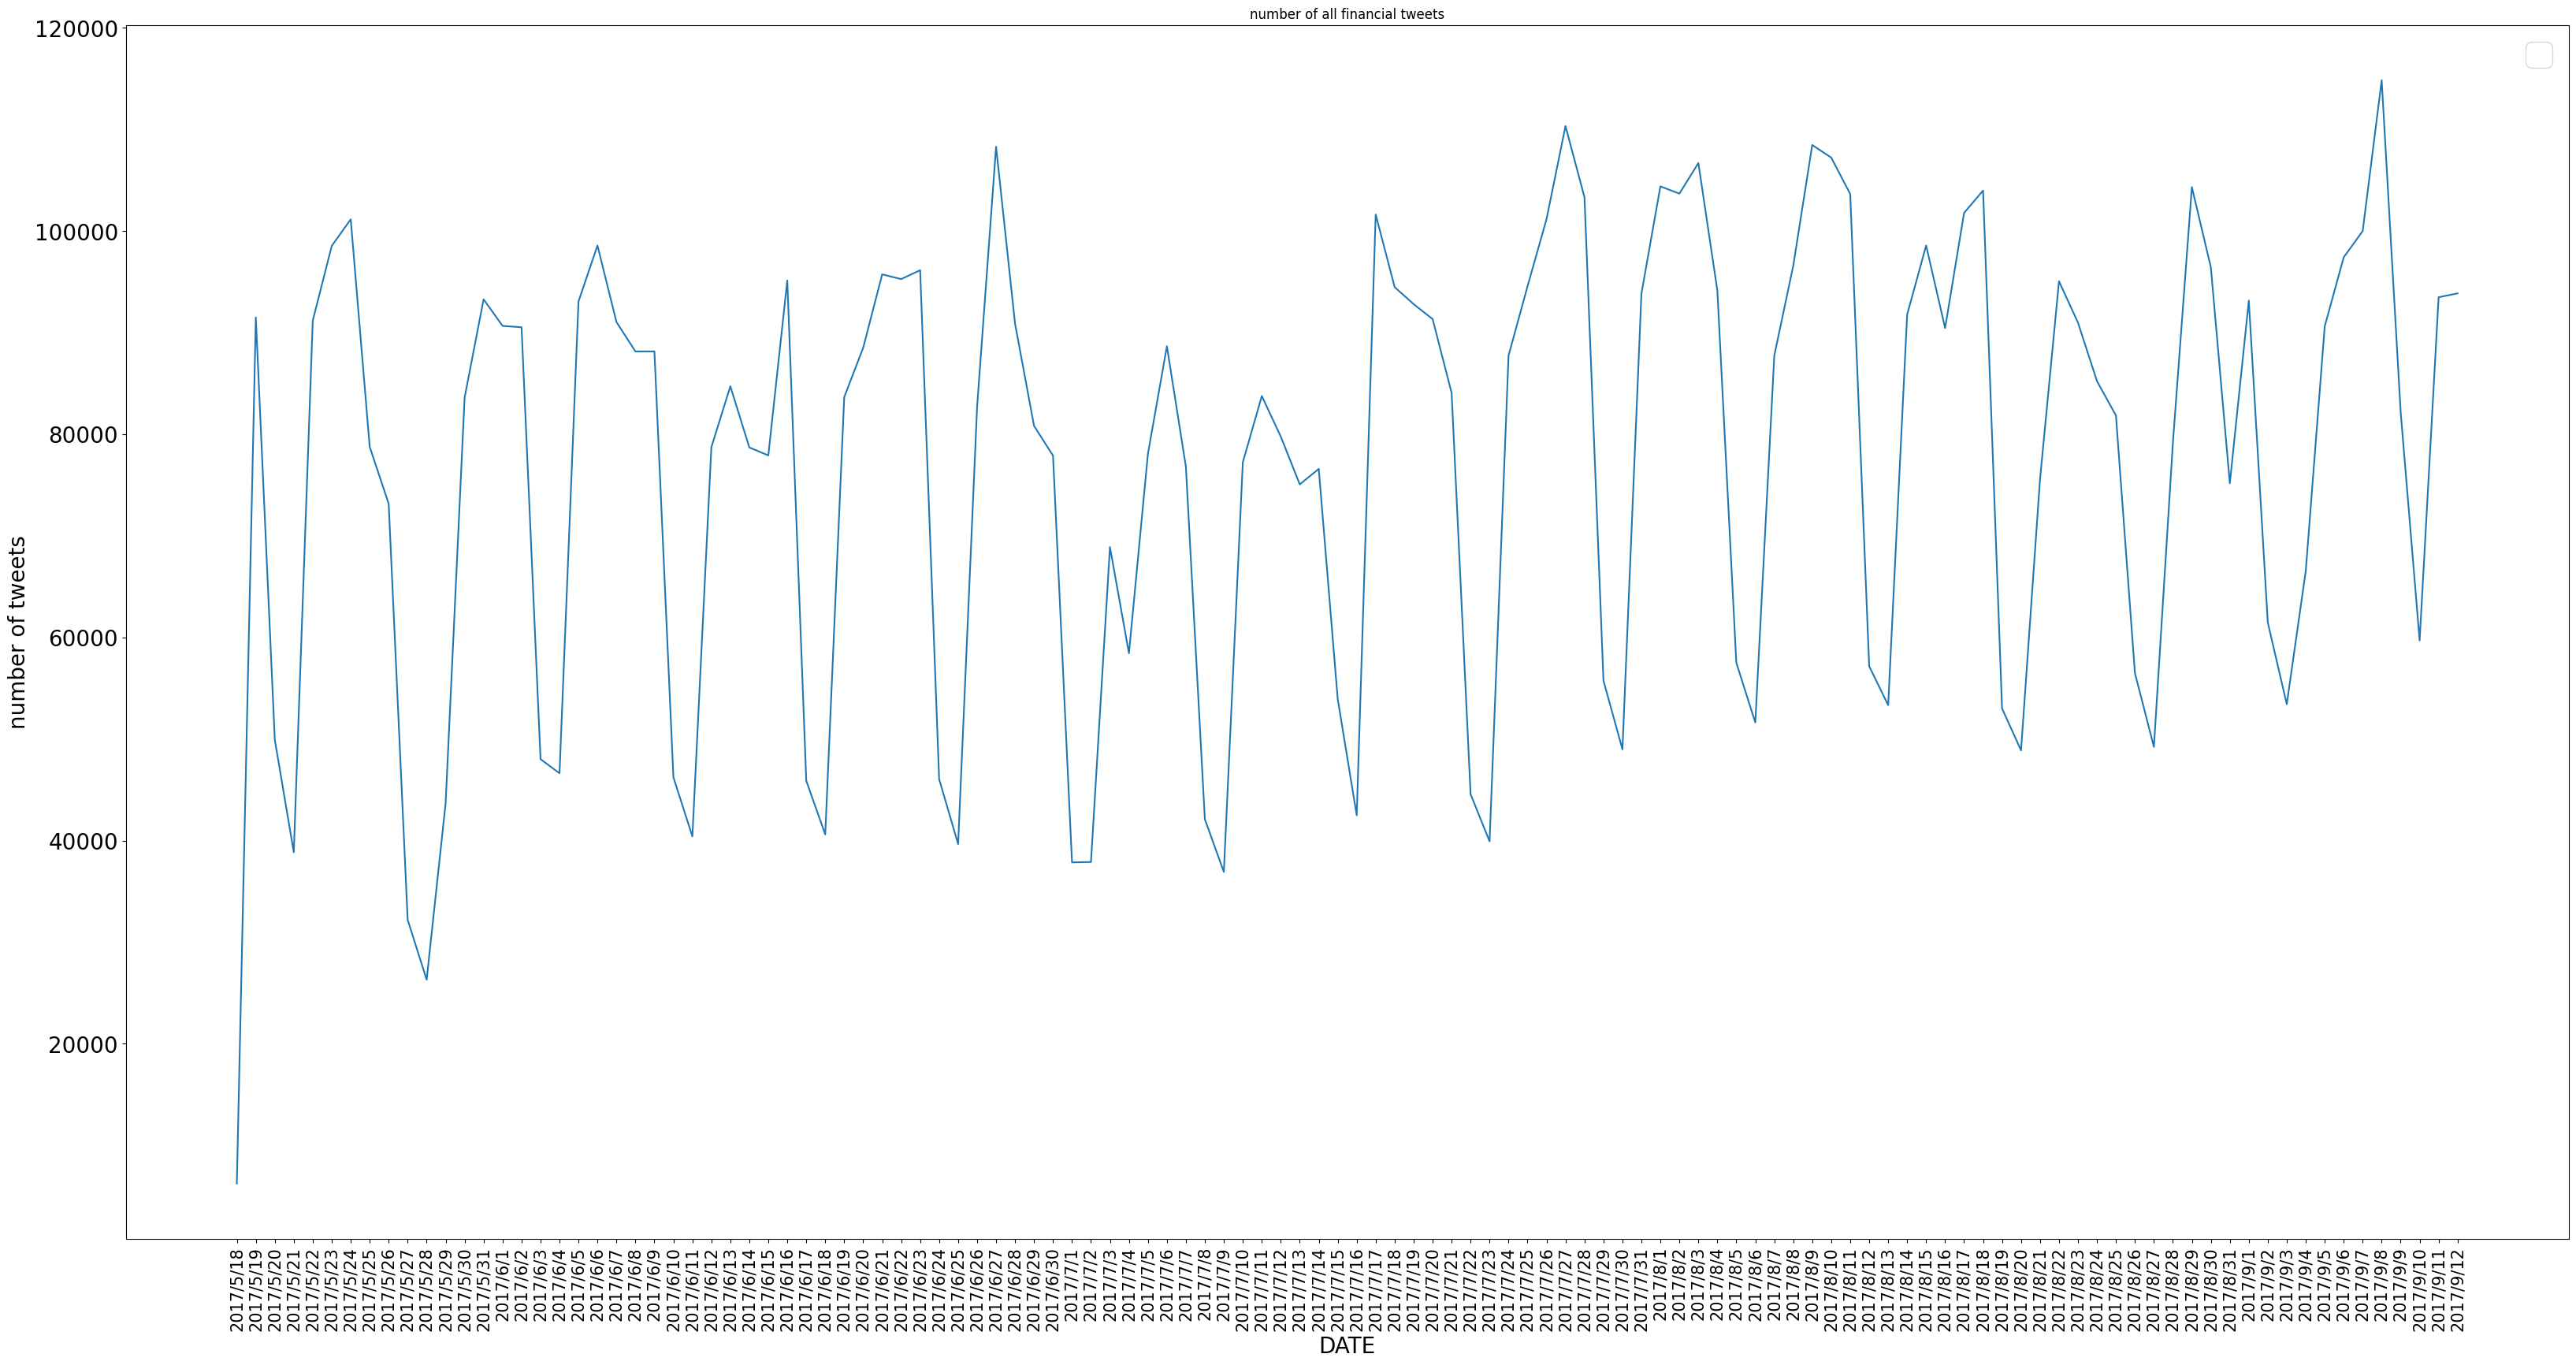

In [46]:
# رسم نمودار تعداد توییت های زده شده در طول زمان
fig_4 , ax_4 = plt.subplots(figsize = (40,20))
plt.plot(keys_keys[0] , gr_all )
plt.xticks(keys_keys[0] , rotation = 'vertical' , fontsize = 15)
plt.xlabel("DATE" , fontsize = 20)
plt.ylabel("number of tweets" , fontsize = 20)
plt.yticks(fontsize = 20 )
plt.legend(fontsize = 30)
plt.title("number of all financial tweets")
plt.show()

In [47]:
# به دست آوردن تعداد توییت ها در هر ساعت روز
all_hour = list(tweets.groupby(by=['hour']).count()['tweet_id'].values)
hours = list(tweets.groupby(by=['hour']).count()['tweet_id'].keys())

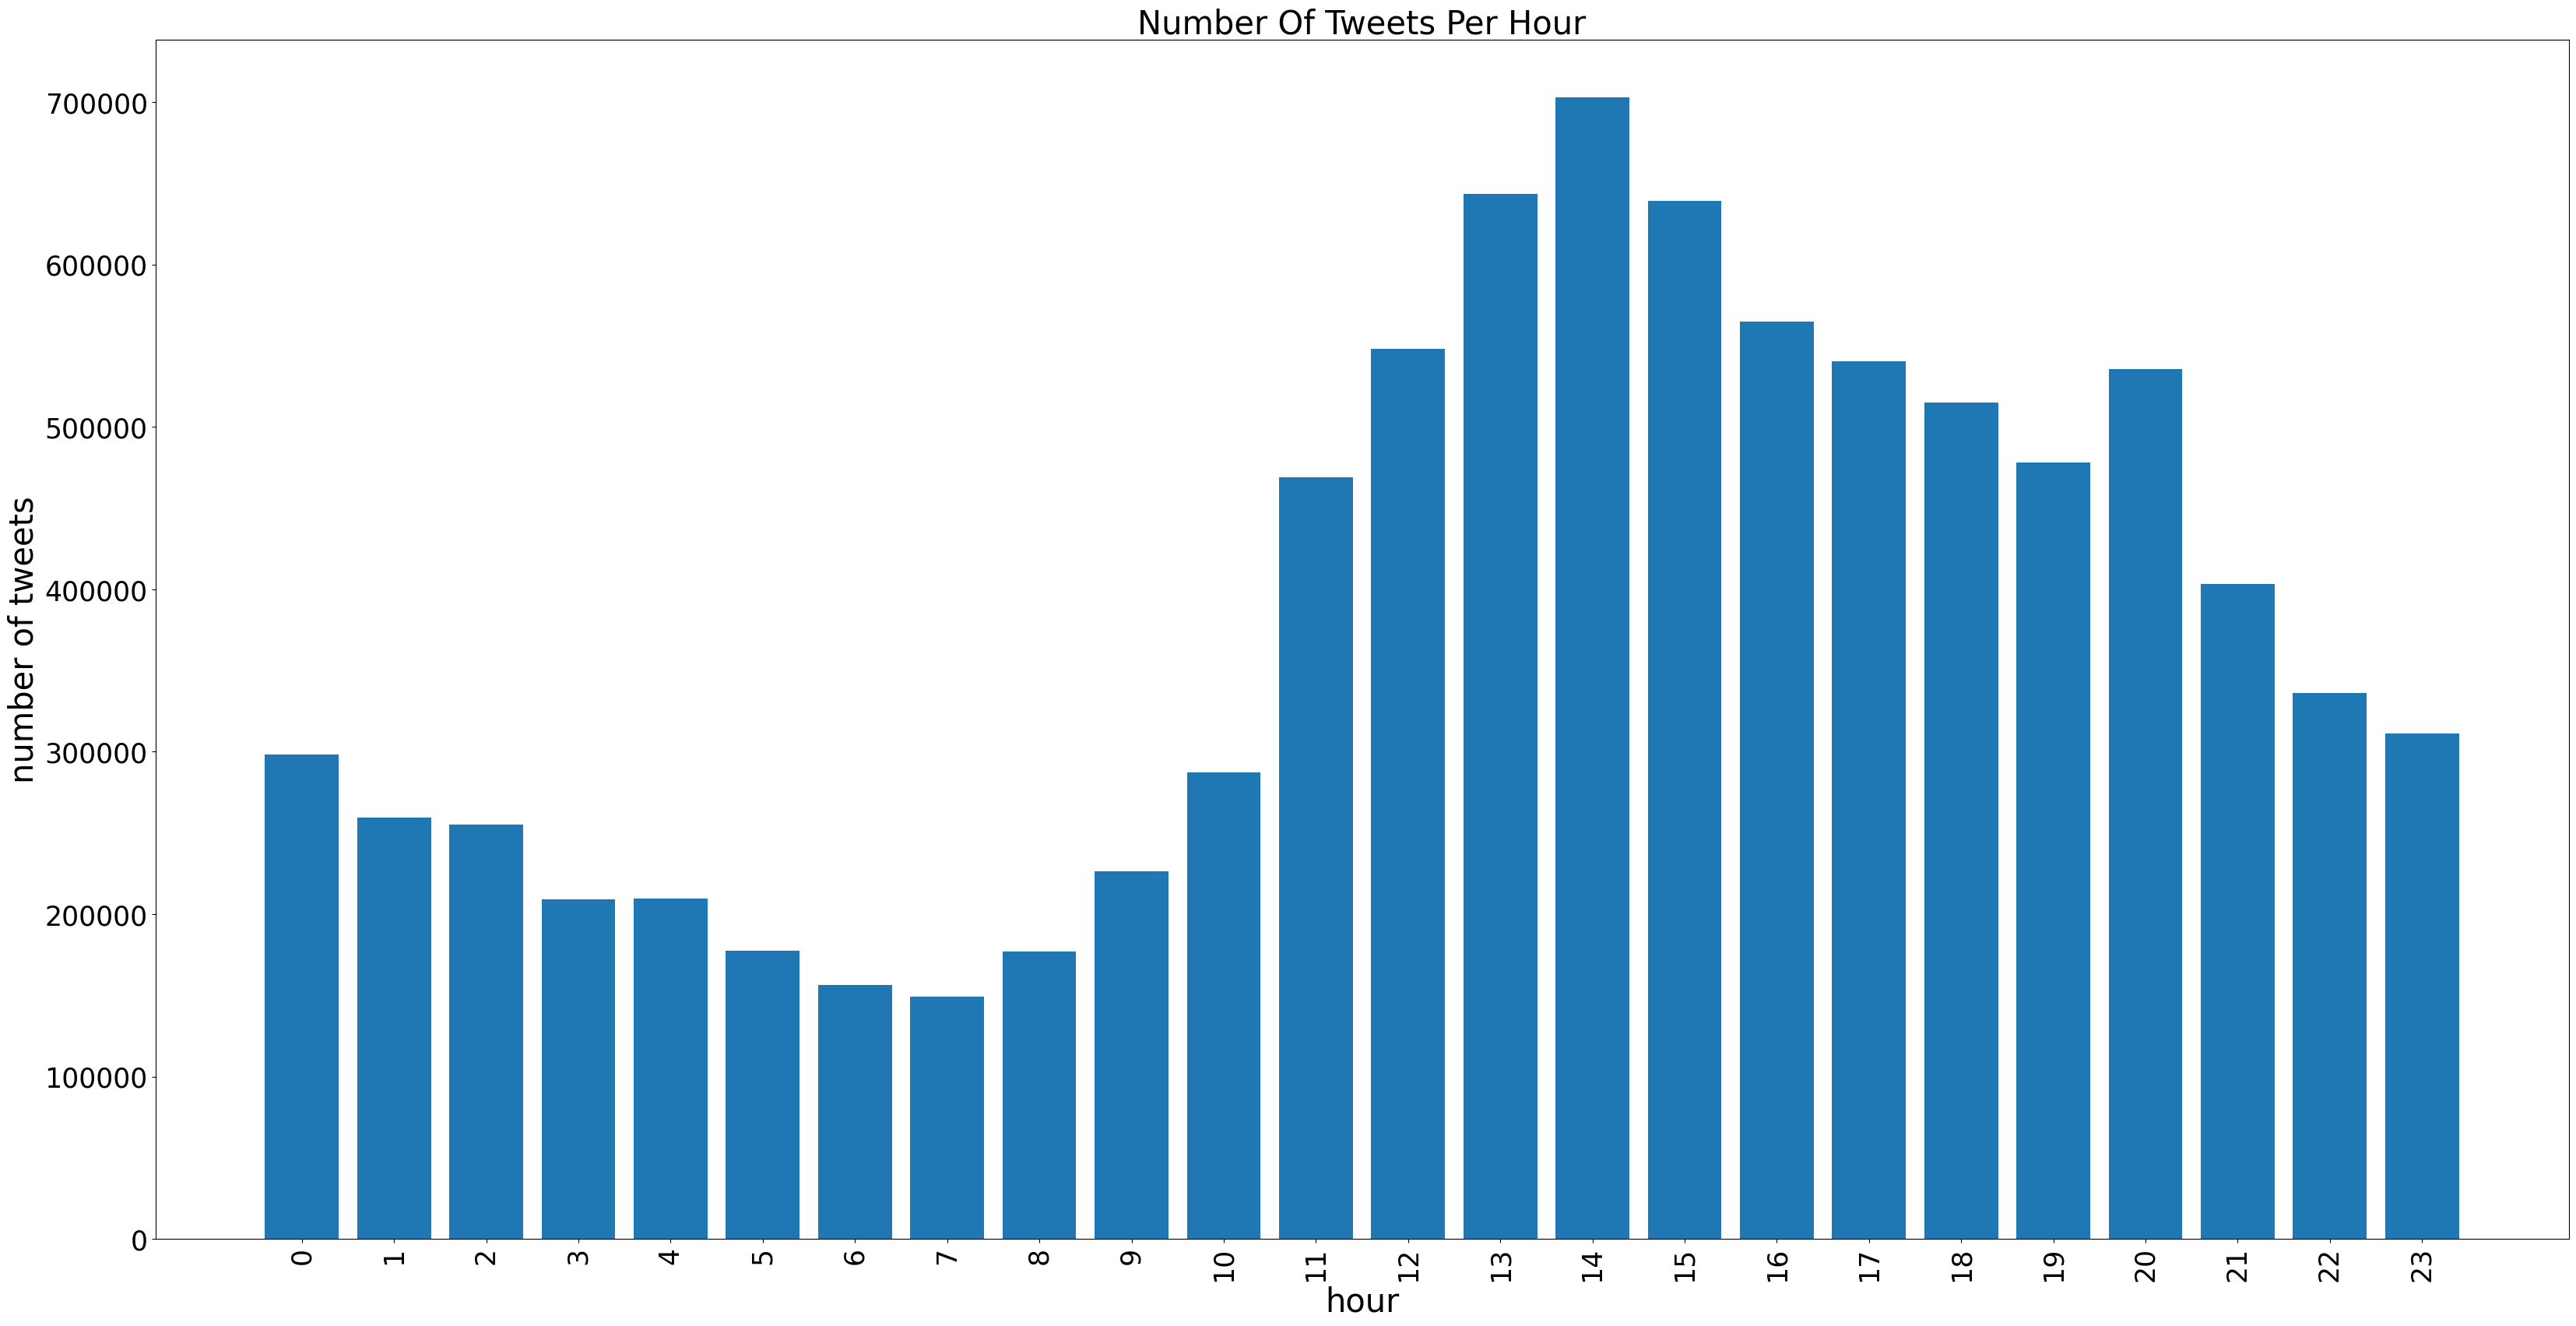

In [48]:
# رسم تعداد توییت ها در هر ساعت روز
fig_5 , ax_5 = plt.subplots(figsize = (40,20))
plt.bar(hours , all_hour )
plt.xticks(hours , rotation = 'vertical' , fontsize = 25)
plt.xlabel("hour" , fontsize = 30)
plt.ylabel("number of tweets" , fontsize = 30)
plt.yticks(fontsize = 25 )
plt.title("Number Of Tweets Per Hour" , fontsize = 30)
plt.show()

In [49]:
# به دست آوردن تعداد توییت ها در روز های هفته
week_day_all = tweets.groupby(by=['week_day']).count()['tweet_id']
week_days = list(week_day_all.keys())
number_per_week_day = list(week_day_all.values)

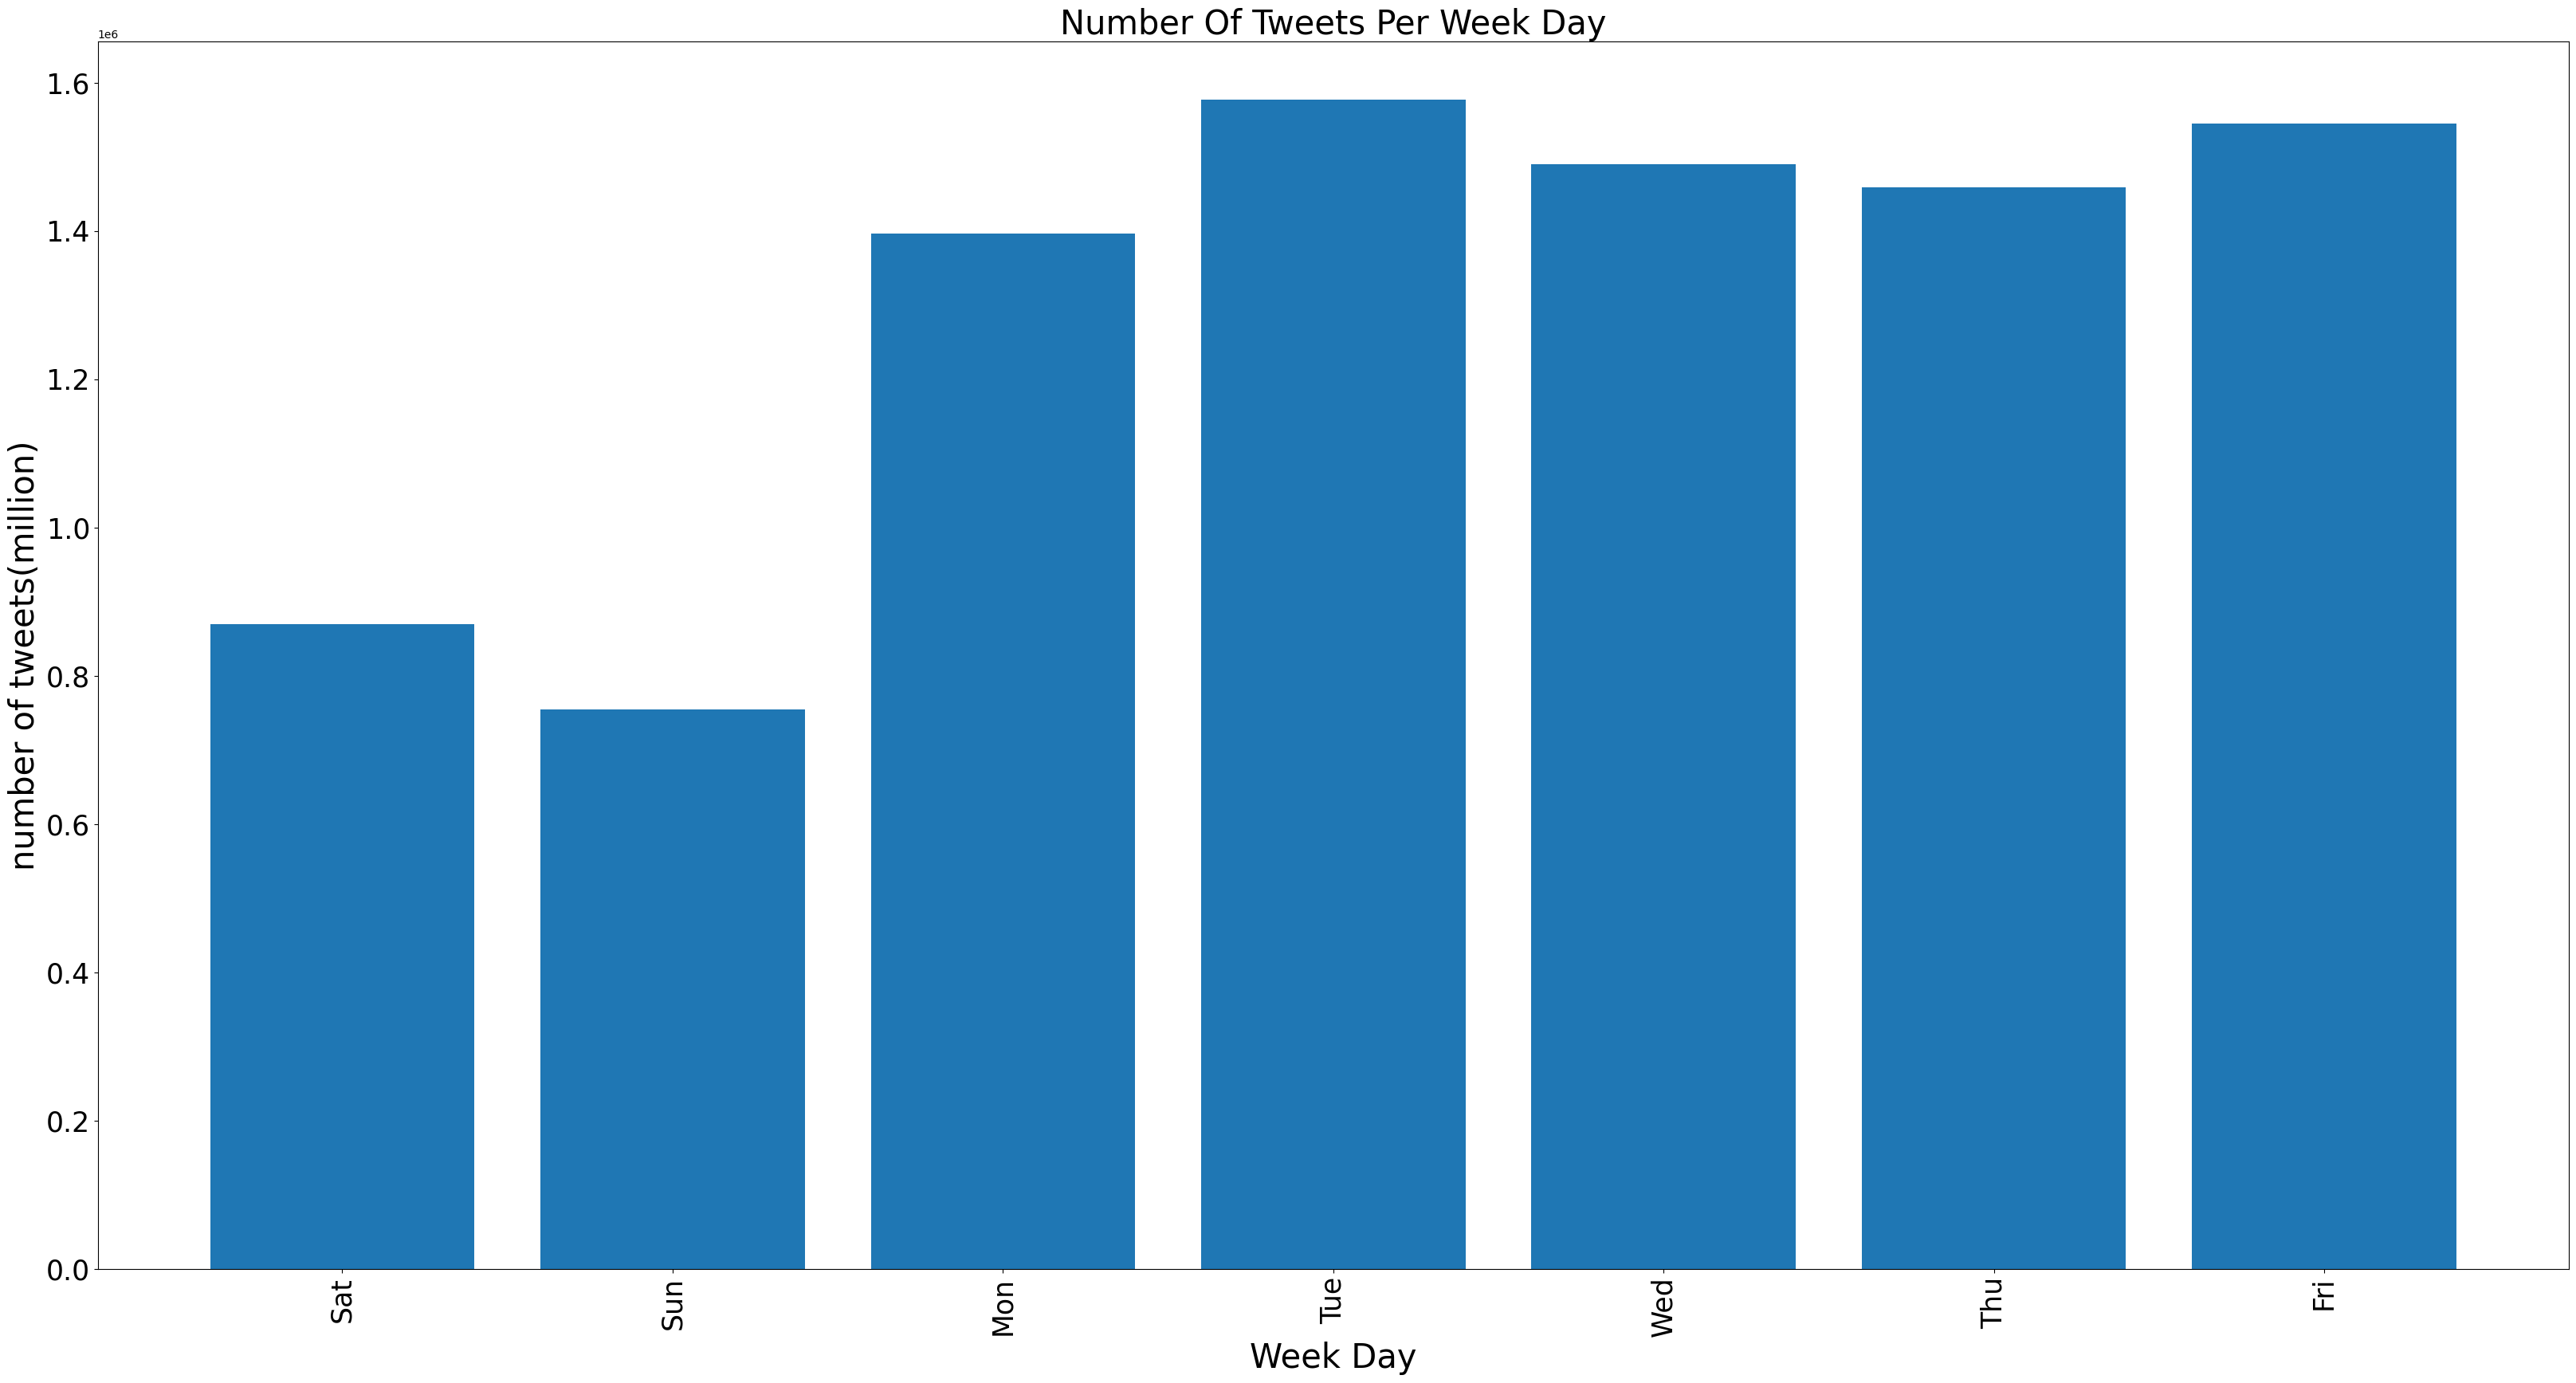

In [50]:
# رسم تعداد توییت ها در روزهای هفته
def get_week_day_inv(x) : 
    res = []
    inv_week = {1:'Sat' , 2:'Sun' , 3:'Mon' , 4:'Tue' , 5:'Wed' , 6:'Thu' , 7:'Fri' }
    for i in range(len(x)) : 
        res.append(inv_week[x[i]])
    return res
week_days = get_week_day_inv(week_days)
fig_6 , ax_6 = plt.subplots(figsize = (40,20))
plt.bar(week_days , number_per_week_day )
plt.xticks(week_days , rotation = 'vertical' , fontsize = 25)
plt.xlabel("Week Day" , fontsize = 30)
plt.ylabel("number of tweets(million)" , fontsize = 30)
plt.yticks(fontsize = 25 )
plt.title("Number Of Tweets Per Week Day" , fontsize = 30)
plt.show()

In [51]:
import seaborn as sns

In [52]:
# به دست آوردن تعداد توییت ها در هر روز هفته و هر ساعت روز
week_hour_all = tweets.groupby(by=['week_day' , 'hour']).count()['tweet_id']
week_hour = list(week_hour_all.keys())
number_week_hour = list(week_hour_all.values)

In [53]:
# به دست آوردن روزهای هفته
ress = {}
week_dd = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday'] 
for i in range(24) : 
    ress[i] = {}
    for j in range(1,len(week_dd)+1) : 
        ress[i][week_dd[j-1]] = week_hour_all[j,i]
week_hour_df = pd.DataFrame(ress)

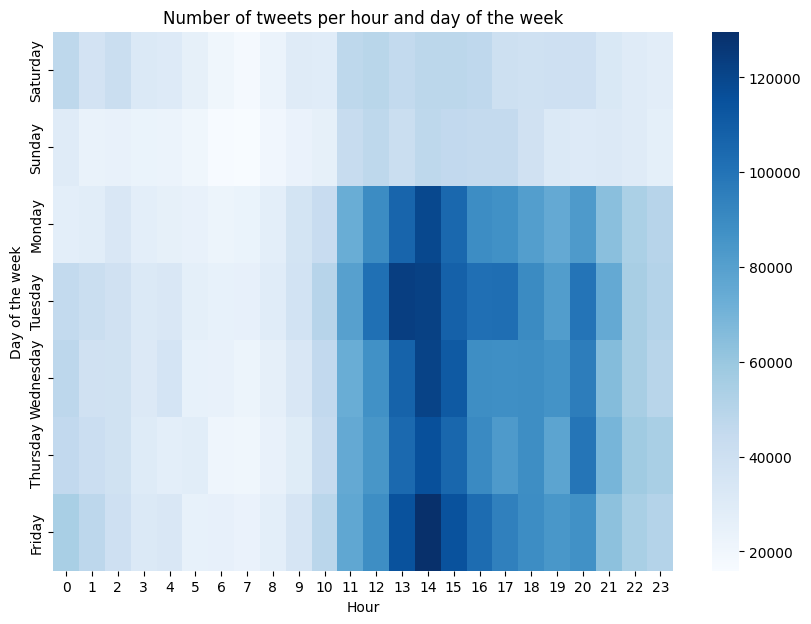

In [54]:
# رسم ماتریس تعداد توییت ها در ساعت و هر روز هفته
fig_7 , ax_7 = plt.subplots(figsize= (10,7))
sns.heatmap(week_hour_df , cmap = "Blues")
plt.title("Number of tweets per hour and day of the week")
plt.xlabel("Hour")
plt.ylabel("Day of the week")
plt.show()

# Statistics on distributions of retweets per tweets

In [55]:
tweets[tweets['retweeted_status_id'] != 0 ]

,tweet_id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,year,month,day,hour,week_day
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017,2017,5,18,22,6
7,865326138205368320,RT @djdsk3000: $ltc it's about that time #LTC,859451814940336128,0,0,865322401357279232,2828082991,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:02 +0000 2017,2017,5,18,22,6
11,865326150205284353,RT @bapao83: Enough said $ltc https://t.co/dnE...,859451814940336128,0,0,865322296189308954,2242964546,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:05 +0000 2017,2017,5,18,22,6
13,865326157968834563,RT @AceCrypto: $LTC ????!!!!!!,859451814940336128,0,0,865321664124530690,860456169189638144,und,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:07 +0000 2017,2017,5,18,22,6
14,865326159549968389,"RT @whotrades: Why Ascena Retail Group, Arcos ...",780527807419998208,0,0,865325921288564737,164624616,en,"<a href=""http://www.github.com/lashgar"" rel=""n...",Thu May 18 22:00:08 +0000 2017,2017,5,18,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091492,907725316436758528,RT @theflynews: Micron upgraded to Buy from Ne...,43549084,0,0,907723506636398592,166597717,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Sep 12 21:59:14 +0000 2017,2017,9,12,21,4
9091507,907725347130572800,RT @gkariopp: . $MU Citigroup Inc. Reaffirms ...,43549084,0,0,907723527314448384,3399893895,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Sep 12 21:59:22 +0000 2017,2017,9,12,21,4
9091517,907725416349224960,RT @turco_hernan: $PGR #PGR ???? https://t.co/...,889664180692942849,0,0,907724084871655424,1291158379,und,"<a href=""http://twitter.com/download/android"" ...",Tue Sep 12 21:59:38 +0000 2017,2017,9,12,21,4
9091519,907725420417740800,RT @Franke247: Currently $DGB can handle massi...,3049307231,0,0,907671195495092224,1456866636,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Sep 12 21:59:39 +0000 2017,2017,9,12,21,4


In [56]:
# مشخص کردن توییت هایی که ریتوییت شده اند
retwe = tweets['retweeted_status_id'].value_counts()[1:]
retweets = list(retwe.keys())
number_retweets = list(retwe.values)

In [57]:
# محاسبه نسبت ریتوییت به توییت در زمان
key_ret_mean = []
ret_mean = []
for i in range(len(stocks_5)) : 
    retweet_df = pd.DataFrame({'tweet_id':retweets , 'number_retweets':number_retweets})
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc ]['ticker'].values[0]
    msk_comp = (entities['text'] == cc) | (entities['text'] == tt )
    selected_entities = pd.merge(entities[msk_comp] , tweets , on = 'tweet_id' , how = 'inner')
    retweet_df = pd.merge(retweet_df  , selected_entities, on='tweet_id'  , how = 'inner')
    rr = retweet_df.groupby(by=['year' , 'month' , 'day']).sum()['number_retweets']
    aa = selected_entities.groupby(by=['year' , 'month' , 'day']).count()['tweet_id']
    key_ret_mean.append(get_date(list(rr.keys())))
    ret_mean.append(np.array(rr.values)/np.array(aa.values))

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


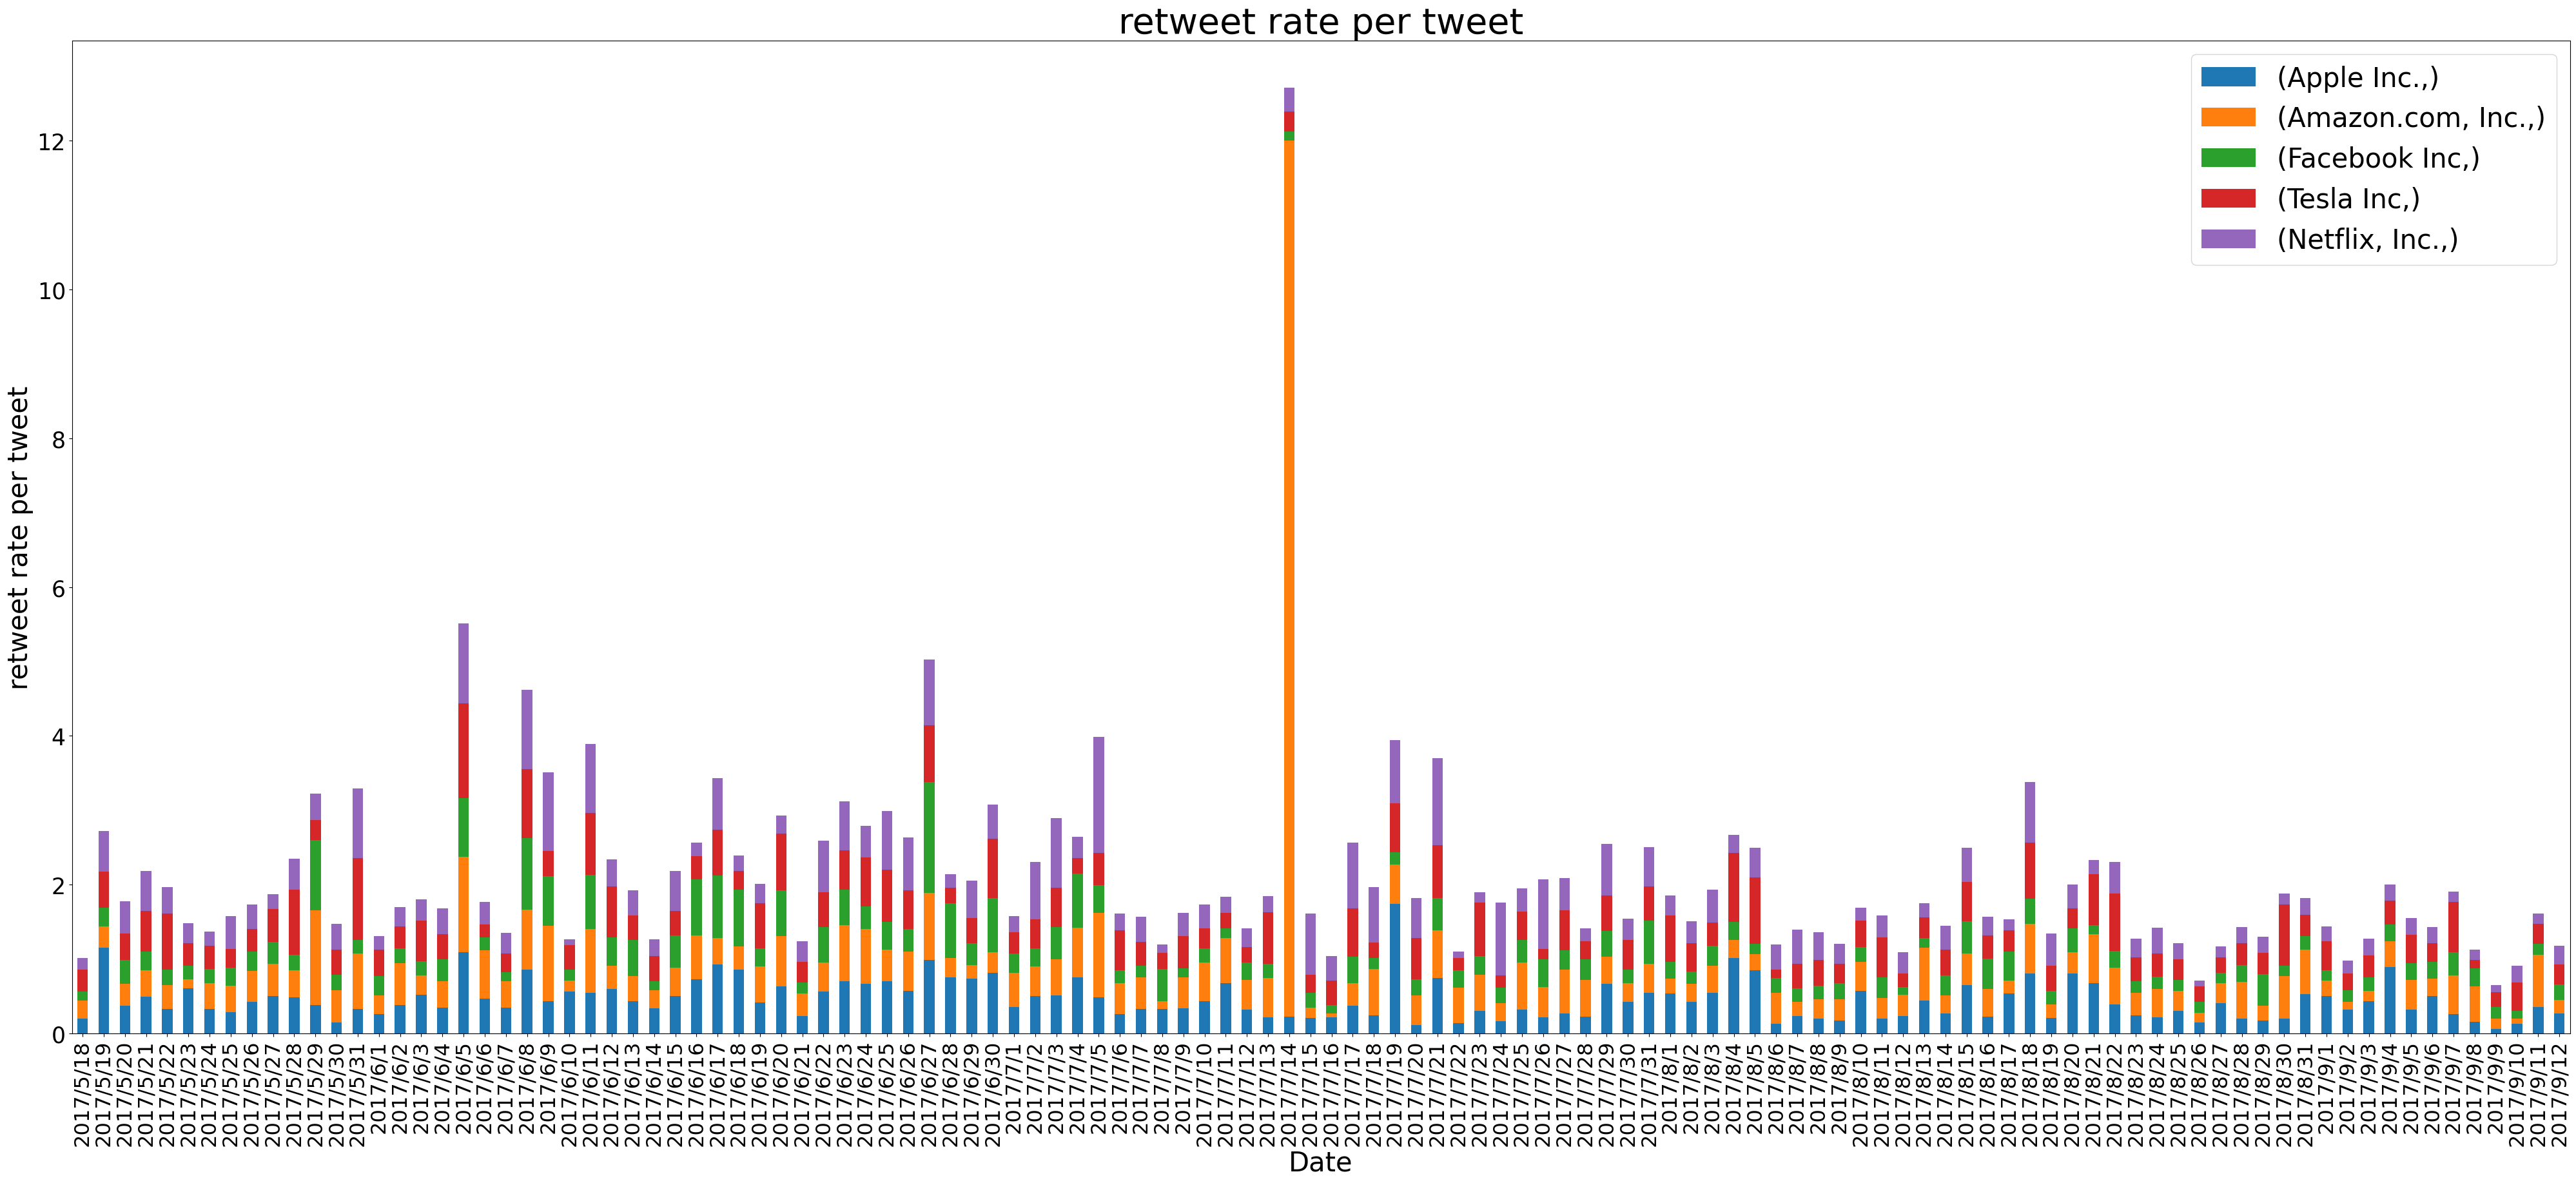

In [58]:
# رسم نسبت ریتوییت به توییت در زمان
stocks_5 = ['Apple Inc.' , 'Amazon.com, Inc.' , 'Facebook Inc' , 'Tesla Inc' , 'Netflix, Inc.']
df_stock_5_ret = pd.DataFrame(index= key_ret_mean[0] , data = np.array(ret_mean).T , columns=[stocks_5])
df_stock_5_ret
fig_9 , ax_9 = plt.subplots(figsize = (50,20))
df_stock_5_ret.plot.bar( stacked= True  , rot = 90 , ax = ax_9)
plt.xlabel("Date" , fontsize = 30)
plt.ylabel("retweet rate per tweet" , fontsize = 30)
plt.xticks(fontsize = 23)
plt.yticks(fontsize=25)
plt.legend(fontsize = 30)
plt.title("retweet rate per tweet" , fontsize = 40)
plt.show()
# ax_9

In [59]:
# به دست آوردن نسبت تعداد ریتوییت ها به توییت در هر ساعت
key_ret_hour = []
ret_hour = []
for i in range(len(stocks_5)) : 
    retweet_df = pd.DataFrame({'tweet_id':retweets , 'number_retweets':number_retweets})
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc ]['ticker'].values[0]
    msk_comp = (entities['text'] == cc) | (entities['text'] == tt )
    selected_entities = pd.merge(entities[msk_comp] , tweets , on = 'tweet_id' , how = 'inner')
    retweet_df = pd.merge(retweet_df  , selected_entities, on='tweet_id'  , how = 'inner')
    rr = retweet_df.groupby(by=['hour']).sum()['number_retweets']
    aa = selected_entities.groupby(by=['hour']).count()['tweet_id']
    key_ret_hour.append(list(rr.keys()))
    ret_hour.append(np.array(rr.values) / np.array(aa.values))

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


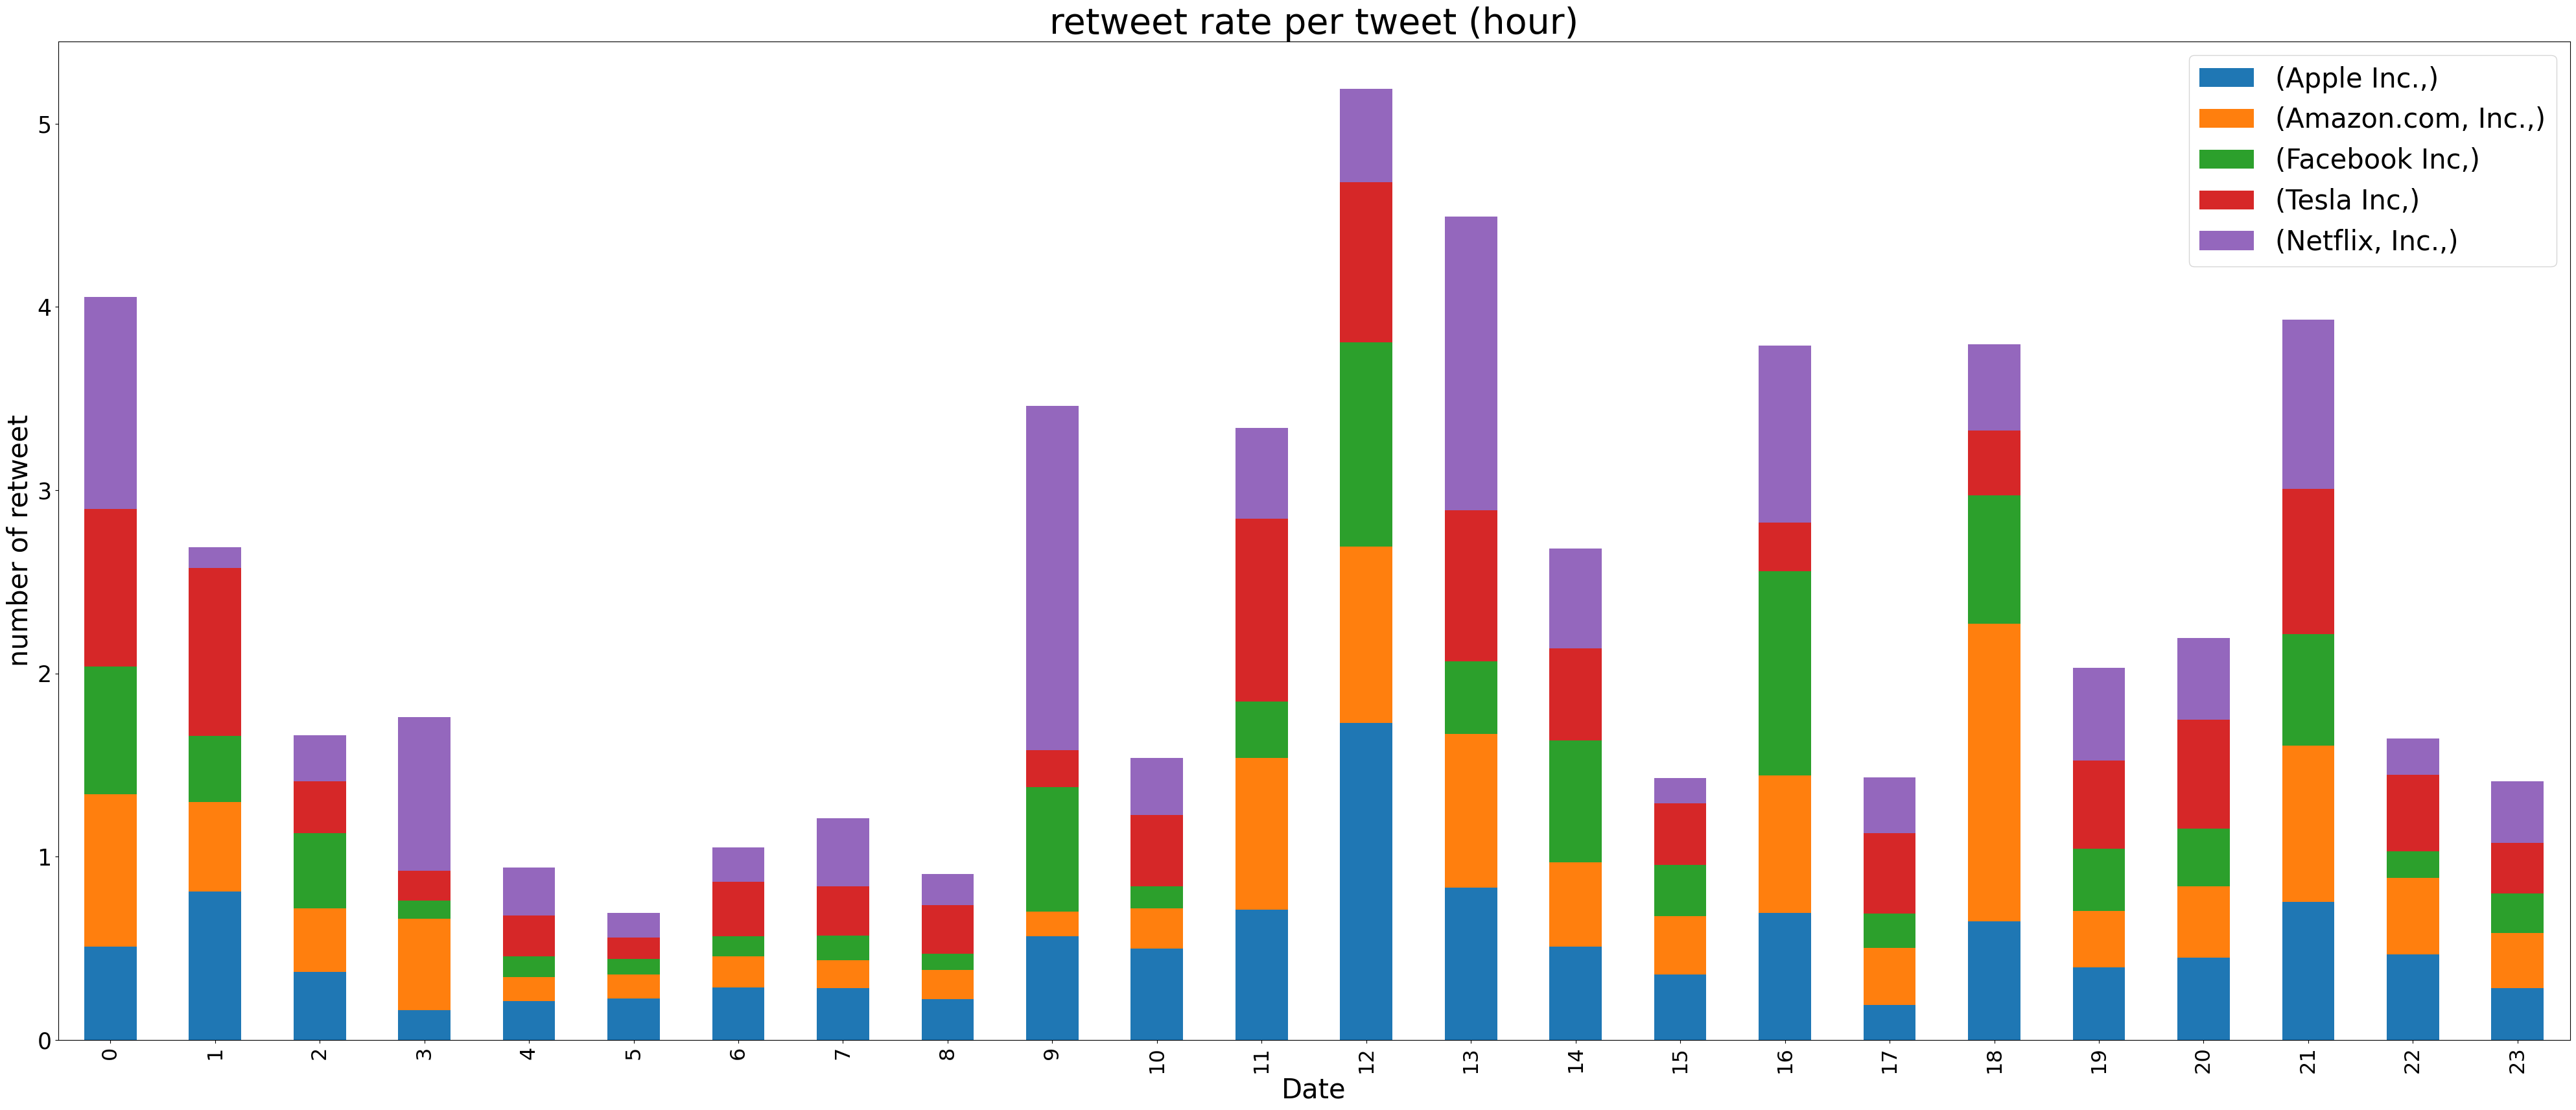

In [60]:
# رسم نسبت ریتوییت ها به توییت در ساعت
df_ret_hour = pd.DataFrame(index= key_ret_hour[0] , data = np.array(ret_hour).T , columns=[stocks_5])
df_ret_hour
fig_10 , ax_10 = plt.subplots(figsize = (50,20))
df_ret_hour.plot.bar( stacked= True  , rot = 90 , ax = ax_10)
plt.xlabel("Date" , fontsize = 30)
plt.ylabel("number of retweet" , fontsize = 30)
plt.xticks(fontsize = 23)
plt.yticks(fontsize=25)
plt.legend(fontsize = 30)
plt.title("retweet rate per tweet (hour)" , fontsize = 40)
plt.show()

# Statistics on most important financial information on individual stocks

In [61]:
# Statistics on most important financial information on individual stocks
# مشخص کردن مارکت مربوط به هر بازار
exs = list(companies['exchange'].value_counts().keys())
ex_data = []
for i in exs : 
    comp_ex = list(companies[companies['exchange'] == i ].dropna(subset = ['capitalization'])['capitalization'].values)
    ex_data.append(comp_ex)

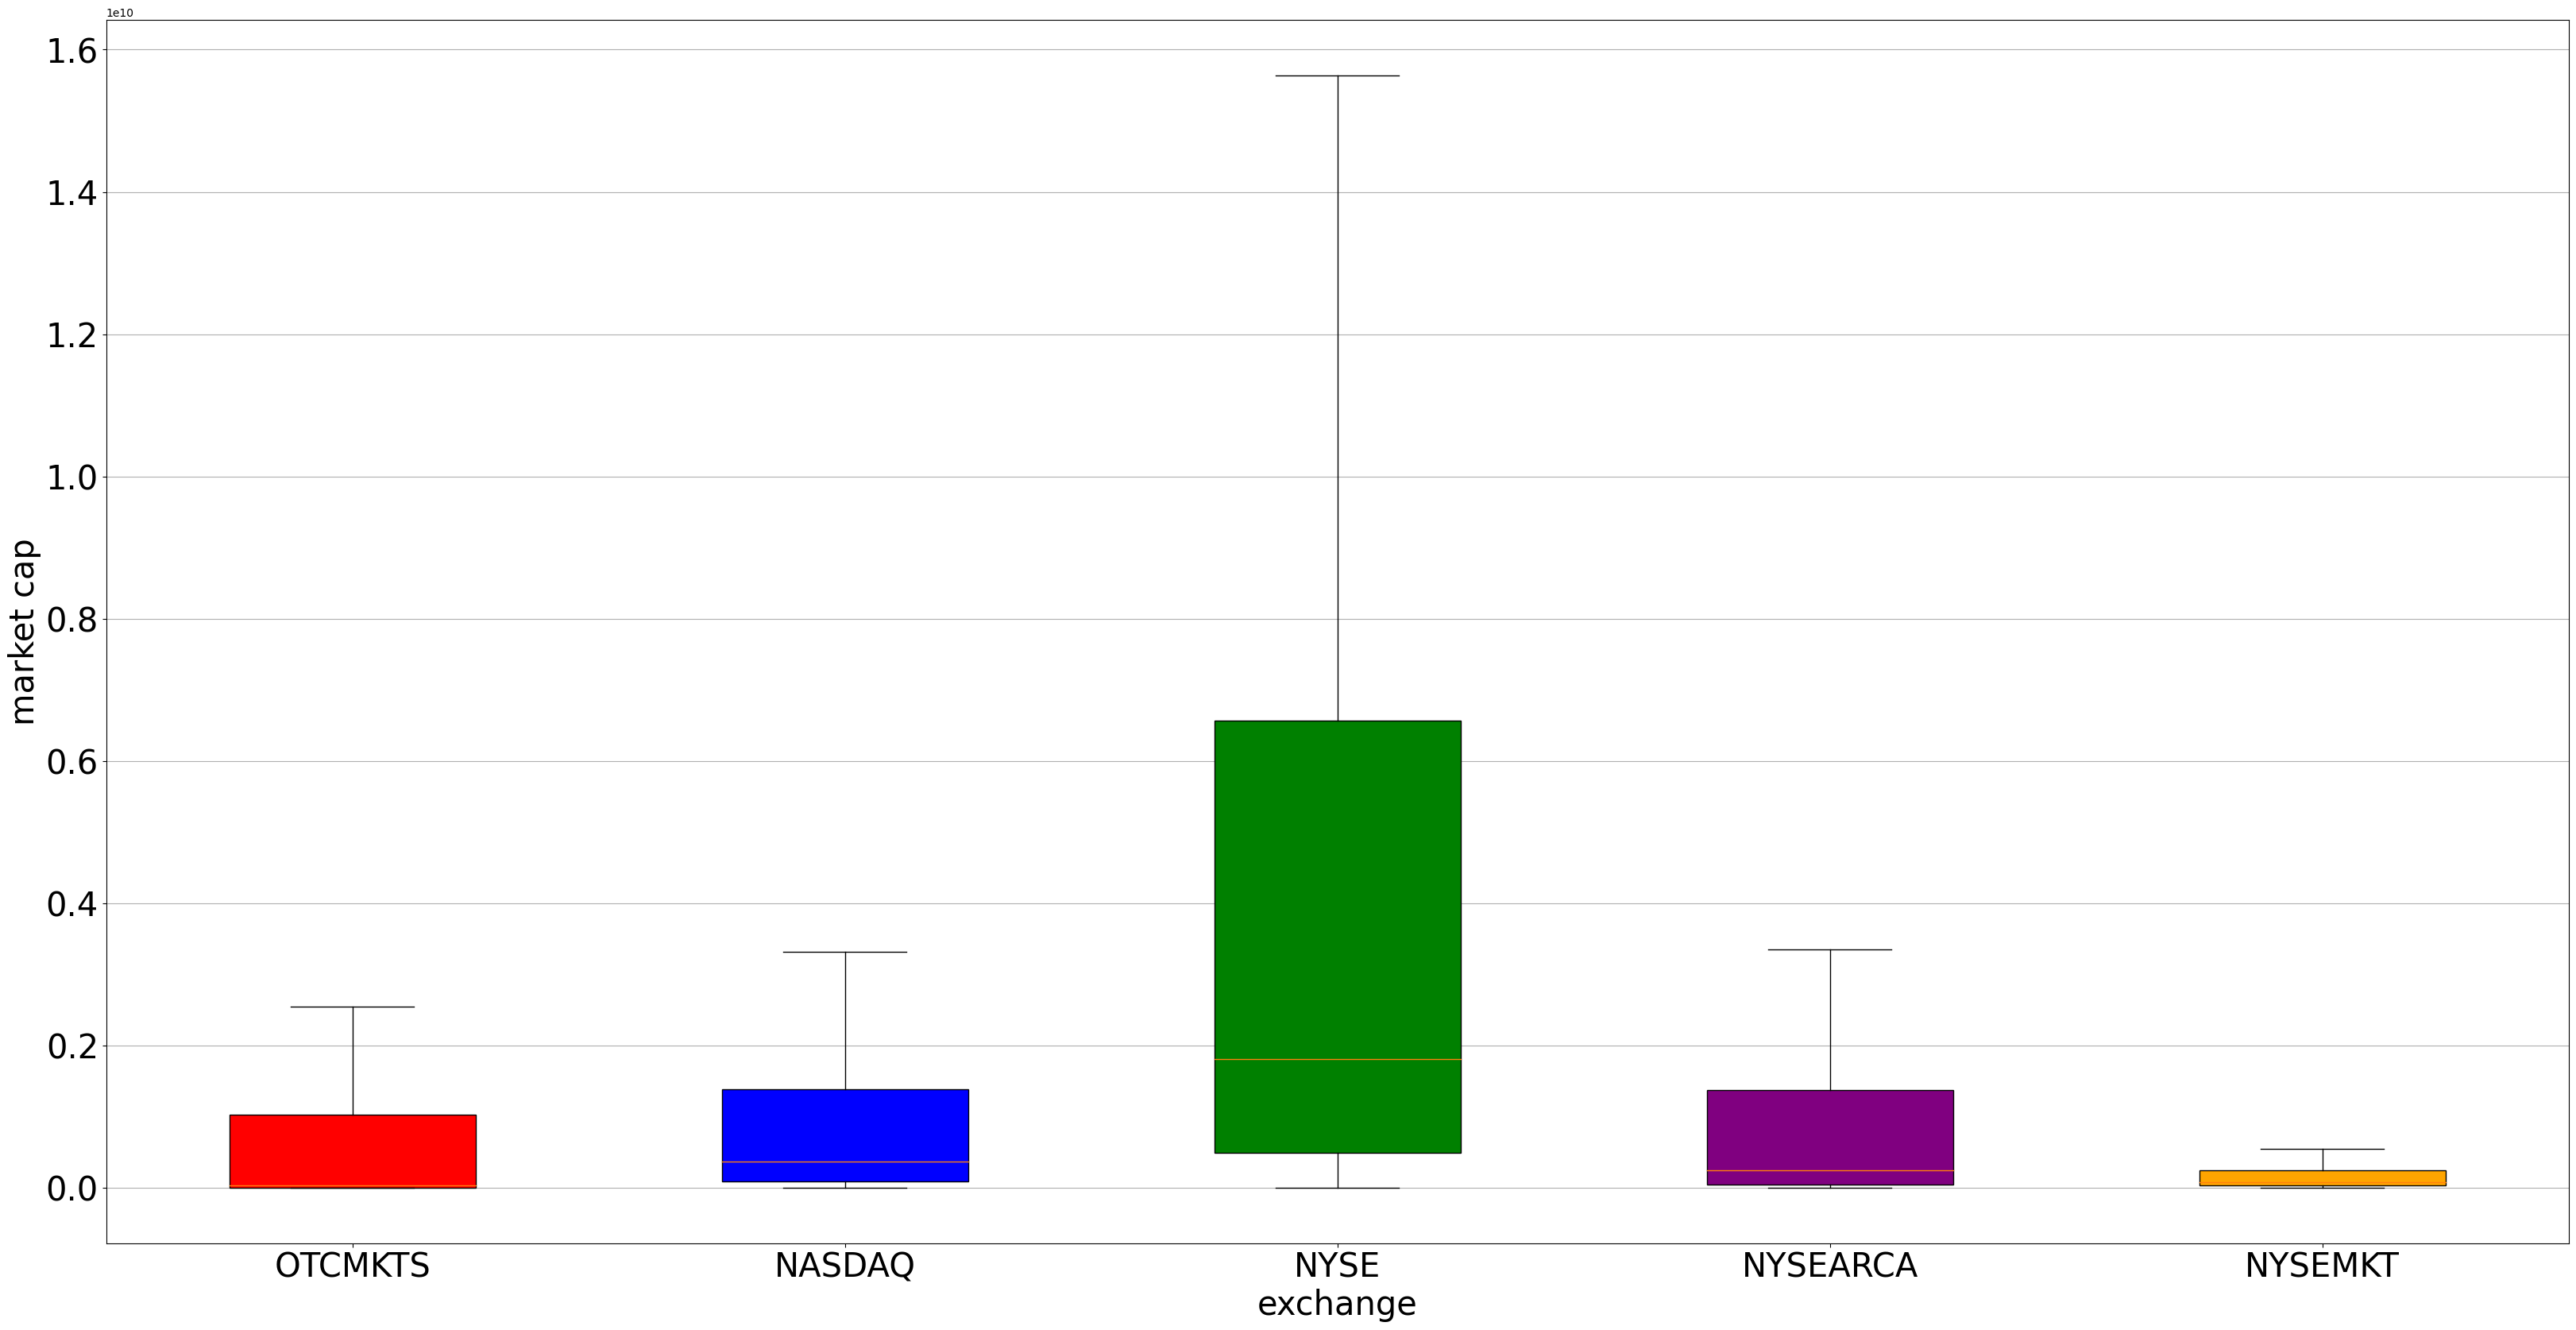

In [62]:
# رسم نمودار جعبه ای بازار ها (دیتاهای پرت حذف شده اند )
fig_11 , ax_11 = plt.subplots(figsize = (40,20))
bplot1 = ax_11.boxplot(ex_data , vert = True , patch_artist= True , labels = exs , showfliers=False)
colors  = ['red' , 'blue' , 'green' , 'purple' , 'orange']
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
ax_11.yaxis.grid(True)
plt.xticks( fontsize = 30)
plt.yticks( fontsize = 30)
plt.xlabel("exchange" , fontsize = 30)
plt.ylabel("market cap" , fontsize = 30)
plt.show()

In [63]:
# مشخص کردن ماکزیمم و مینیمم هر بازار
for i in range(len(exs)) : 
    print(f"exchange : {exs[i]} , max cap stock : {max(ex_data[i])} , min cap stock : {min(ex_data[i])}")

exchange : OTCMKTS , max cap stock : 341680000000.0 , min cap stock : 0.0
exchange : NASDAQ , max cap stock : 748550000000.0 , min cap stock : 35000.0
exchange : NYSE , max cap stock : 430230000000.0 , min cap stock : 10.0
exchange : NYSEARCA , max cap stock : 234130000000.0 , min cap stock : 144500.0
exchange : NYSEMKT , max cap stock : 123980000000.0 , min cap stock : 12.0


# Co-occurrence of various stocks in the same tweets

In [78]:
# مشخص کردن تعداد توییت های مربوط به 5 شرکت برتر
related_tweets_stock5 = {}
for i in range(len(stocks_5)) : 
    retweet_df = pd.DataFrame({'tweet_id':retweets , 'number_retweets':number_retweets})
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc ]['ticker'].values[0]
    msk_comp = (entities['text'] == cc) | (entities['text'] == tt )
    selected_tweets = entities[msk_comp]['tweet_id'].drop_duplicates().values
    related_tweets_stock5[stocks_5[i]] = selected_tweets

In [83]:
stock_5_cor = []
for i in range(5) : 
    ss = []
    for j in range(5) : 
        ss.append(0)
    stock_5_cor.append(ss)
print(stock_5_cor)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [84]:
# محاسبه تعداد توییت های مشترک بین 5 شرکت برتر
for i in range(len(stocks_5)) : 
    ss1 = stocks_5[i]
    tt1 = related_tweets_stock5[ss1]
    for j in range(i+1,len(stocks_5)) : 
        ss2 = stocks_5[j]
        tt2 = related_tweets_stock5[ss2]
        for k in range(len(tt1)): 
            if tt1[k] in tt2 : 
                stock_5_cor[i][j] += 1 
                stock_5_cor[j][i] += 1 

In [86]:
for i in range(5) : 
    stock_5_cor[i][i] = len(related_tweets_stock5[stocks_5[i]])

In [91]:
cor_matrix_stock_5 = {}
for i in range(5) : 
    cor_matrix_stock_5[stocks_5[i]] = stock_5_cor[i]

In [94]:
# ماتریس نشان دهنده اشتراک بین 5 شرکت برتر
pd.DataFrame(cor_matrix_stock_5 , index=stocks_5)

,Apple Inc.,"Amazon.com, Inc.",Facebook Inc,Tesla Inc,"Netflix, Inc."
Apple Inc.,291639,61155,65366,38945,21480
"Amazon.com, Inc.",61155,240922,39367,39118,31204
Facebook Inc,65366,39367,211494,17454,25055
Tesla Inc,38945,39118,17454,184495,21556
"Netflix, Inc.",21480,31204,25055,21556,120997
